## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Aim of the Project Info</p>

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

I will try to explain the concept using the Adult dataset/Census Income dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The problem statement here is to predict whether the income exceeds 50k a year or not based on the census data.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Reading the data from file</p>

In [17]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df_copy = df.copy()

Importing was successfull. Here is the dataset. Most of the columns are categorical outcomes desired some treatments

In [11]:
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

It looks like column names are missing. Also first row regarded as column name when reading the data from source. Following code correct reading error

In [18]:
df = df.T.reset_index().T.reset_index(drop = True)
df.head()

0                  1       2           3    4                    5   \
0  39          State-gov   77516   Bachelors   13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
2  38            Private  215646     HS-grad    9             Divorced   
3  53            Private  234721        11th    7   Married-civ-spouse   
4  28            Private  338409   Bachelors   13   Married-civ-spouse   

                   6               7       8        9      10  11   12  \
0        Adm-clerical   Not-in-family   White     Male   2174   0   40   
1     Exec-managerial         Husband   White     Male      0   0   13   
2   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
3   Handlers-cleaners         Husband   Black     Male      0   0   40   
4      Prof-specialty            Wife   Black   Female      0   0   40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=50K  
4            Cuba   <=50K

Column names are given

In [20]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']
df.head()

age          workclass  fnlwgt   education education-num  \
0  39          State-gov   77516   Bachelors            13   
1  50   Self-emp-not-inc   83311   Bachelors            13   
2  38            Private  215646     HS-grad             9   
3  53            Private  234721        11th             7   
4  28            Private  338409   Bachelors            13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

  capital-gain capital-loss hours-per-week  native-country  salary  
0         2174            0             40   United-States   <=50K  
1            0            0             13   United-States   <=50K  
2            0            0             40   United-States   <=50K  
3            0            0             40   United-States   <=50K  
4            0            0             40            Cuba   <=50K

There are 32561 observations and 15 features

In [21]:
df.shape

(32561, 15)

In [2]:
df = pd.read_csv("adult_eda.csv")

Datatype of the features look like compatible with the output. 
At a first glance, "education-num" and "relationship" have some missing observations.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


There are too few duplicated rows should be handeled

In [4]:
print(f"There are {df.duplicated().sum()} duplicated rows which is only {(df.duplicated().sum()/df.shape[0]*100):.2f} % of the whole dataset")
df.duplicated().value_counts()

There are 24 duplicated rows which is only 0.07 % of the whole dataset


False    32537
True        24
dtype: int64

duplicates are dropped permanantly!

In [5]:
df.drop_duplicates(inplace = True)
df.shape

(32537, 15)

dataset looks like good in terms of a descriptive statistics apart from "capital-gain" and "capital-loss" features

In [6]:
df.describe().T

count       mean        std       min        25%  \
age            32537.000     38.586     13.638    17.000     28.000   
fnlwgt         32537.000 189780.849 105556.471 12285.000 117827.000   
education-num  31735.000     10.084      2.575     1.000      9.000   
capital-gain   32537.000   1078.444   7387.957     0.000      0.000   
capital-loss   32537.000     87.368    403.102     0.000      0.000   
hours-per-week 32537.000     40.440     12.347     1.000     40.000   

                      50%        75%         max  
age                37.000     48.000      90.000  
fnlwgt         178356.000 236993.000 1484705.000  
education-num      10.000     12.000      16.000  
capital-gain        0.000      0.000   99999.000  
capital-loss        0.000      0.000    4356.000  
hours-per-week     40.000     45.000      99.000

some of the column names were renamed to more convenient

In [7]:
print(df.columns)
df.rename(columns = {'education-num': 'education_num', 'marital-status': 'marital_status', 'capital-gain': 'capital_gain'
                    , 'capital-loss': 'capital_loss', 'hours-per-week': 'hours_per_week', 'native-country': 'native_country'
                    , 'sex': 'gender'}, inplace = True)
print("some of the column names were renamed\n\n")
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')
some of the column names were renamed


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')


number of rows at least having one missing value

In [8]:
print(f"There are {df.isna().any(axis=1).sum()} rows having missing value(s). Which is {(df.isna().any(axis=1).sum()/len(df)*100):.1f}% of the whole data set")

There are 5749 rows having missing value(s). Which is 17.7% of the whole data set


missing values by features. Majority of the missing values come from "relationship" feature

In [9]:
pd.DataFrame({'missing values': df.isnull().sum(), 'ratio(%)': df.isnull().sum()/len(df)*100})

missing values  ratio(%)
age                          0     0.000
workclass                    0     0.000
fnlwgt                       0     0.000
education                    0     0.000
education_num              802     2.465
marital_status               0     0.000
occupation                   0     0.000
relationship              5064    15.564
race                         0     0.000
gender                       0     0.000
capital_gain                 0     0.000
capital_loss                 0     0.000
hours_per_week               0     0.000
native_country               0     0.000
salary                       0     0.000

detecting strange values apart from the NaN Values

In [10]:
df.describe(include = "O").T

count unique                 top   freq
workclass       32537      9             Private  22673
education       32537     16             HS-grad  10494
marital_status  32537      7  Married-civ-spouse  14970
occupation      32537     15      Prof-specialty   4136
relationship    27473      5             Husband  13187
race            32537      5               White  27795
gender          32537      2                Male  21775
native_country  32537     42       United-States  29153
salary          32537      2               <=50K  24698

In [11]:
object_col = df.select_dtypes(include = "O").columns
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


Some of the columns have Question Mark "?"

In [12]:
pd.Series(["?" in df[i].unique() for i in df.columns], index = df.columns)

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

## Salary (Target Feature)

In [13]:
df["salary"].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

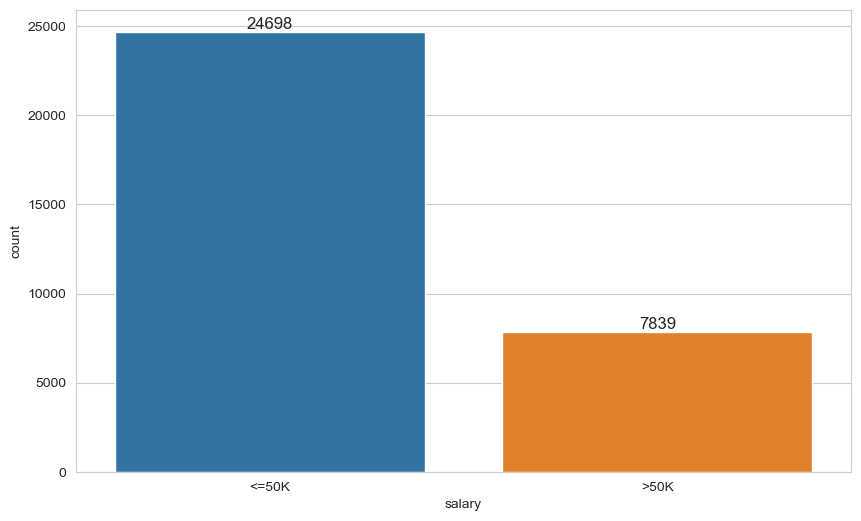

In [14]:
fig, ax = plt.subplots()
p1 = sns.countplot(data = df, x= "salary")
ax.bar_label(p1.containers[0], label_type='edge', fontsize = 12);

In [15]:
df["salary"].value_counts(normalize = True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

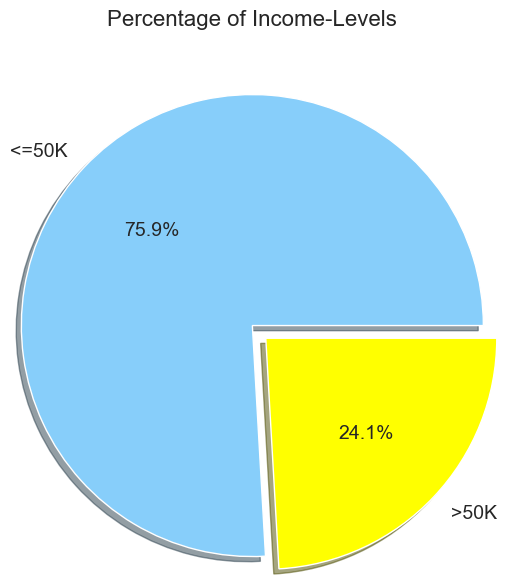

In [16]:
x = df["salary"].value_counts().index
y = df["salary"].value_counts().values
fig, ax = plt.subplots()
ax.pie(y, labels = x, autopct = "%.1f%%", explode = [0, 0.1], colors=['lightskyblue', 'yellow'], shadow = True, radius = 1.25, textprops={'fontsize': 14});
ax.set_title("Percentage of Income-Levels", fontsize = 16, pad = 50);

Result : 3/4 of the US Citizens income less than $50K in this sample.

## Numeric Features

## age

**Checking the boxplot to see extreme values**

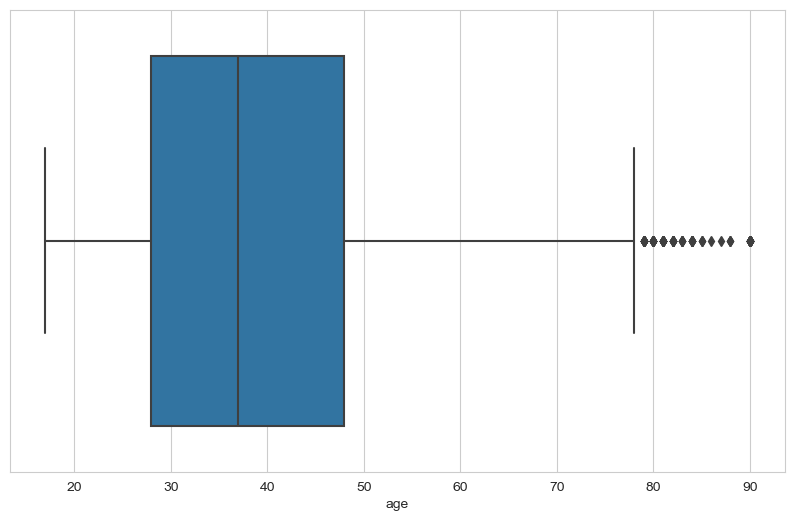

In [17]:
sns.boxplot(data = df, x = "age");

**Checking the histplot/kdeplot to see distribution of feature**

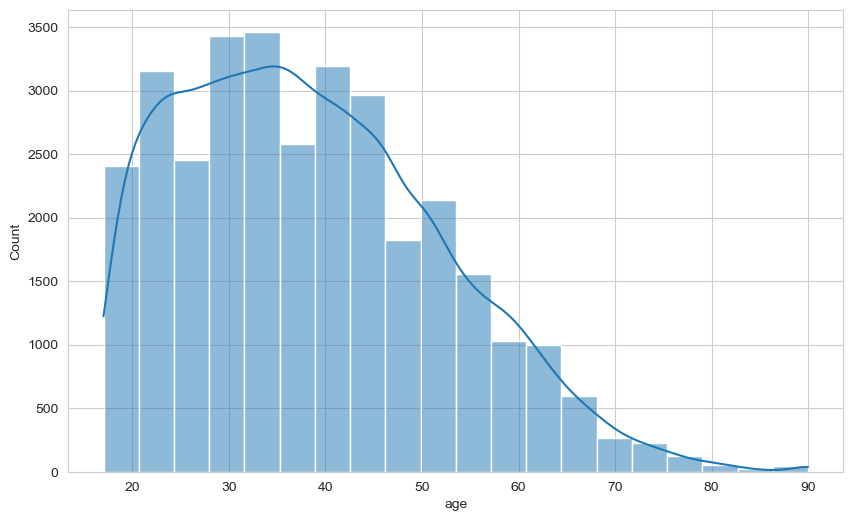

In [18]:
sns.histplot(df["age"], bins = 20, kde = True);

**Checking the statistical values**

In [19]:
df["age"].describe()

count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

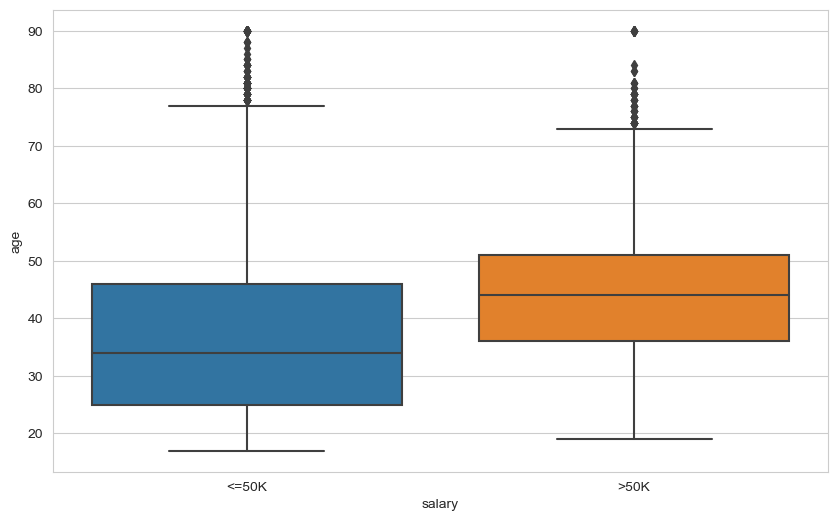

In [20]:
sns.boxplot(data = df, y = "age", x = "salary");

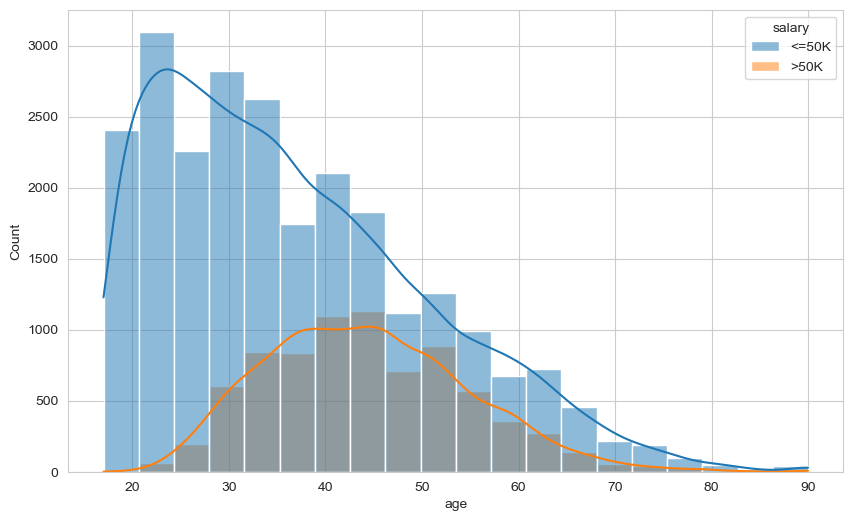

In [21]:
sns.histplot(data = df, x= "age", hue = "salary", bins = 20, kde = True);

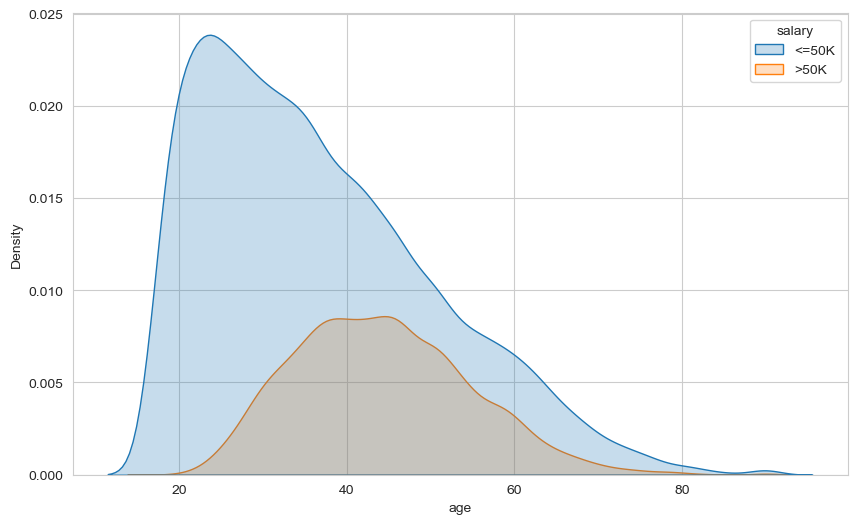

In [22]:
sns.kdeplot(data = df, x= "age", hue = "salary", shade = "fill");

**Checking the statistical values by "salary" levels**

In [23]:
df.groupby("salary")[["age"]].describe()

age                                                 
           count   mean    std    min    25%    50%    75%    max
salary                                                           
<=50K  24698.000 36.787 14.017 17.000 25.000 34.000 46.000 90.000
>50K    7839.000 44.251 10.520 19.000 36.000 44.000 51.000 90.000

**Result :** the mean age of high-level income citizens is significantly higher than the low-level income citizens as expected. The distibution of age for low-level income citizens is high variability and right-skewed whereas almost symmetric and low variability for high-level income citizens. There are any outliers both in low-level income citizens and high-level income citizens in terms of an age feature.

## fnlwgt

**Checking the boxplot to see extreme values**

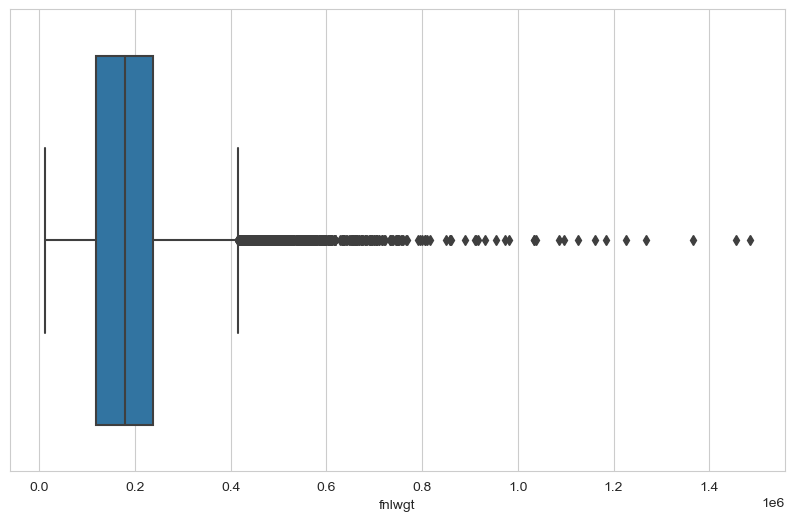

In [24]:
sns.boxplot(data = df, x = "fnlwgt");

**Checking the histplot/kdeplot to see distribution of feature**

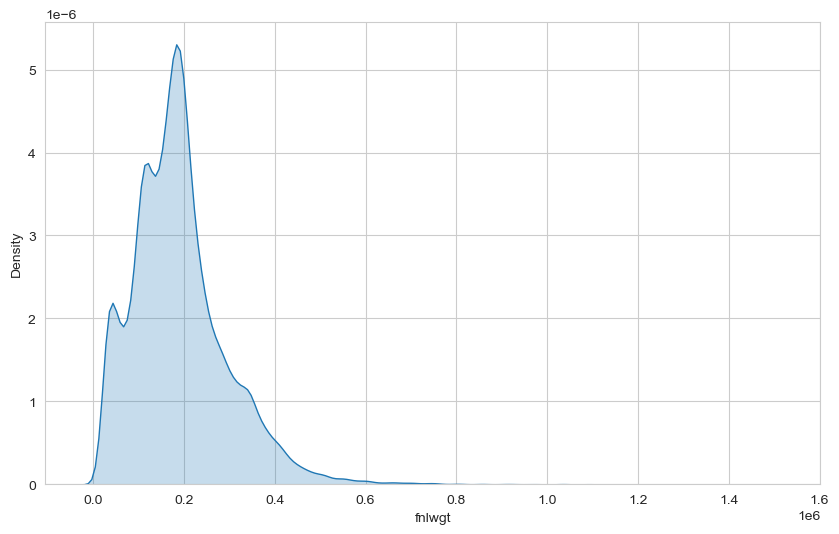

In [25]:
sns.kdeplot(data = df, x= "fnlwgt", shade = "fill");

**Checking the statistical values**

In [26]:
df["fnlwgt"].describe()

count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

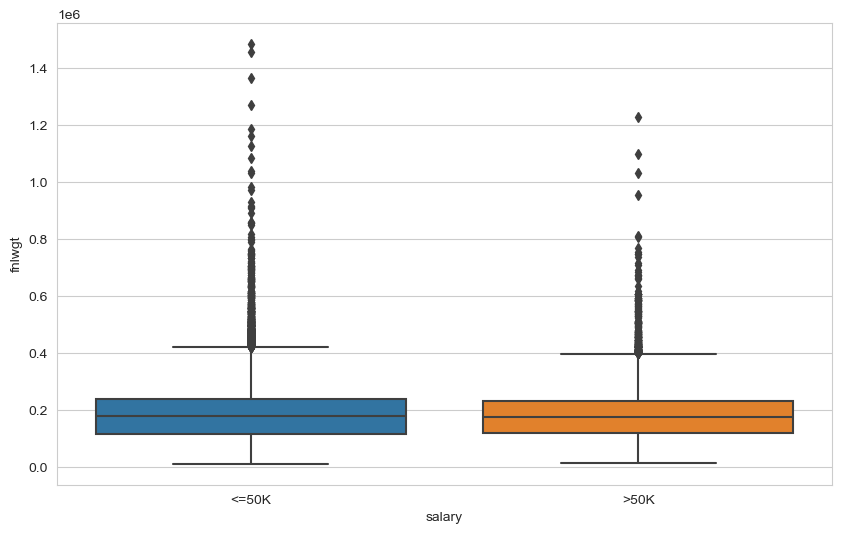

In [27]:
sns.boxplot(data = df, y = "fnlwgt", x = "salary");

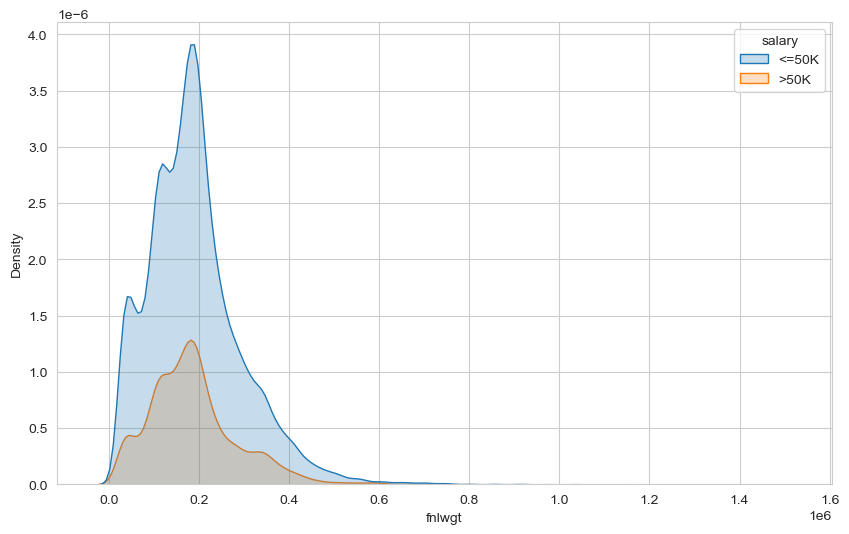

In [28]:
sns.kdeplot(data = df, x= "fnlwgt", hue = "salary", shade = "fill");

**Checking the statistical values by "salary" levels**

In [29]:
df.groupby("salary")[["fnlwgt"]].describe()

fnlwgt                                                        \
           count       mean        std       min        25%        50%   
salary                                                                   
<=50K  24698.000 190345.927 106487.413 12285.000 117606.000 179465.000   
>50K    7839.000 188000.481 102554.464 14878.000 119100.000 176063.000   

                               
              75%         max  
salary                         
<=50K  238968.250 1484705.000  
>50K   230969.000 1226583.000

**Result :** The distibution of final sample weight almost same for both low-level income citizens and high-level income citizens. Both are right skewed due to outliers. However, there are more extreme outliers in low-level income citizens than in high-level income citizens in terms of an fnlwgt feature. So, salary is not a factor in terms of a sampling design.

## capital_gain

**Checking the boxplot to see extreme values**

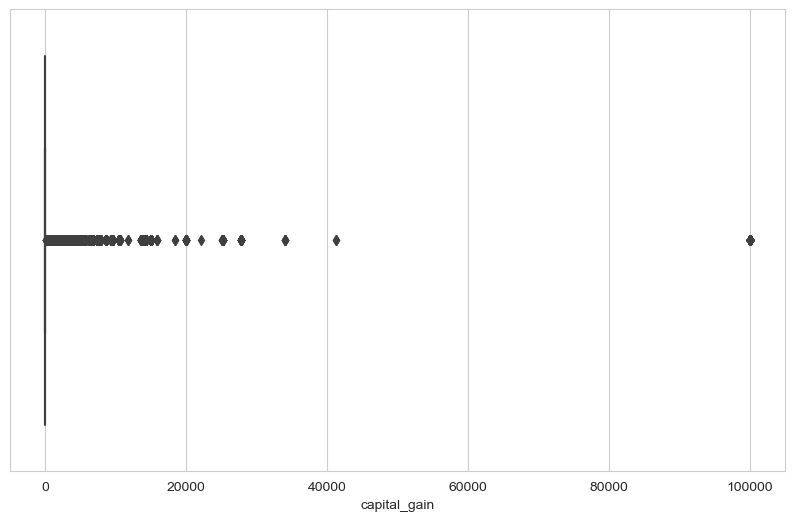

In [30]:
sns.boxplot(data = df, x = "capital_gain");

**Checking the histplot/kdeplot to see distribution of feature**

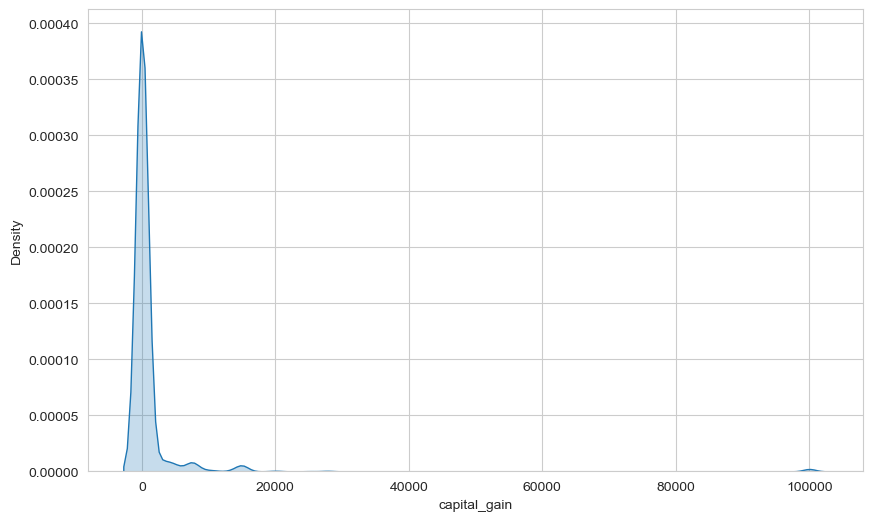

In [31]:
sns.kdeplot(data = df, x= "capital_gain", shade = "fill");

**Checking the statistical values**

In [32]:
df["capital_gain"].describe()

count   32537.000
mean     1078.444
std      7387.957
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: capital_gain, dtype: float64

**Checking the boxplot and histplot/kdeplot by "salary" levels**

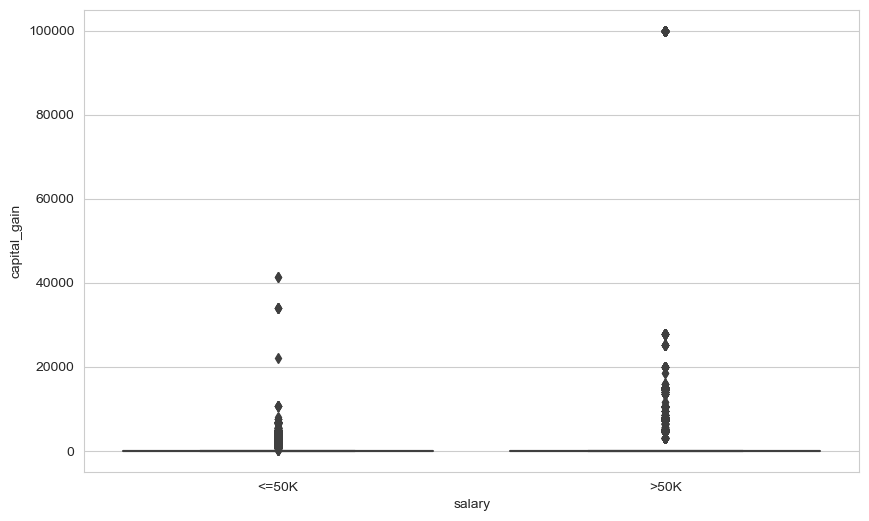

In [33]:
sns.boxplot(data = df, y = "capital_gain", x = "salary");

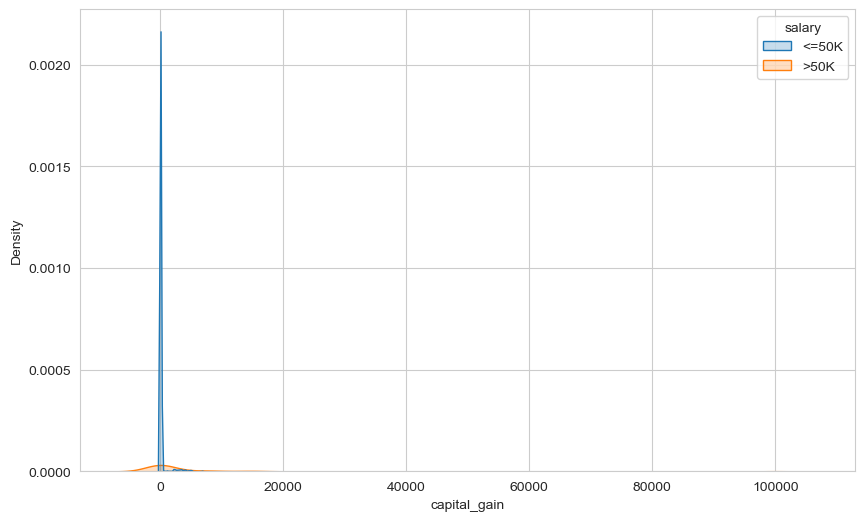

In [34]:
sns.kdeplot(data = df, x= "capital_gain", hue = "salary", shade = "fill");

**Checking the statistical values by "salary" levels**

In [35]:
df.groupby("salary")[["capital_gain"]].describe()

capital_gain                                                     
              count     mean       std   min   25%   50%   75%       max
salary                                                                  
<=50K     24698.000  148.885   963.558 0.000 0.000 0.000 0.000 41310.000
>50K       7839.000 4007.165 14572.097 0.000 0.000 0.000 0.000 99999.000

**Checking the statistical values by "salary" levels for capital_gain not equal the zero**

In [36]:
df[df["capital_gain"] != 0].groupby("salary")[["capital_gain"]].describe()

capital_gain                                                           \
              count      mean       std      min      25%      50%       75%   
salary                                                                         
<=50K      1035.000  3552.813  3173.419  114.000 2202.000 3273.000  4101.000   
>50K       1677.000 18731.165 26778.676 3103.000 7298.000 7896.000 15024.000   

                  
             max  
salary            
<=50K  41310.000  
>50K   99999.000

**Result :** capital-gain feature have highly zero inflated behaviour. Very long positively tailed distirbuted under the effect of exteme outliers. So, evaluating of plots and descriptive statistics after the leaving out of zeros from the data may be more appropriate. Mean of capital gains for high-level income citizens very high than low-level income citizens as expected.

## capital_loss

**Checking the boxplot to see extreme values**

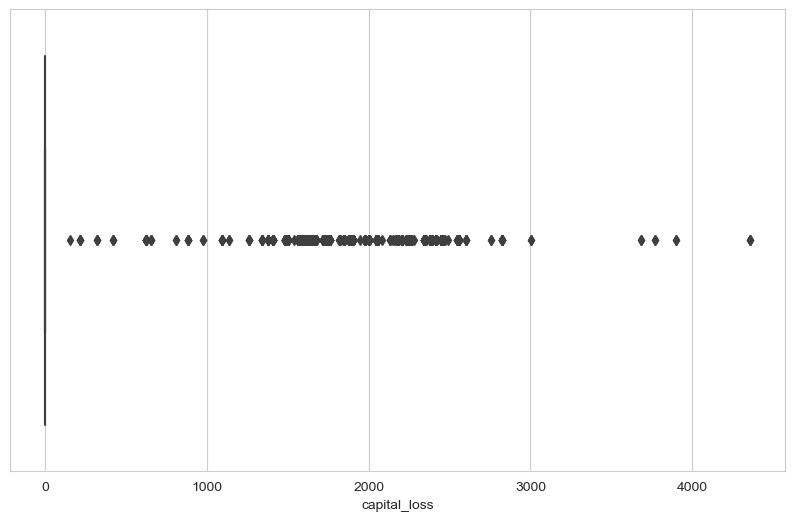

In [37]:
sns.boxplot(data = df, x = "capital_loss");

**Checking the histplot/kdeplot to see distribution of feature**

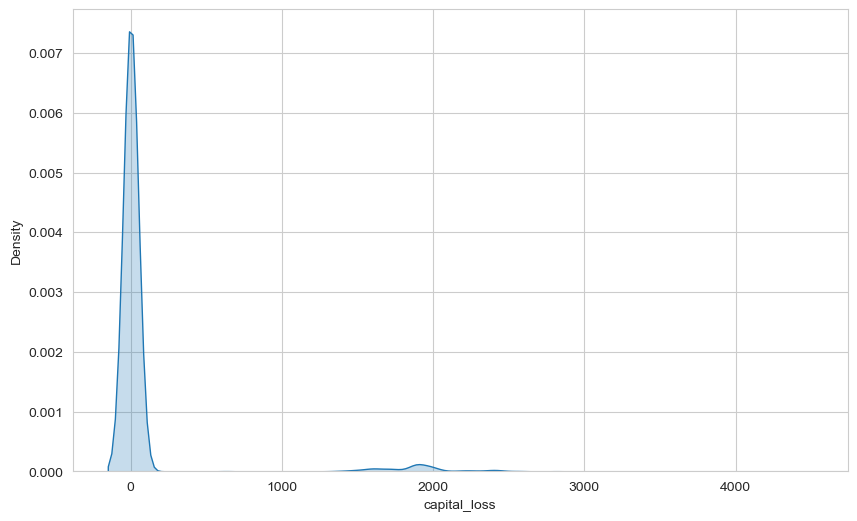

In [38]:
sns.kdeplot(data = df, x= "capital_loss", shade = "fill");

**Checking the statistical values**

In [39]:
df["capital_loss"].describe()

count   32537.000
mean       87.368
std       403.102
min         0.000
25%         0.000
50%         0.000
75%         0.000
max      4356.000
Name: capital_loss, dtype: float64

**Checking the boxplot and histplot/kdeplot by "salary" levels**

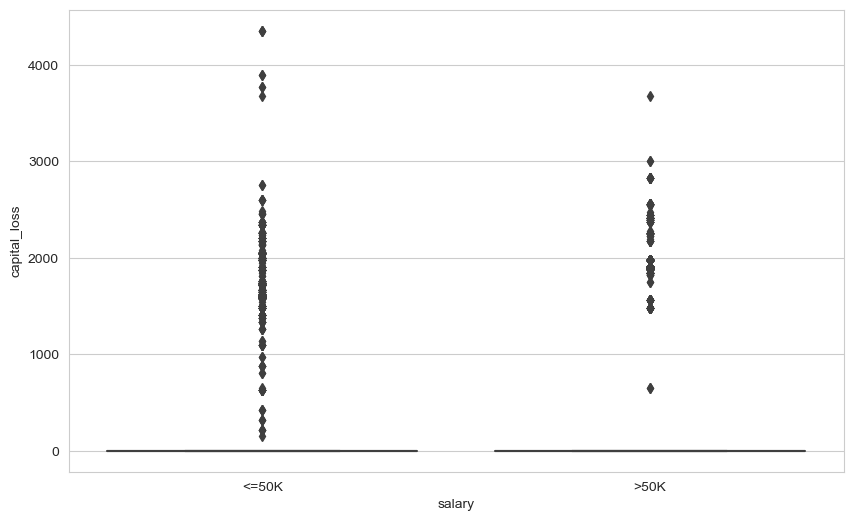

In [40]:
sns.boxplot(data = df, y = "capital_loss", x = "salary");

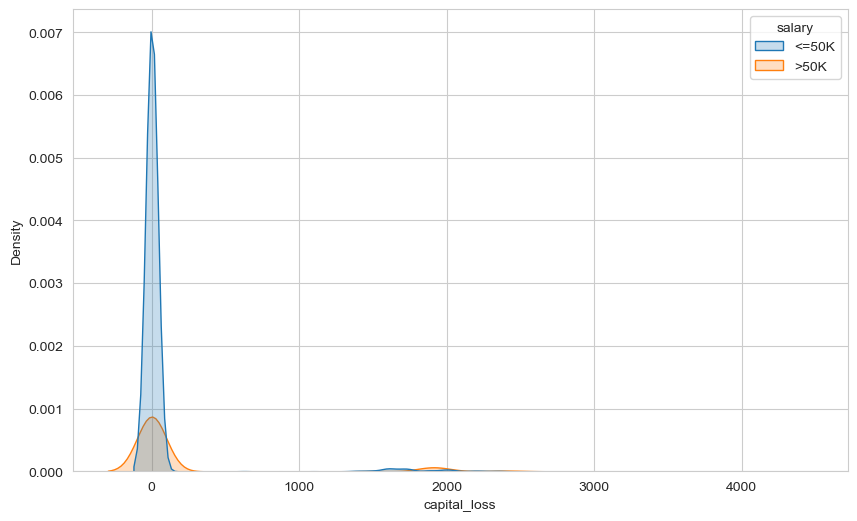

In [41]:
sns.kdeplot(data = df, x= "capital_loss", hue = "salary", shade = "fill");

**Checking the statistical values by "salary" levels**

In [42]:
df.groupby("salary")[["capital_loss"]].describe()

capital_loss                                                 
              count    mean     std   min   25%   50%   75%      max
salary                                                              
<=50K     24698.000  53.190 310.890 0.000 0.000 0.000 0.000 4356.000
>50K       7839.000 195.051 595.555 0.000 0.000 0.000 0.000 3683.000

**Checking the statistical values by "salary" levels for capital_loss not equel the zero**

In [43]:
df[df["capital_loss"] != 0].groupby("salary")[["capital_loss"]].describe()

capital_loss                                                      \
              count     mean     std     min      25%      50%      75%   
salary                                                                    
<=50K       746.000 1760.983 438.906 155.000 1590.000 1721.000 1980.000   
>50K        773.000 1978.017 264.144 653.000 1887.000 1902.000 1977.000   

                 
            max  
salary           
<=50K  4356.000  
>50K   3683.000

**Result :** capital-loss feature have also highly zero inflated data too. Very long positively tailed distirbuted under the effect of exteme outliers. So, again, evaluating of plots and descriptive statistics after the leaving out of zeros from the data may be more helpful. There are two peaks. one at 0, the other one at around 2K both for high-level and low-level income citizens. So, it seems that distirbutions are bimodal.

## hours_per_week

**Checking the boxplot to see extreme values**

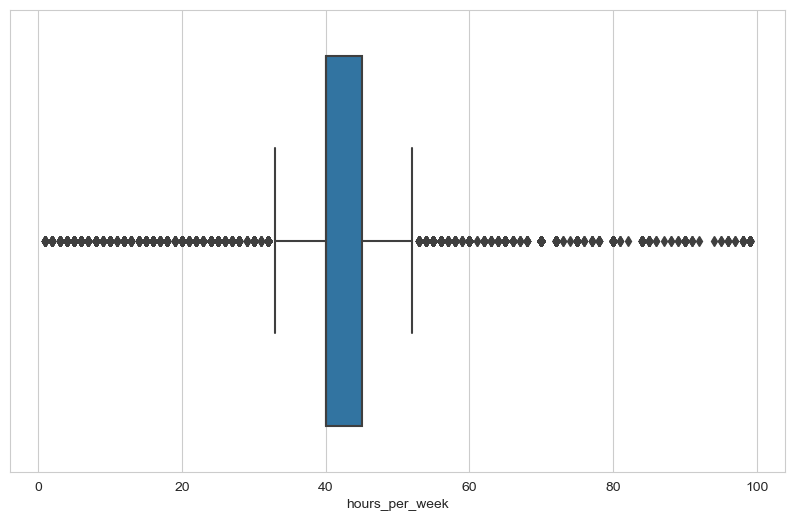

In [44]:
sns.boxplot(data = df, x = "hours_per_week");

**Checking the histplot/kdeplot to see distribution of feature**

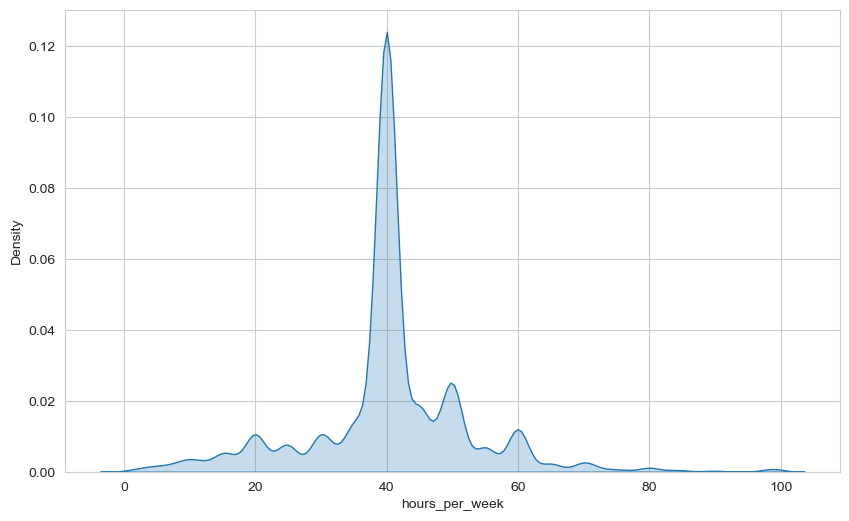

In [45]:
sns.kdeplot(data = df, x= "hours_per_week", shade = "fill");

**Checking the statistical values**

In [46]:
df["hours_per_week"].describe()

count   32537.000
mean       40.440
std        12.347
min         1.000
25%        40.000
50%        40.000
75%        45.000
max        99.000
Name: hours_per_week, dtype: float64

**Checking the boxplot and histplot/kdeplot by "salary" levels**

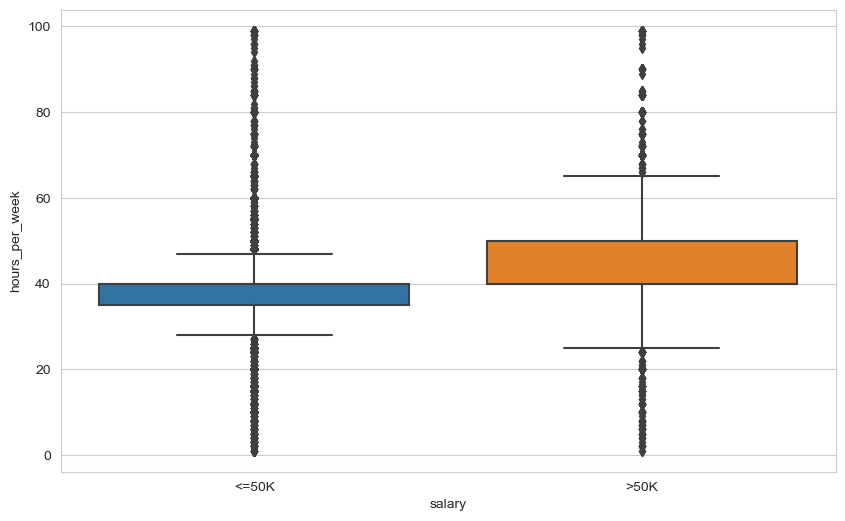

In [47]:
sns.boxplot(data = df, y = "hours_per_week", x = "salary");

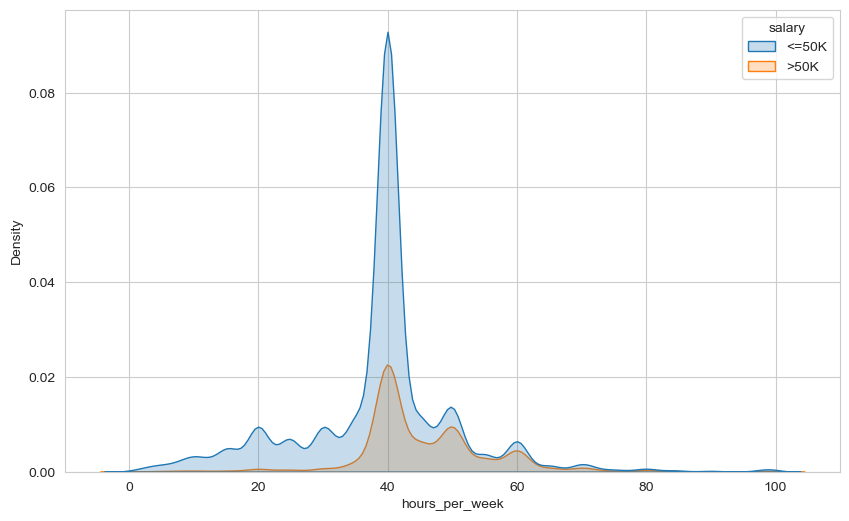

In [48]:
sns.kdeplot(data = df, x = "hours_per_week", hue = "salary", shade = "fill");

**Checking the statistical values by "salary" levels**

In [49]:
df.groupby("salary")[["hours_per_week"]].describe()

hours_per_week                                                
                count   mean    std   min    25%    50%    75%    max
salary                                                               
<=50K       24698.000 38.843 12.318 1.000 35.000 40.000 40.000 99.000
>50K         7839.000 45.473 11.014 1.000 40.000 40.000 50.000 99.000

**Result :** hours_per_week feature both left and right skewed distibuted. left skewness comes from the low-level income citizens. the mean of hours_per_week for high-level income citizens is more than low-level income citizens as expected. Outliers are more frequent in low-level income citizens than high-level income citizens.

### See the relationship between each numeric features by target feature (salary) in one plot basically

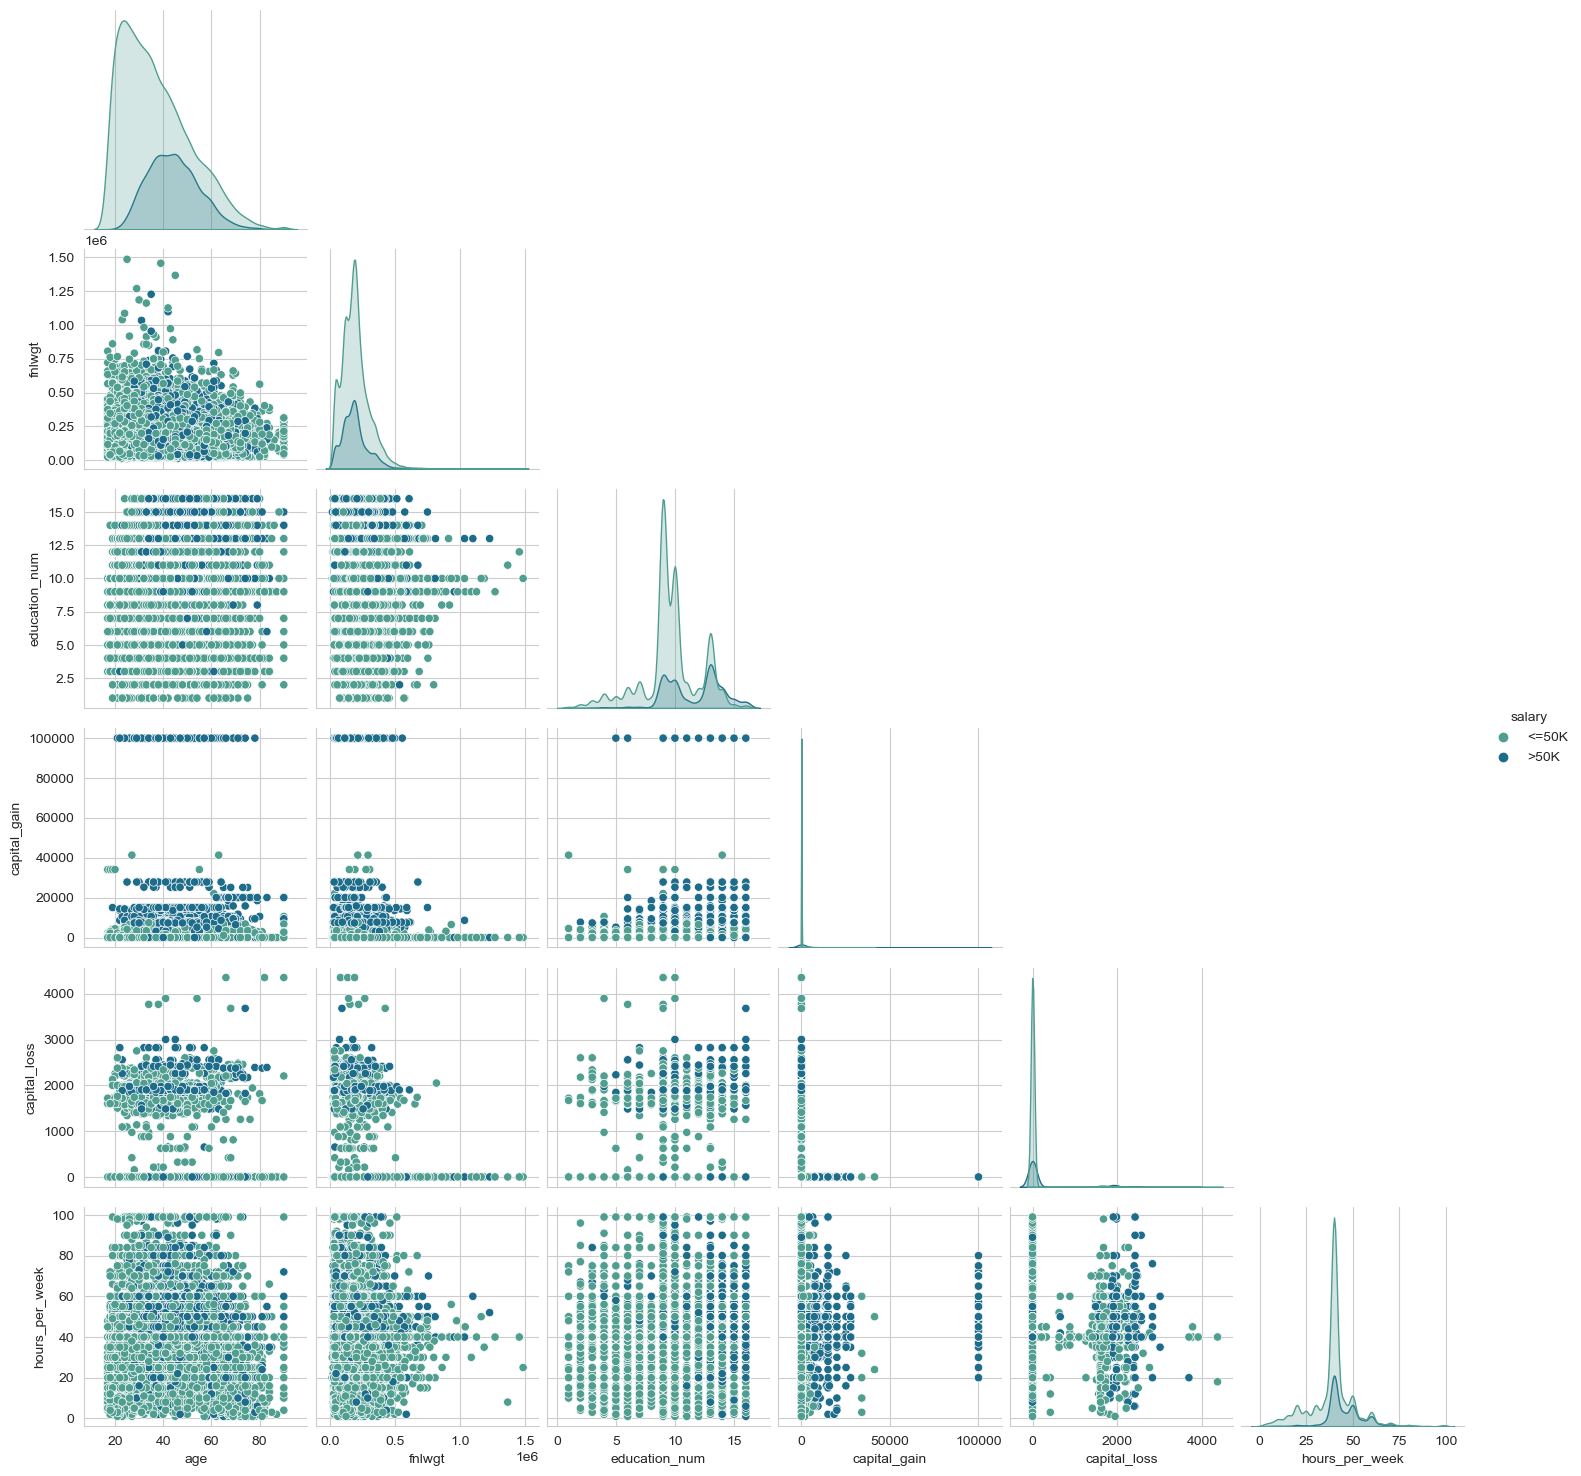

In [50]:
sns.pairplot(df, hue = "salary", corner=True, palette = "crest");

## Categorical Features

## education & education_num

**Detecting the similarities between these features by comparing unique values**

In [51]:
df["education"].value_counts()

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [52]:
df["education_num"].value_counts()

9.000     10208
10.000     7089
13.000     5245
14.000     1686
11.000     1343
7.000      1146
12.000     1044
6.000       916
4.000       630
15.000      559
5.000       503
8.000       424
16.000      405
3.000       329
2.000       159
1.000        49
Name: education_num, dtype: int64

categorical and numerical education features are matched perfectly. Missing values can be filled for education_num feature by using education feature.

In [53]:
df.groupby("education")["education_num"].value_counts(dropna = False)

education     education_num
10th          6.000              916
              NaN                 17
11th          7.000             1146
              NaN                 29
12th          8.000              424
              NaN                  9
1st-4th       2.000              159
              NaN                  7
5th-6th       3.000              329
              NaN                  3
7th-8th       4.000              630
              NaN                 15
9th           5.000              503
              NaN                 11
Assoc-acdm    12.000            1044
              NaN                 23
Assoc-voc     11.000            1343
              NaN                 39
Bachelors     13.000            5245
              NaN                108
Doctorate     16.000             405
              NaN                  8
HS-grad       9.000            10208
              NaN                286
Masters       14.000            1686
              NaN                 36
Preschool 

**Visualizing the count of person in each categories for these features (education, education_num) separately**

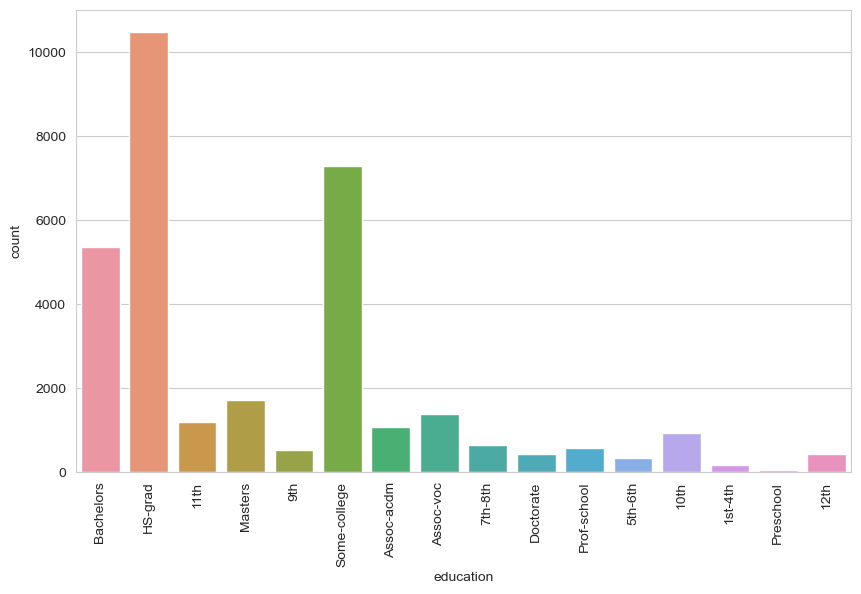

In [54]:
sns.countplot(df["education"])
plt.xticks(rotation=90);

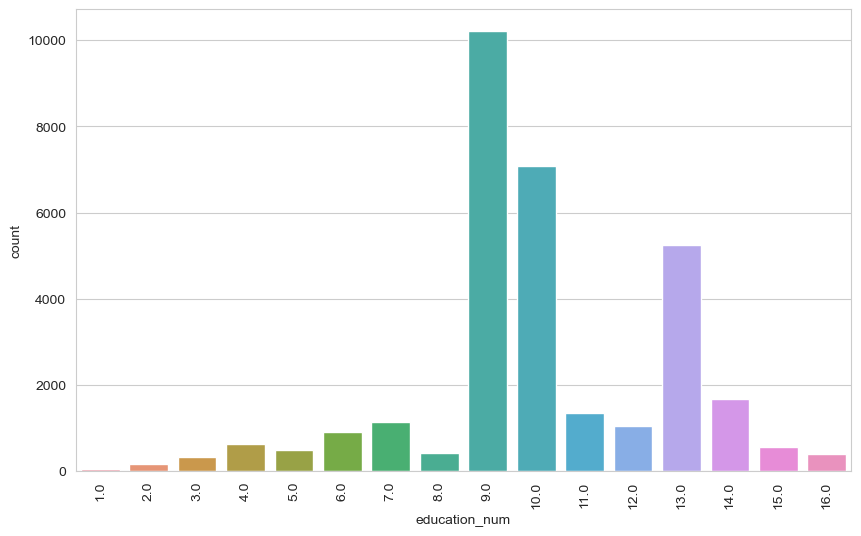

In [55]:
sns.countplot(df["education_num"])
plt.xticks(rotation=90);

**Checking the count of person in each "salary" levels by these features (education and education_num) separately and visualize them with countplot**

In [56]:
df.groupby("education")["salary"].value_counts(dropna = False)

education     salary
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      160
              >50K         6
5th-6th       <=50K      316
              >50K        16
7th-8th       <=50K      605
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3132
              >50K      2221
Doctorate     >50K       306
              <=50K      107
HS-grad       <=50K     8820
              >50K      1674
Masters       >50K       959
              <=50K      763
Preschool     <=50K       50
Prof-school   >50K       423
              <=50K      153
Some-college  <=50K     5896
              >50K      1386
Name: salary, dtype: int64

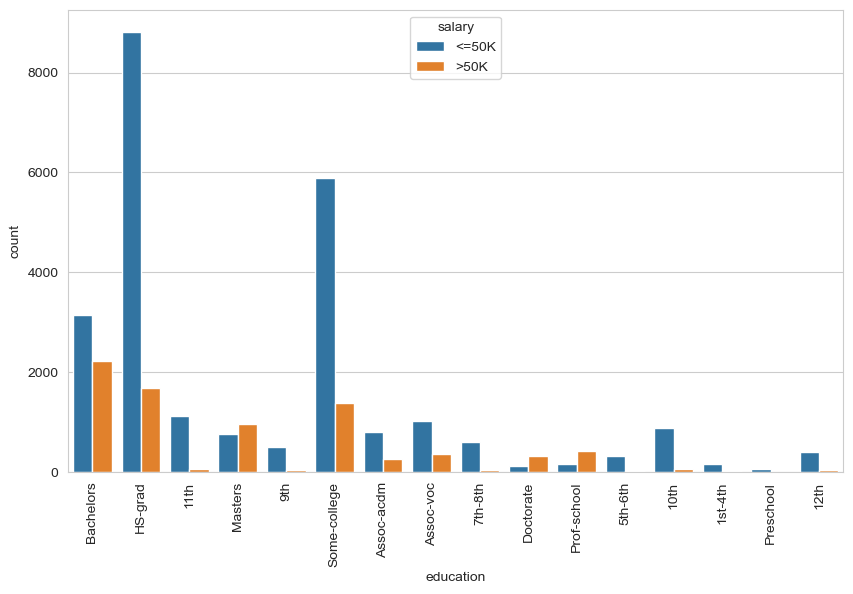

In [57]:
sns.countplot(data = df, x = "education", hue = "salary")
plt.xticks(rotation=90);

In [58]:
df.groupby("education_num")["salary"].value_counts(dropna = False)

education_num  salary
1.000          <=50K       49
2.000          <=50K      153
               >50K         6
3.000          <=50K      313
               >50K        16
4.000          <=50K      592
               >50K        38
5.000          <=50K      477
               >50K        26
6.000          <=50K      854
               >50K        62
7.000          <=50K     1088
               >50K        58
8.000          <=50K      391
               >50K        33
9.000          <=50K     8579
               >50K      1629
10.000         <=50K     5746
               >50K      1343
11.000         <=50K      994
               >50K       349
12.000         <=50K      787
               >50K       257
13.000         <=50K     3078
               >50K      2167
14.000         >50K       935
               <=50K      751
15.000         >50K       410
               <=50K      149
16.000         >50K       302
               <=50K      103
Name: salary, dtype: int64

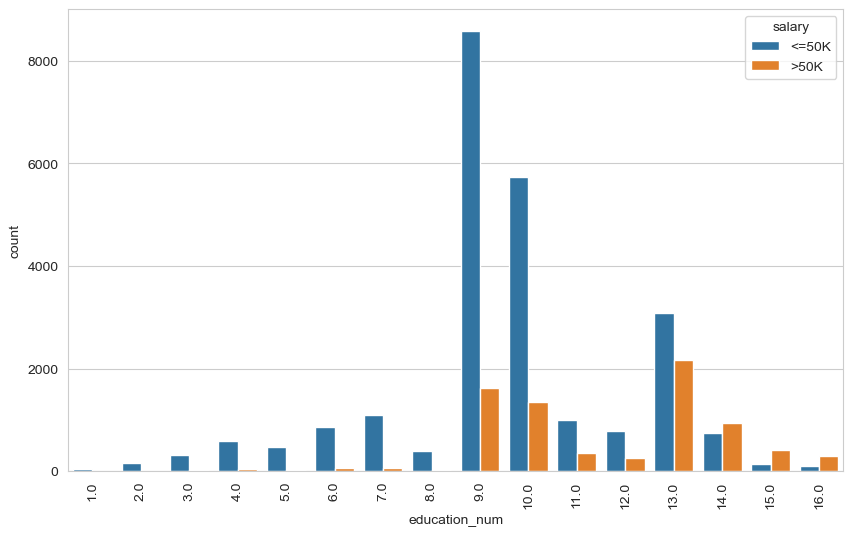

In [59]:
sns.countplot(data = df, x = "education_num", hue = "salary")
plt.xticks(rotation=90);

**Visualizing the boxplot of "education_num" feature by "salary" levels**

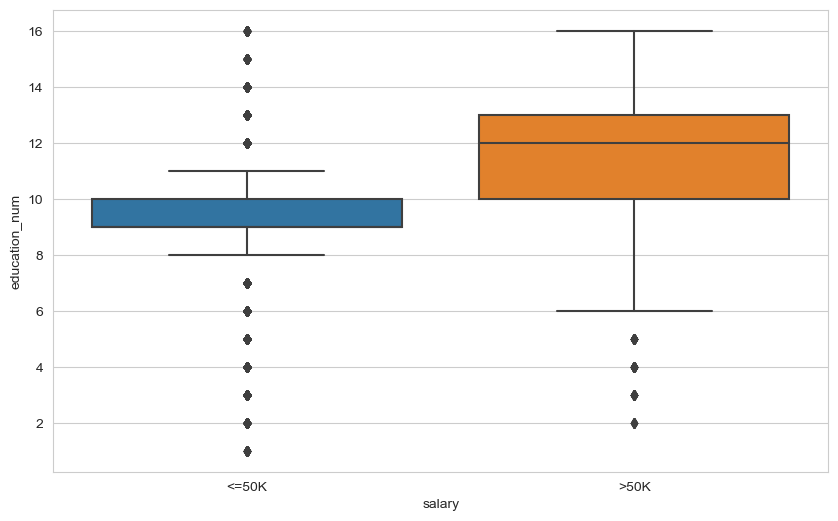

In [60]:
sns.boxplot(data = df, x = "salary", y = "education_num");

**Decreasing the number of categories in "education" feature as low, medium, and high level and creating a new feature with this new categorical data.**

In [61]:
def mapping_education(x):
    if x in ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"]:
        return "low_level_grade"
    elif x in ["HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm"]:
        return "medium_level_grade"
    elif x in ["Bachelors", "Masters", "Prof-school", "Doctorate"]:
        return "high_level_grade"

In [62]:
df["education"].apply(lambda x: mapping_education(x)).value_counts()

medium_level_grade    20225
high_level_grade       8064
low_level_grade        4248
Name: education, dtype: int64

By using "mapping_education" def function above, create a new column named "education_summary"

In [63]:
df["education_summary"] = df["education"].apply(lambda x: mapping_education(x))

**Visualizing the count of person in each categories for these new education levels (high, medium, low)**

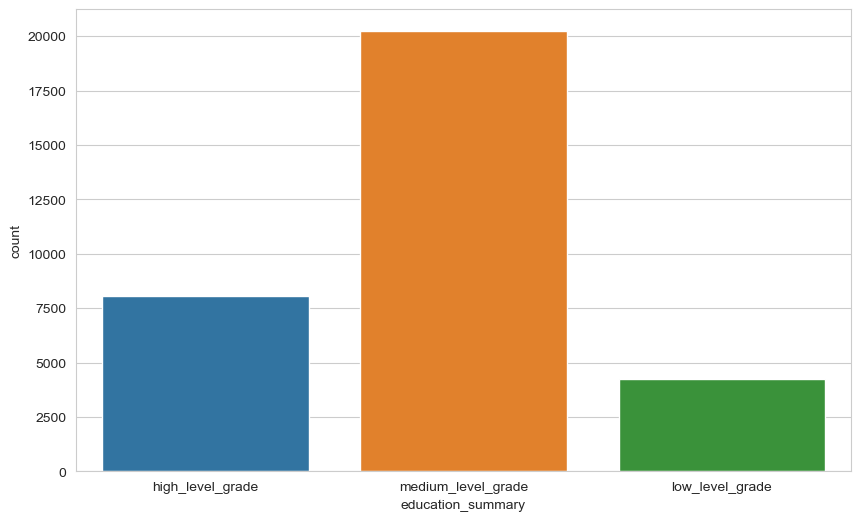

In [64]:
sns.countplot(df["education_summary"]);

**Checking the count of person in each "salary" levels by these new education levels(high, medium, low) and visualizing it with countplot**

In [65]:
df.groupby("education_summary")["salary"].value_counts()

education_summary   salary
high_level_grade    <=50K      4155
                    >50K       3909
low_level_grade     <=50K      4004
                    >50K        244
medium_level_grade  <=50K     16539
                    >50K       3686
Name: salary, dtype: int64

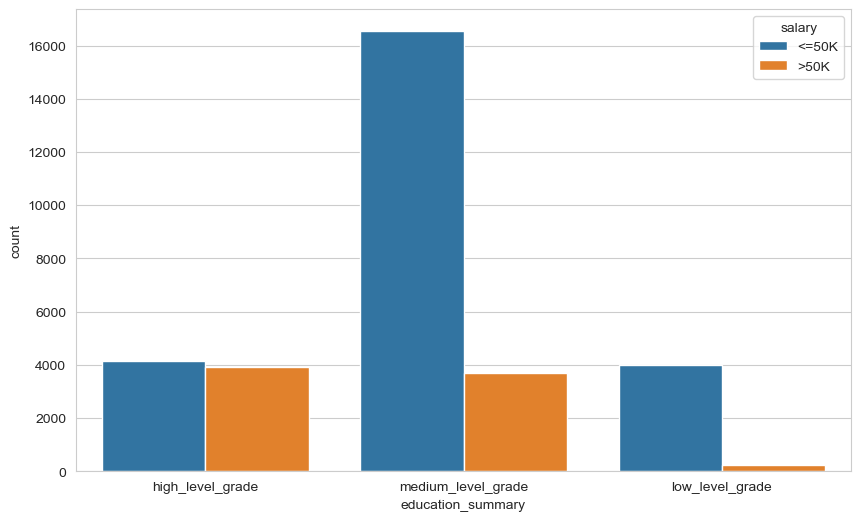

In [66]:
sns.countplot(data = df, x = "education_summary", hue = "salary");

**Checking the percentage distribution of person in each "salary" levels by each new education levels (high, medium, low) and visualizing it with pie plot separately**

In [67]:
df.groupby("education_summary")["salary"].value_counts(normalize = True)

education_summary   salary
high_level_grade    <=50K    0.515
                    >50K     0.485
low_level_grade     <=50K    0.943
                    >50K     0.057
medium_level_grade  <=50K    0.818
                    >50K     0.182
Name: salary, dtype: float64

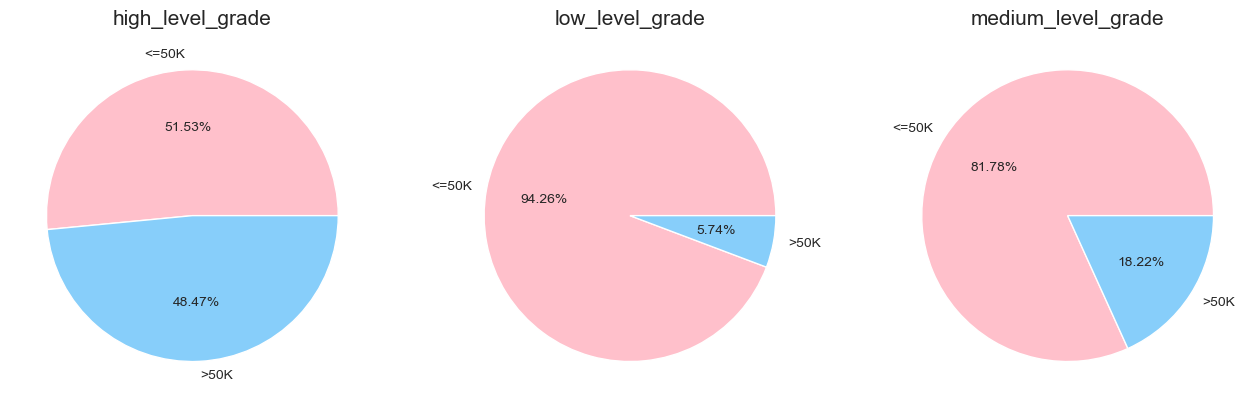

In [68]:
data = df.groupby("education_summary")[["salary"]].value_counts(normalize = True)
fig, ax = plt.subplots(1, 3, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'lightskyblue'])
    ax[idx].set_title(value, fontsize = 15)

**Checking the count of person in each these new education levels(high, medium, low) by "salary" levels and visualizing it with countplot**

In [69]:
df.groupby("salary")["education_summary"].value_counts()

salary  education_summary 
<=50K   medium_level_grade    16539
        high_level_grade       4155
        low_level_grade        4004
>50K    high_level_grade       3909
        medium_level_grade     3686
        low_level_grade         244
Name: education_summary, dtype: int64

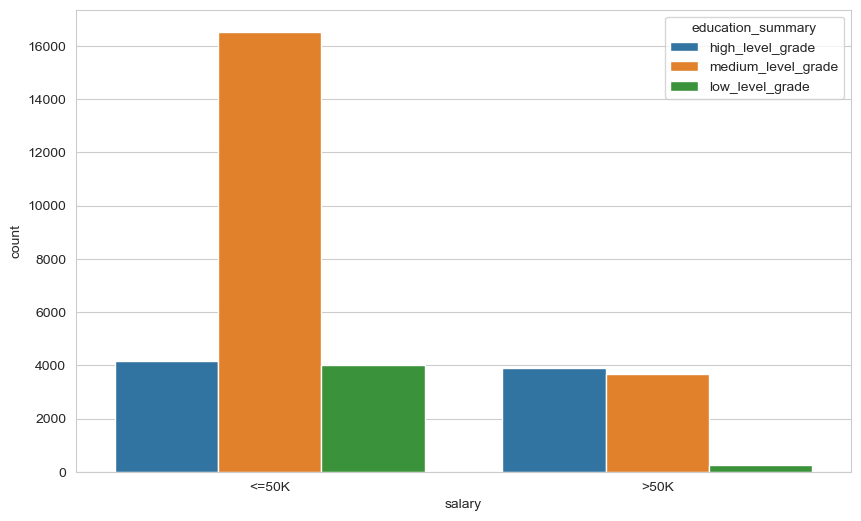

In [70]:
sns.countplot(x = df["salary"], hue = df["education_summary"]);

**Checking the the percentage distribution of person in each these new education levels(high, medium, low) by "salary" levels and visualizing it with pie plot separately**

In [71]:
df.groupby("salary")["education_summary"].value_counts(normalize = True)

salary  education_summary 
<=50K   medium_level_grade   0.670
        high_level_grade     0.168
        low_level_grade      0.162
>50K    high_level_grade     0.499
        medium_level_grade   0.470
        low_level_grade      0.031
Name: education_summary, dtype: float64

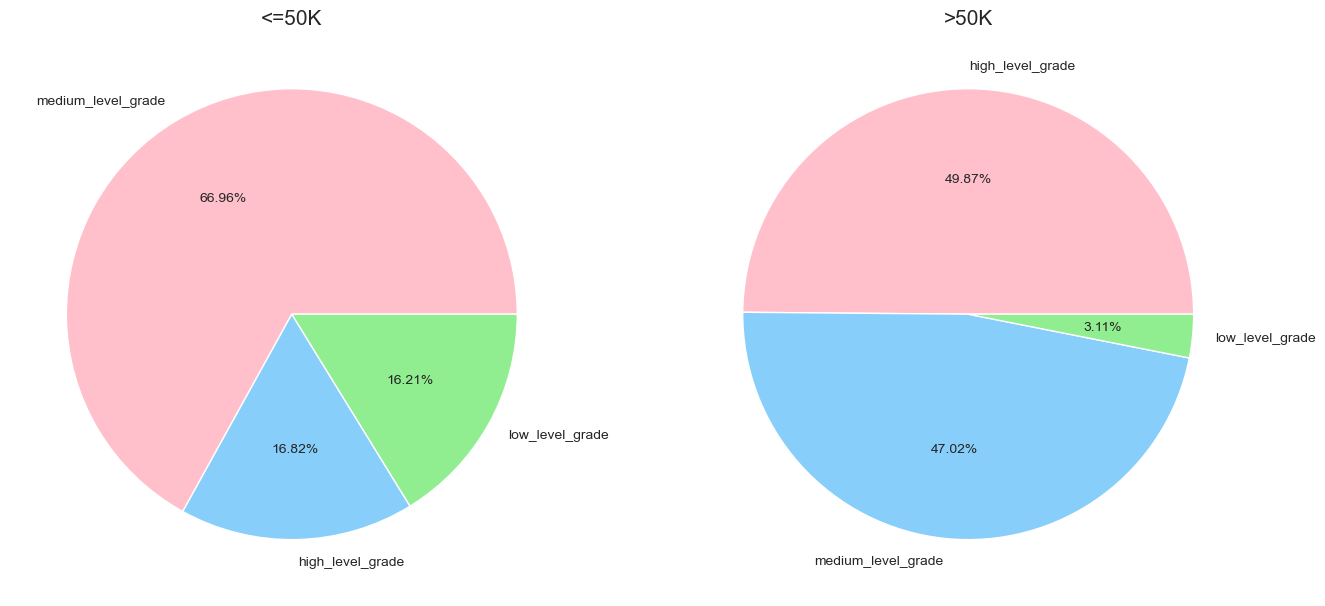

In [72]:
data = df.groupby("salary")["education_summary"].value_counts(normalize = True)
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'lightskyblue', 'lightgreen'])
    ax[idx].set_title(value, fontsize = 15)

In [73]:
df.groupby("salary")[["education_summary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentages"})

salary   education_summary  percentages
0  <=50K  medium_level_grade        0.670
1  <=50K    high_level_grade        0.168
2  <=50K     low_level_grade        0.162
3   >50K    high_level_grade        0.499
4   >50K  medium_level_grade        0.470
5   >50K     low_level_grade        0.031

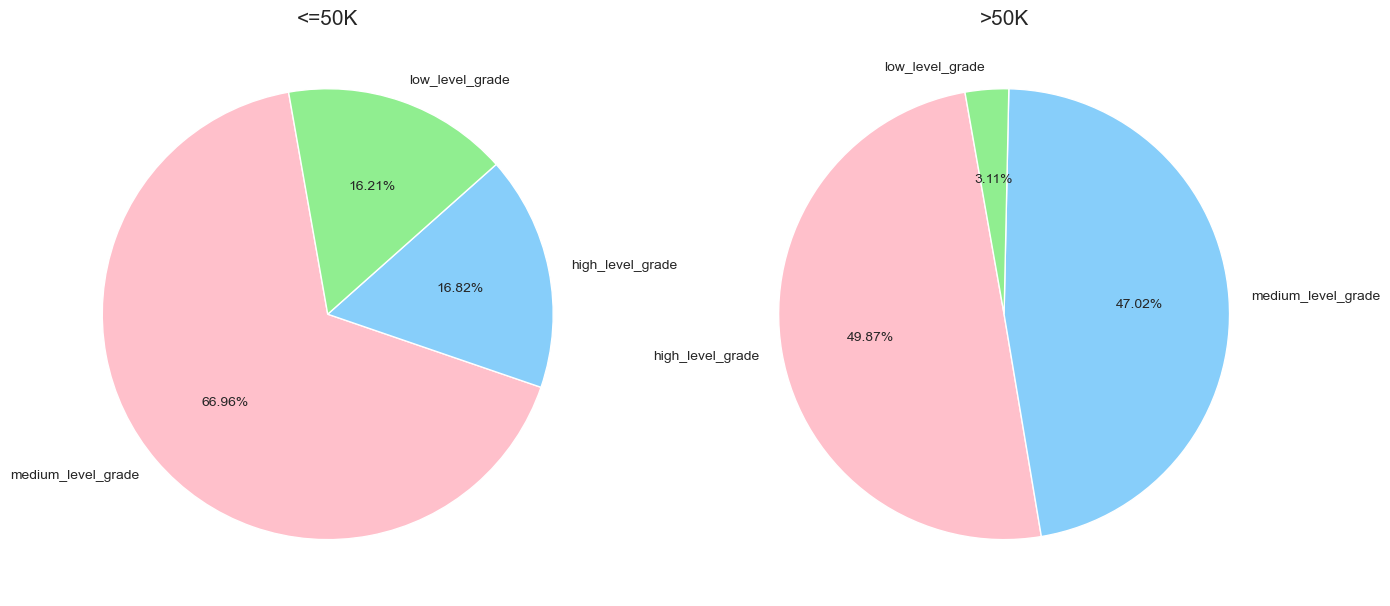

In [74]:
data = df.groupby("salary")[["education_summary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentages"})
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.salary.unique()):
    ax[idx].pie(labels = data[data["salary"] == value]["education_summary"].unique(), x = data[data["salary"] == value]["percentages"].unique(), autopct = "%.2f%%", colors = ['pink', 'lightskyblue', 'lightgreen'], startangle = 100)
    ax[idx].set_title(value, fontsize = 15)

**Result :** There are 2 years of education difference between high-level and low-level income citizens in terms of median measure. As for the categorical education feature, observations are distirbuted mostly in medium-level education category for the low-level income citizens and distirbuted mostly between medium and high-level education category for the high-level income citizens. Outliers are placed both the beyond of the lower and upper bound of the box-plot for the citizens of low income whereas only placed the beyond of the lower bound for the citizens of high income. However, One should note that the structure of education_num feature almost having dicrete data type. So, box-plot inapproporate for this feature.

## marital_status & relationship

**Detecting the similarities between these features by comparing unique values**

In [75]:
df["marital_status"].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [76]:
df["relationship"].value_counts()

Husband           13187
Not-in-family      8292
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

Filling missing values with "Unknown" in the column of "relationship"

In [77]:
df["relationship"].fillna("Unknown", inplace = True)

In [78]:
df.groupby("relationship")["marital_status"].value_counts()

relationship    marital_status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unknown         Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

**Assessment :** A large part of the dataset is composed of husbands married with civil persons and never married persons

**Visualizing the count of person in each categories**

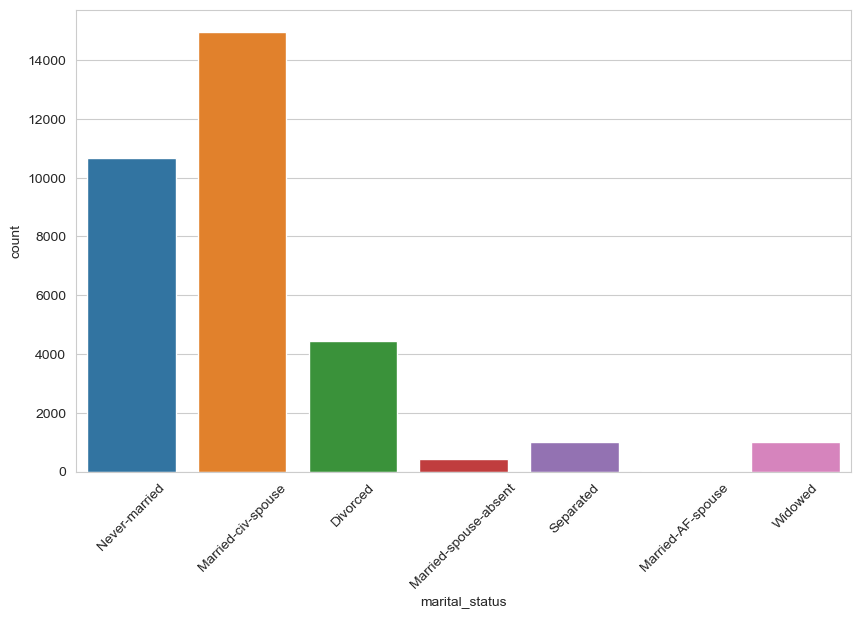

In [79]:
sns.countplot(df["marital_status"])
plt.xticks(rotation = 45);

**Checking the count of person in each "salary" levels by categories and visualizing it with countplot**

In [80]:
df.groupby("marital_status")["salary"].value_counts()

marital_status         salary
Divorced               <=50K      3978
                       >50K        463
Married-AF-spouse      <=50K        13
                       >50K         10
Married-civ-spouse     <=50K      8280
                       >50K       6690
Married-spouse-absent  <=50K       384
                       >50K         34
Never-married          <=50K     10176
                       >50K        491
Separated              <=50K       959
                       >50K         66
Widowed                <=50K       908
                       >50K         85
Name: salary, dtype: int64

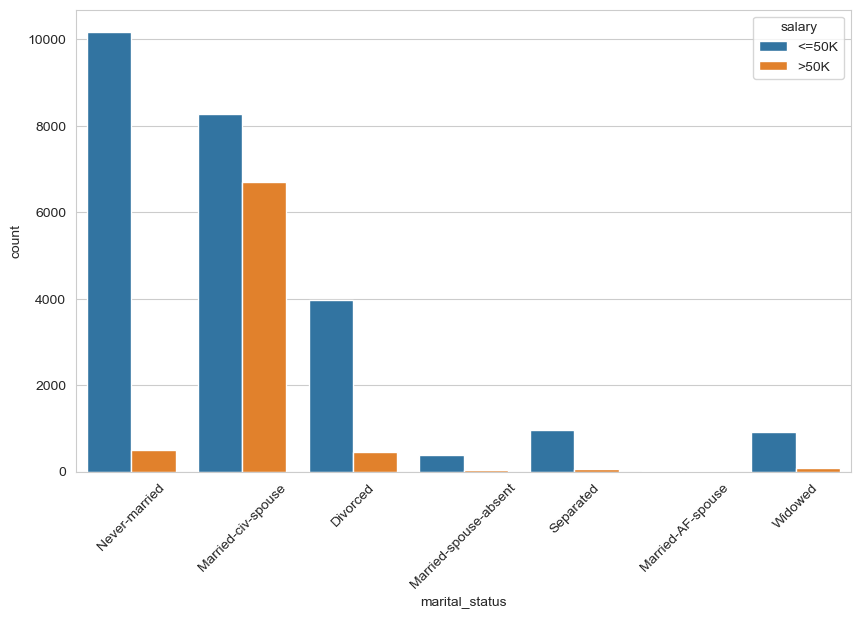

In [81]:
sns.countplot(data = df, x = "marital_status", hue = "salary")
plt.xticks(rotation = 45);

**Decreasing the number of categories in "marital_status" feature as married, and unmarried and creating a new feature with this new categorical data**

In [82]:
def mapping_marital_status(x):
    if x in ["Never-married", "Divorced", "Separated", "Widowed"]:
        return "unmarried"
    elif x in ["Married-civ-spouse", "Married-AF-spouse", "Married-spouse-absent"]:
        return "married"

In [83]:
df["marital_status"].apply(lambda x: mapping_marital_status(x)).value_counts()

unmarried    17126
married      15411
Name: marital_status, dtype: int64

**By using "mapping_marital_status" def function above, creating a new column named "marital_status_summary"**

In [84]:
df["marital_status_summary"] = df["marital_status"].apply(lambda x: mapping_marital_status(x))

**Visualizing the count of person in each categories for these new marital status (married, unmarried)**

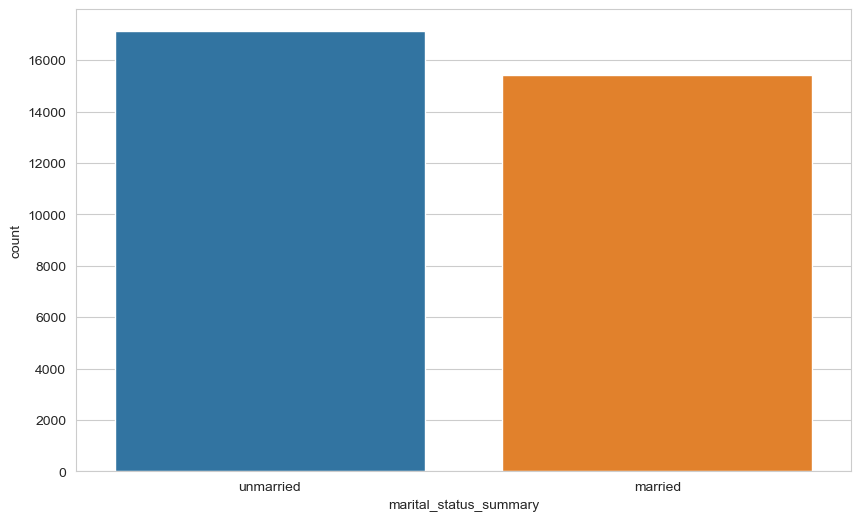

In [85]:
sns.countplot(df["marital_status_summary"]);

**Checking the count of person in each "salary" levels by these new marital status (married, unmarried) and visualizing it with countplot**

In [86]:
df.groupby("marital_status_summary")["salary"].value_counts()

marital_status_summary  salary
married                 <=50K      8677
                        >50K       6734
unmarried               <=50K     16021
                        >50K       1105
Name: salary, dtype: int64

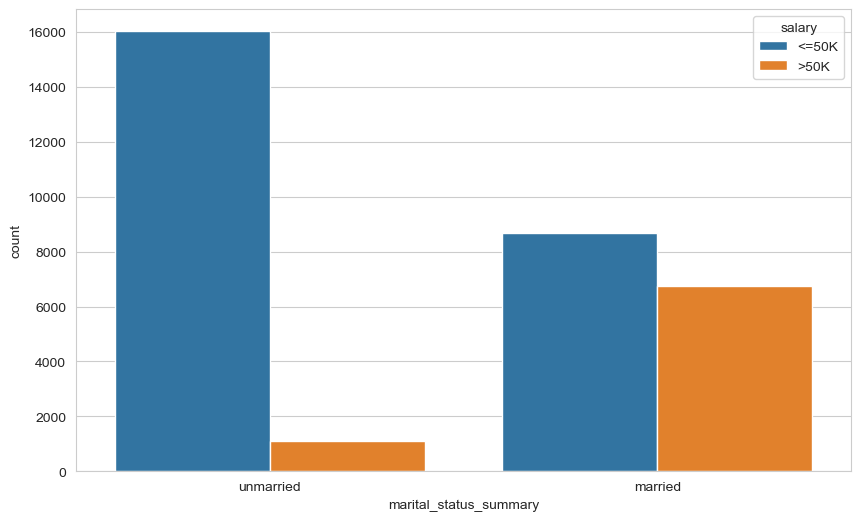

In [87]:
sns.countplot(data = df, x = "marital_status_summary", hue = "salary");

**Checking the percentage distribution of person in each "salary" levels by each new marital status (married, unmarried) and visualizing it with pie plot separately**

In [88]:
df.groupby("marital_status_summary")["salary"].value_counts(normalize = True)

marital_status_summary  salary
married                 <=50K    0.563
                        >50K     0.437
unmarried               <=50K    0.935
                        >50K     0.065
Name: salary, dtype: float64

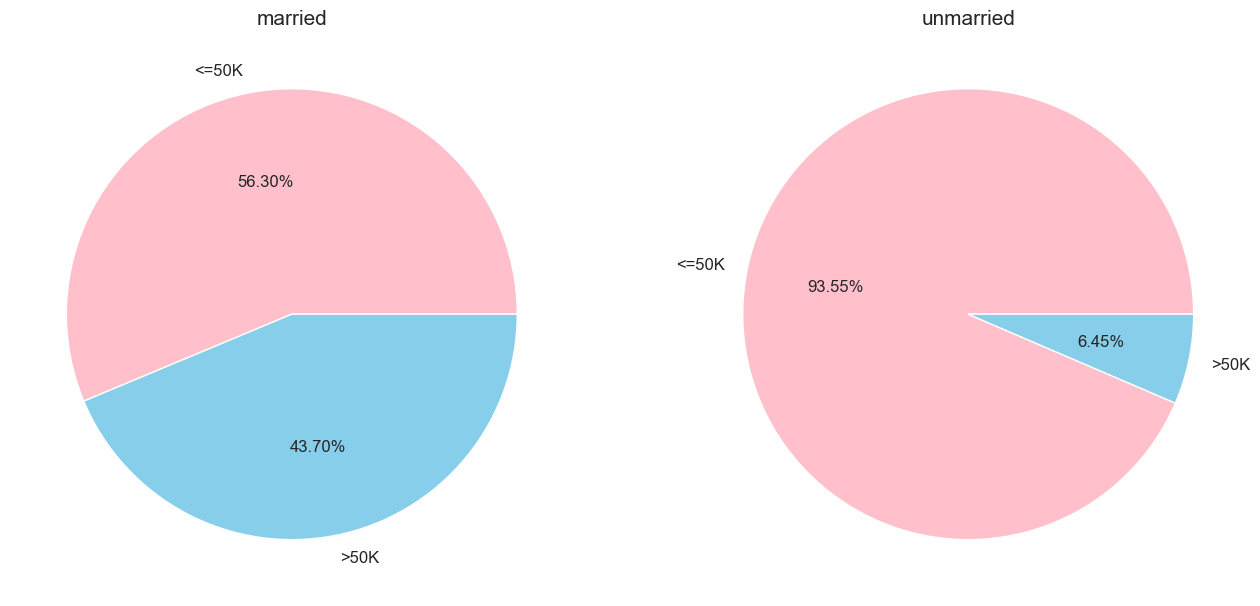

In [89]:
data = df.groupby("marital_status_summary")["salary"].value_counts(normalize = True)
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12})
    ax[idx].set_title(value, fontsize = 15)

**Checking the count of person in each these new marital status (married, unmarried) by "salary" levels and visualizing it with countplot**

In [90]:
df.groupby("salary")["marital_status_summary"].value_counts()

salary  marital_status_summary
<=50K   unmarried                 16021
        married                    8677
>50K    married                    6734
        unmarried                  1105
Name: marital_status_summary, dtype: int64

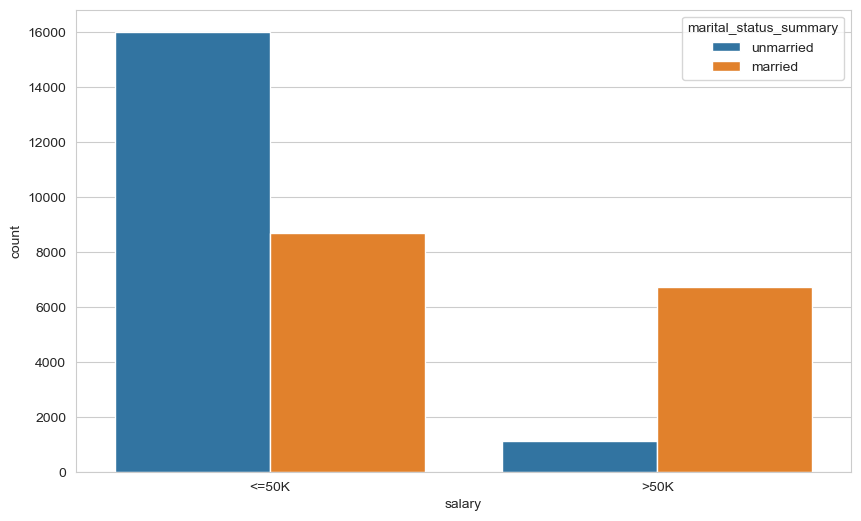

In [91]:
sns.countplot(data = df, x = "salary", hue = "marital_status_summary");

**Checking the the percentage distribution of person in each these new marital status (married, unmarried) by "salary" levels and visualizing it with pie plot separately**

In [92]:
df.groupby("salary")["marital_status_summary"].value_counts(normalize = True)

salary  marital_status_summary
<=50K   unmarried                0.649
        married                  0.351
>50K    married                  0.859
        unmarried                0.141
Name: marital_status_summary, dtype: float64

In [93]:
df.groupby("salary")[["marital_status_summary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentages"}).sort_values(by = ["salary", "marital_status_summary"])

salary marital_status_summary  percentages
1  <=50K                married        0.351
0  <=50K              unmarried        0.649
2   >50K                married        0.859
3   >50K              unmarried        0.141

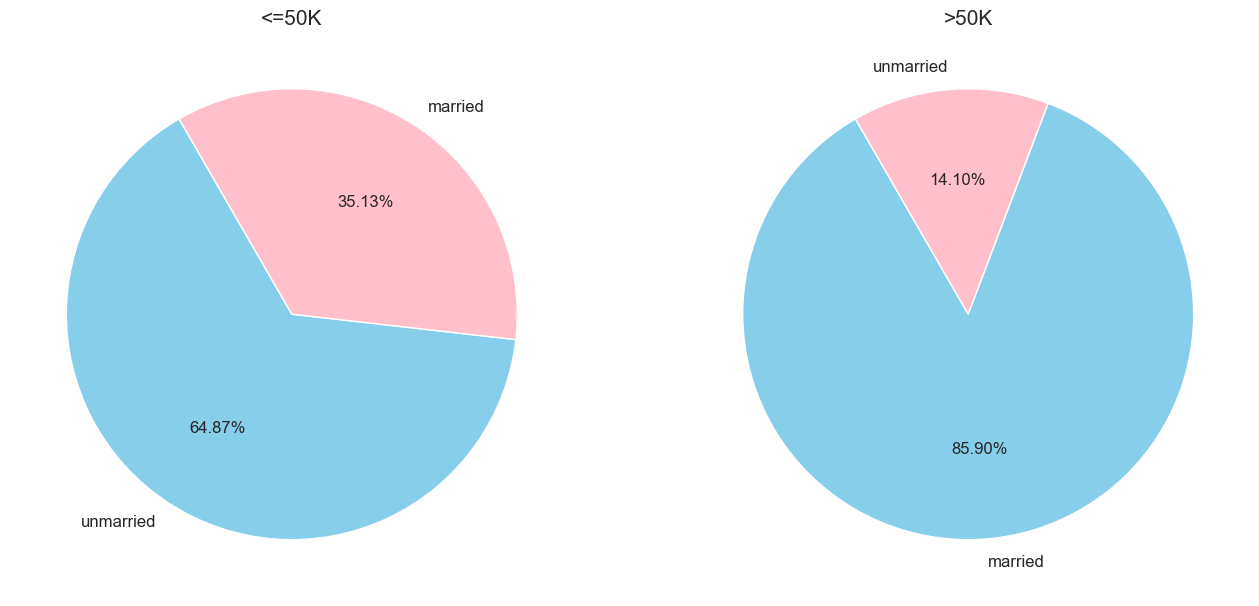

In [94]:
data = df.groupby("salary")[["marital_status_summary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentages"})
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.salary.unique()):
    ax[idx].pie(labels = data[data["salary"] == value]["marital_status_summary"].unique(), x = data[data["salary"] == value]["percentages"].unique(), autopct = "%.2f%%", colors = ['skyblue', 'pink'], textprops={"fontsize":12}, startangle = 120)
    ax[idx].set_title(value, fontsize = 15)

**Result :** Although the number of the unmarried and married individuals almost same in our sample, 65% of the individuals who have low-level salary are unmarried. Beside this, individuals who have high-level salary are married. This may imply that individuals who have high salary are more tend to be getting married or being married imposed to getting high salary.

## workclass

**Checking the count of person in each categories and visualizing it with countplot**

In [95]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

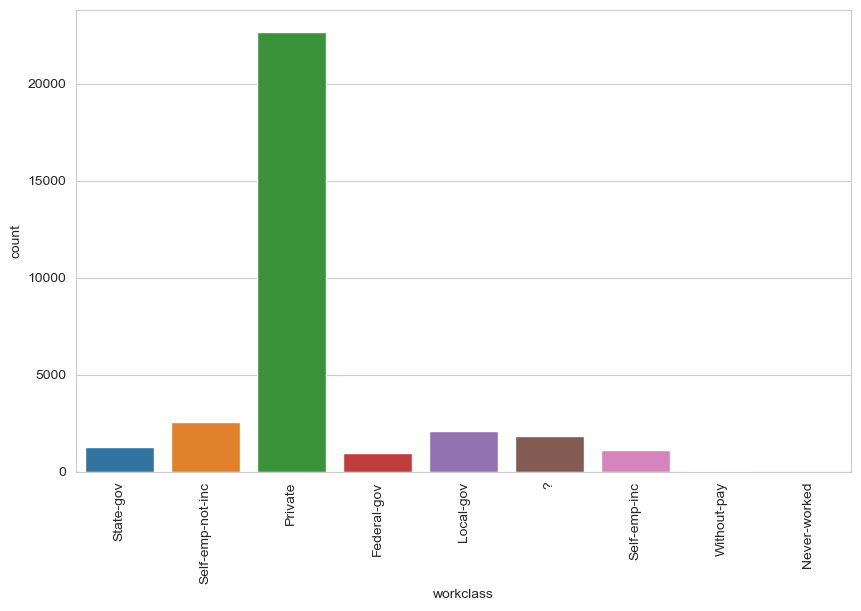

In [96]:
sns.countplot(df["workclass"])
plt.xticks(rotation = 90);

**Replacing the value "?" to the value "Unknown"** 

In [97]:
df["workclass"].replace("?", "Unknown", inplace = True)

**Checking the count of person in each "salary" levels by workclass groups and visualizing it with countplot**

In [98]:
df.groupby("workclass")["salary"].value_counts()

workclass         salary
Federal-gov       <=50K       589
                  >50K        371
Local-gov         <=50K      1476
                  >50K        617
Never-worked      <=50K         7
Private           <=50K     17712
                  >50K       4961
Self-emp-inc      >50K        622
                  <=50K       494
Self-emp-not-inc  <=50K      1816
                  >50K        724
State-gov         <=50K       945
                  >50K        353
Unknown           <=50K      1645
                  >50K        191
Without-pay       <=50K        14
Name: salary, dtype: int64

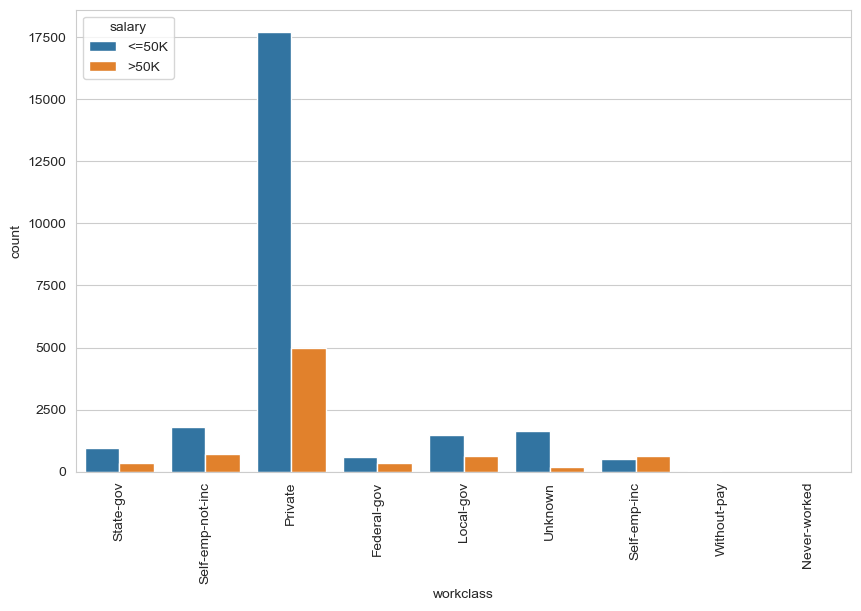

In [99]:
sns.countplot(data = df, x = "workclass", hue = "salary")
plt.xticks(rotation = 90);

**Checking the percentage distribution of person in each "salary" levels by each workclass groups and visualizing it with bar plot**

In [100]:
df.groupby("workclass")["salary"].value_counts(normalize = True)

workclass         salary
Federal-gov       <=50K    0.614
                  >50K     0.386
Local-gov         <=50K    0.705
                  >50K     0.295
Never-worked      <=50K    1.000
Private           <=50K    0.781
                  >50K     0.219
Self-emp-inc      >50K     0.557
                  <=50K    0.443
Self-emp-not-inc  <=50K    0.715
                  >50K     0.285
State-gov         <=50K    0.728
                  >50K     0.272
Unknown           <=50K    0.896
                  >50K     0.104
Without-pay       <=50K    1.000
Name: salary, dtype: float64

In [101]:
df.groupby("workclass")[["salary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"})

workclass salary  percentage
0        Federal-gov  <=50K       0.614
1        Federal-gov   >50K       0.386
2          Local-gov  <=50K       0.705
3          Local-gov   >50K       0.295
4       Never-worked  <=50K       1.000
5            Private  <=50K       0.781
6            Private   >50K       0.219
7       Self-emp-inc   >50K       0.557
8       Self-emp-inc  <=50K       0.443
9   Self-emp-not-inc  <=50K       0.715
10  Self-emp-not-inc   >50K       0.285
11         State-gov  <=50K       0.728
12         State-gov   >50K       0.272
13           Unknown  <=50K       0.896
14           Unknown   >50K       0.104
15       Without-pay  <=50K       1.000

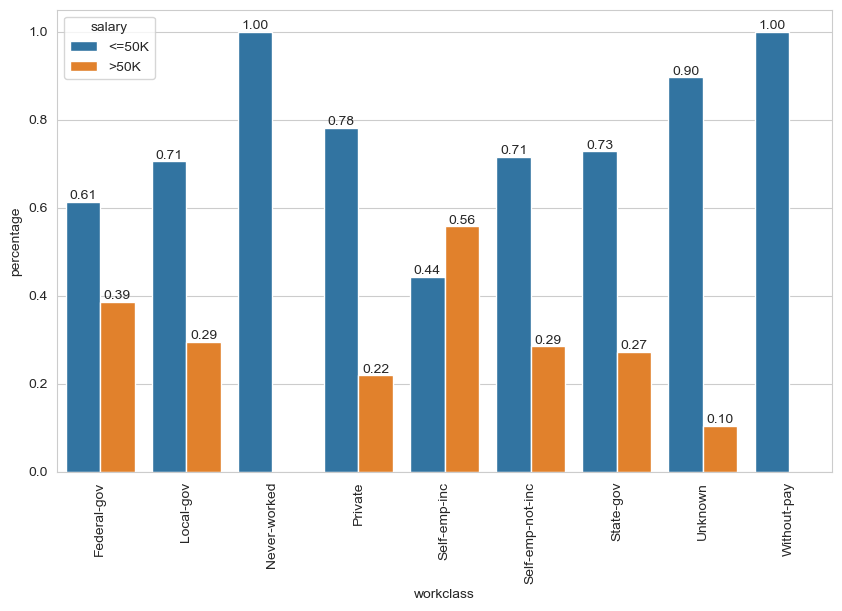

In [102]:
dat = df.groupby("workclass")[["salary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"})
ax = sns.barplot(data = dat, x = "workclass", y = "percentage", hue = "salary")
plt.xticks(rotation = 90);
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f');
ax.bar_label(ax.containers[1], label_type='edge', fmt = '%.2f');

**Checking the count of person in each workclass groups by "salary" levels and visualizing it with countplot**

In [103]:
df.groupby("salary")["workclass"].value_counts()

salary  workclass       
<=50K   Private             17712
        Self-emp-not-inc     1816
        Unknown              1645
        Local-gov            1476
        State-gov             945
        Federal-gov           589
        Self-emp-inc          494
        Without-pay            14
        Never-worked            7
>50K    Private              4961
        Self-emp-not-inc      724
        Self-emp-inc          622
        Local-gov             617
        Federal-gov           371
        State-gov             353
        Unknown               191
Name: workclass, dtype: int64

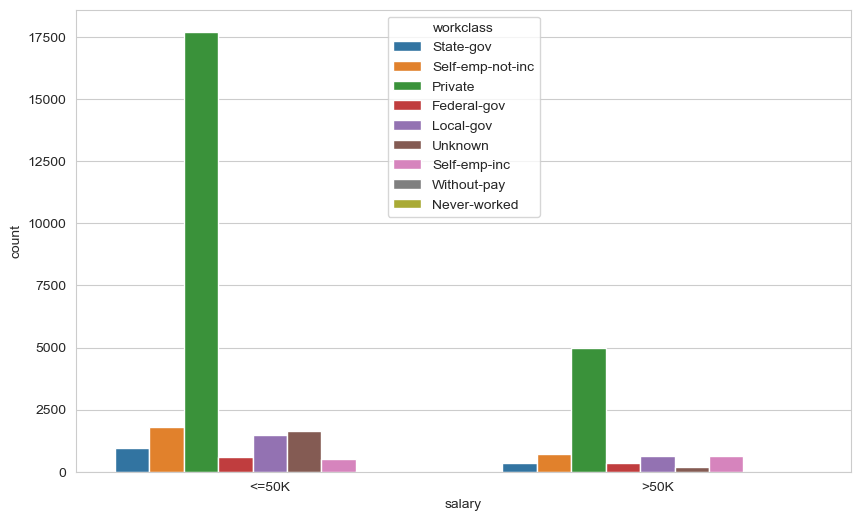

In [104]:
sns.countplot(data = df, x = "salary", hue = "workclass");

**Checking the the percentage distribution of person in each workclass groups by "salary" levels and visualizing it with countplot**

In [105]:
df.groupby("salary")["workclass"].value_counts(normalize = True)

salary  workclass       
<=50K   Private            0.717
        Self-emp-not-inc   0.074
        Unknown            0.067
        Local-gov          0.060
        State-gov          0.038
        Federal-gov        0.024
        Self-emp-inc       0.020
        Without-pay        0.001
        Never-worked       0.000
>50K    Private            0.633
        Self-emp-not-inc   0.092
        Self-emp-inc       0.079
        Local-gov          0.079
        Federal-gov        0.047
        State-gov          0.045
        Unknown            0.024
Name: workclass, dtype: float64

In [106]:
df.groupby("salary")[["workclass"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"}).sort_values(by = ["salary", "workclass"])

salary         workclass  percentage
5   <=50K       Federal-gov       0.024
3   <=50K         Local-gov       0.060
8   <=50K      Never-worked       0.000
0   <=50K           Private       0.717
6   <=50K      Self-emp-inc       0.020
1   <=50K  Self-emp-not-inc       0.074
4   <=50K         State-gov       0.038
2   <=50K           Unknown       0.067
7   <=50K       Without-pay       0.001
13   >50K       Federal-gov       0.047
12   >50K         Local-gov       0.079
9    >50K           Private       0.633
11   >50K      Self-emp-inc       0.079
10   >50K  Self-emp-not-inc       0.092
14   >50K         State-gov       0.045
15   >50K           Unknown       0.024

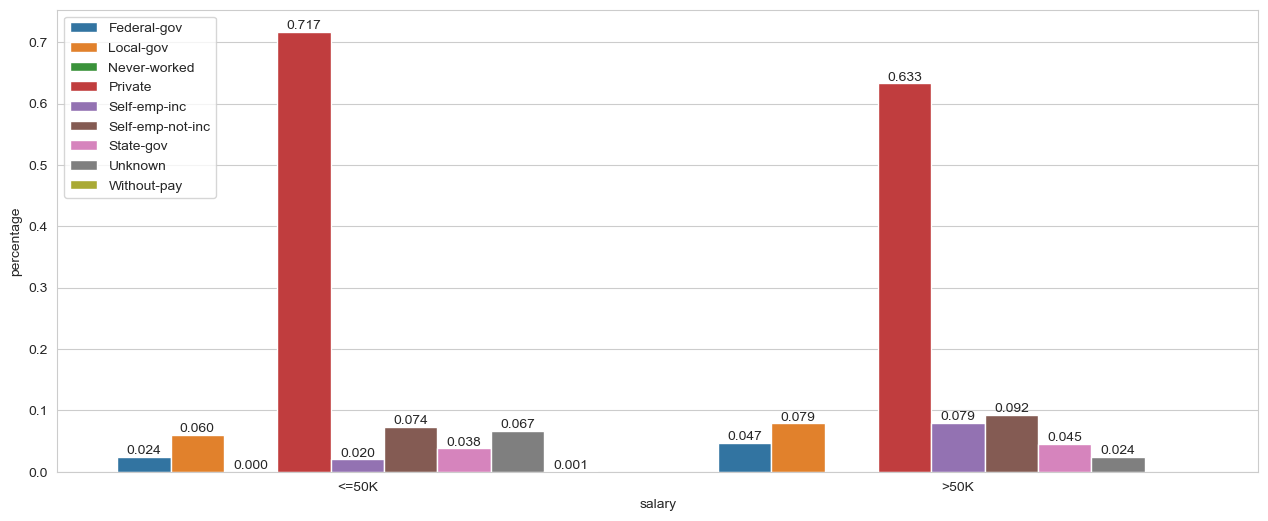

In [107]:
dat = df.groupby("salary")[["workclass"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"}).sort_values(by = ["salary", "workclass"])
fig, ax = plt.subplots(figsize = (15.5,6))
ax = sns.barplot(data = dat, x = "salary", y = "percentage", hue = "workclass");
ax.legend(loc = 2)
for i in range(df["workclass"].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge', fmt = '%.3f');

**Result :** Private sector is the most employed workclass. Countplots imply that Self-Employed individuals have the highest mean salary while individuals employed in private sector have the lowest mean salary except never-worked and unknown workclass category which are zero salary or thought to be error.

## occupation

**Checking the count of person in each categories and visualizing it with countplot**

In [108]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

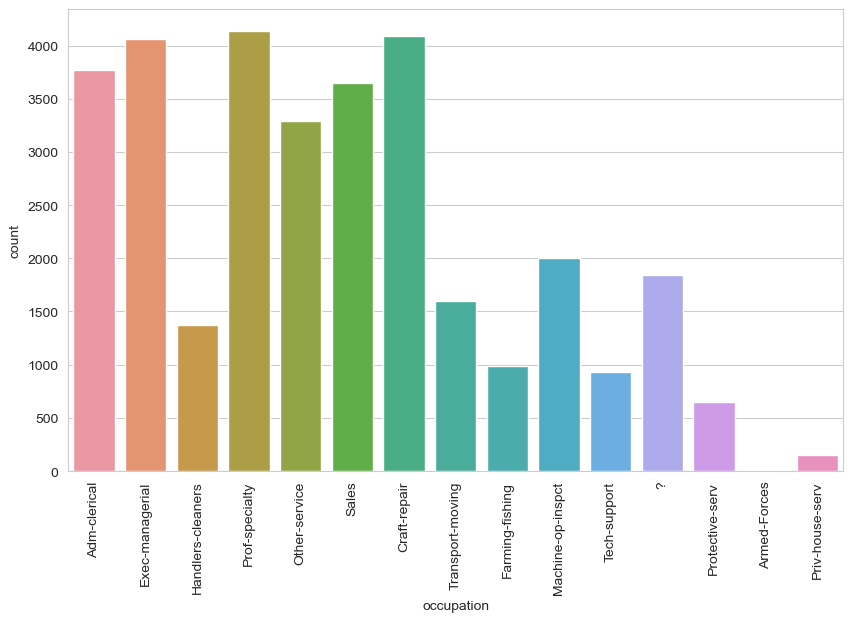

In [109]:
sns.countplot(df["occupation"])
plt.xticks(rotation = 90);

**Replacing the value "?" to the value "Unknown"**

In [110]:
df["occupation"].replace("?", "Unknown", inplace = True)

**Checking the count of person in each "salary" levels by occupation groups and visualizing it with countplot**

In [111]:
df.groupby("occupation")["salary"].value_counts()

occupation         salary
Adm-clerical       <=50K     3261
                   >50K       507
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3165
                   >50K       929
Exec-managerial    <=50K     2097
                   >50K      1968
Farming-fishing    <=50K      877
                   >50K       115
Handlers-cleaners  <=50K     1283
                   >50K        86
Machine-op-inspct  <=50K     1751
                   >50K       249
Other-service      <=50K     3154
                   >50K       137
Priv-house-serv    <=50K      146
                   >50K         1
Prof-specialty     <=50K     2278
                   >50K      1858
Protective-serv    <=50K      438
                   >50K       211
Sales              <=50K     2667
                   >50K       983
Tech-support       <=50K      644
                   >50K       283
Transport-moving   <=50K     1277
                   >50K       320
Unknown            <=5

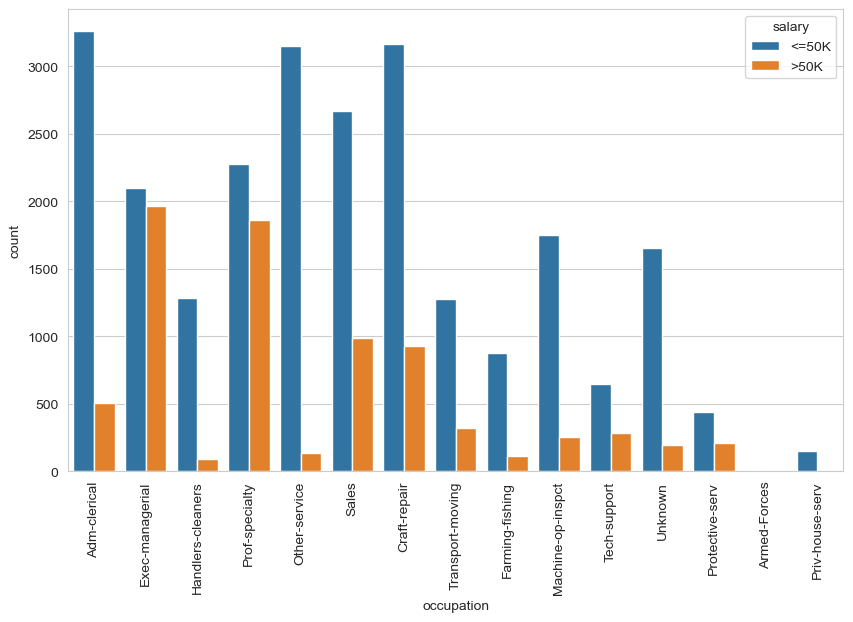

In [112]:
sns.countplot(data = df, x = "occupation", hue = "salary")
plt.xticks(rotation = 90);

**Checking the percentage distribution of person in each "salary" levels by each occupation groups and visualizing it with bar plot**

In [113]:
df.groupby("occupation")["salary"].value_counts(normalize = True)

occupation         salary
Adm-clerical       <=50K    0.865
                   >50K     0.135
Armed-Forces       <=50K    0.889
                   >50K     0.111
Craft-repair       <=50K    0.773
                   >50K     0.227
Exec-managerial    <=50K    0.516
                   >50K     0.484
Farming-fishing    <=50K    0.884
                   >50K     0.116
Handlers-cleaners  <=50K    0.937
                   >50K     0.063
Machine-op-inspct  <=50K    0.875
                   >50K     0.124
Other-service      <=50K    0.958
                   >50K     0.042
Priv-house-serv    <=50K    0.993
                   >50K     0.007
Prof-specialty     <=50K    0.551
                   >50K     0.449
Protective-serv    <=50K    0.675
                   >50K     0.325
Sales              <=50K    0.731
                   >50K     0.269
Tech-support       <=50K    0.695
                   >50K     0.305
Transport-moving   <=50K    0.800
                   >50K     0.200
Unknown            <=5

In [114]:
df.groupby("occupation")[["salary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"})

occupation salary  percentage
0        Adm-clerical  <=50K       0.865
1        Adm-clerical   >50K       0.135
2        Armed-Forces  <=50K       0.889
3        Armed-Forces   >50K       0.111
4        Craft-repair  <=50K       0.773
5        Craft-repair   >50K       0.227
6     Exec-managerial  <=50K       0.516
7     Exec-managerial   >50K       0.484
8     Farming-fishing  <=50K       0.884
9     Farming-fishing   >50K       0.116
10  Handlers-cleaners  <=50K       0.937
11  Handlers-cleaners   >50K       0.063
12  Machine-op-inspct  <=50K       0.875
13  Machine-op-inspct   >50K       0.124
14      Other-service  <=50K       0.958
15      Other-service   >50K       0.042
16    Priv-house-serv  <=50K       0.993
17    Priv-house-serv   >50K       0.007
18     Prof-specialty  <=50K       0.551
19     Prof-specialty   >50K       0.449
20    Protective-serv  <=50K       0.675
21    Protective-serv   >50K       0.325
22              Sales  <=50K       0.731
23              Sales   >50K       0.269
24       Tech-support  <=50K       0.695
25       Tech-support   >50K       0.305
26   Transport-moving  <=50K       0.800
27   Transport-moving   >50K       0.200
28            Unknown  <=50K       0.896
29            Unknown   >50K       0.104

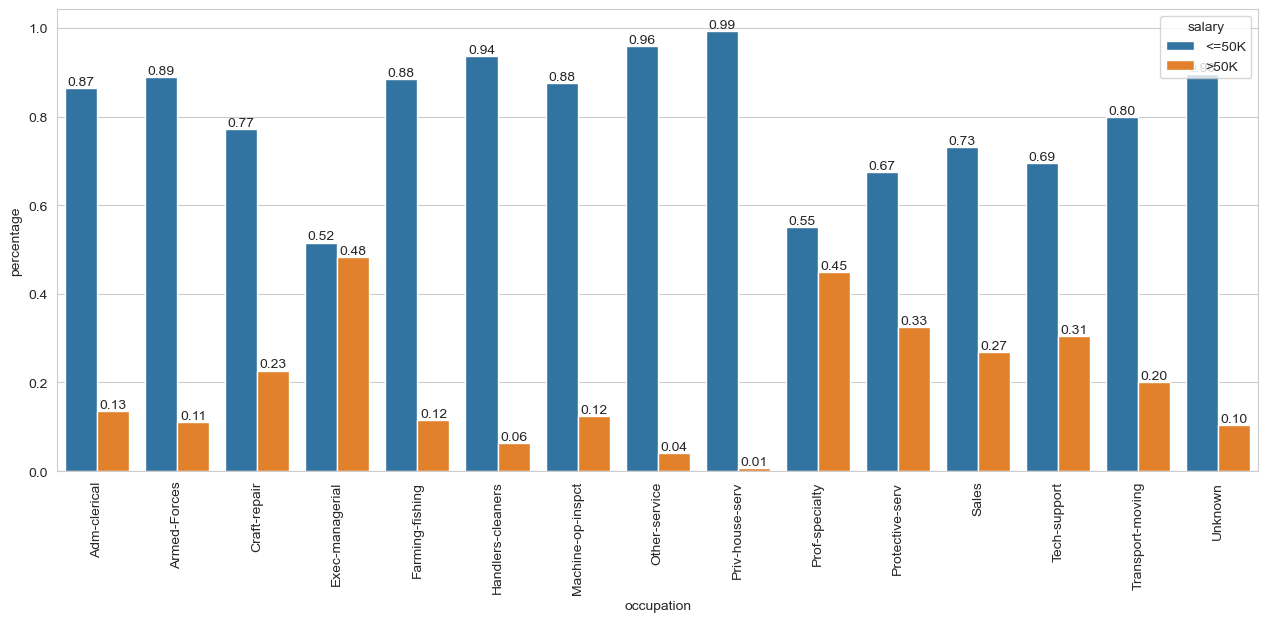

In [115]:
dat = df.groupby("occupation")[["salary"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"})
fig, ax = plt.subplots(figsize = (15.5, 6))
ax = sns.barplot(data = dat, x = "occupation", y = "percentage", hue = "salary")
plt.xticks(rotation = 90);
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f');
ax.bar_label(ax.containers[1], label_type='edge', fmt = '%.2f');

**Checking the count of person in each occupation groups by "salary" levels and visualizing it with countplot**

In [116]:
df.groupby("salary")["occupation"].value_counts()

salary  occupation       
<=50K   Adm-clerical         3261
        Craft-repair         3165
        Other-service        3154
        Sales                2667
        Prof-specialty       2278
        Exec-managerial      2097
        Machine-op-inspct    1751
        Unknown              1652
        Handlers-cleaners    1283
        Transport-moving     1277
        Farming-fishing       877
        Tech-support          644
        Protective-serv       438
        Priv-house-serv       146
        Armed-Forces            8
>50K    Exec-managerial      1968
        Prof-specialty       1858
        Sales                 983
        Craft-repair          929
        Adm-clerical          507
        Transport-moving      320
        Tech-support          283
        Machine-op-inspct     249
        Protective-serv       211
        Unknown               191
        Other-service         137
        Farming-fishing       115
        Handlers-cleaners      86
        Armed-Forces  

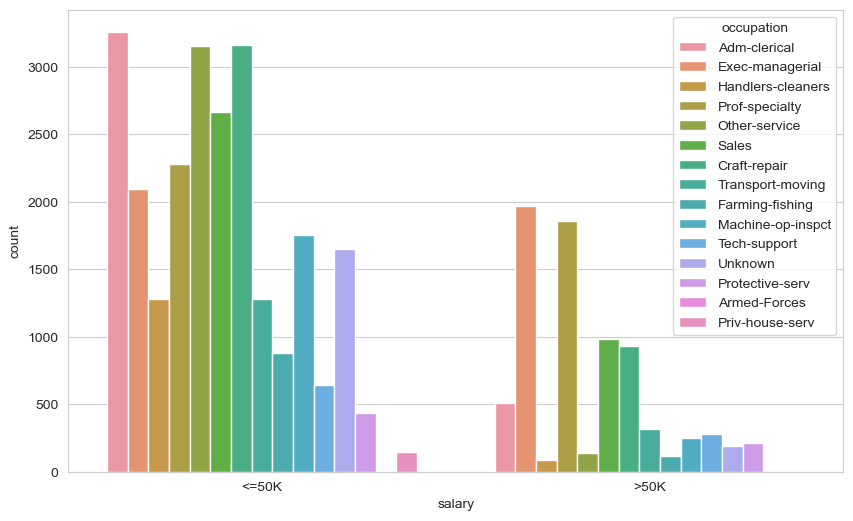

In [117]:
ax = sns.countplot(data = df, x = "salary", hue = "occupation");

**Checking the the percentage distribution of person in each occupation groups by "salary" levels and visualizing it with bar plot**

In [118]:
df.groupby("salary")[["occupation"]].value_counts(normalize = True)

salary  occupation       
<=50K   Adm-clerical        0.132
        Craft-repair        0.128
        Other-service       0.128
        Sales               0.108
        Prof-specialty      0.092
        Exec-managerial     0.085
        Machine-op-inspct   0.071
        Unknown             0.067
        Handlers-cleaners   0.052
        Transport-moving    0.052
        Farming-fishing     0.036
        Tech-support        0.026
        Protective-serv     0.018
        Priv-house-serv     0.006
        Armed-Forces        0.000
>50K    Exec-managerial     0.251
        Prof-specialty      0.237
        Sales               0.125
        Craft-repair        0.119
        Adm-clerical        0.065
        Transport-moving    0.041
        Tech-support        0.036
        Machine-op-inspct   0.032
        Protective-serv     0.027
        Unknown             0.024
        Other-service       0.017
        Farming-fishing     0.015
        Handlers-cleaners   0.011
        Priv-house-ser

In [119]:
df.groupby("salary")[["occupation"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"}).sort_values(by = ["salary", "occupation"])

salary         occupation  percentage
0   <=50K       Adm-clerical       0.132
14  <=50K       Armed-Forces       0.000
1   <=50K       Craft-repair       0.128
5   <=50K    Exec-managerial       0.085
10  <=50K    Farming-fishing       0.036
8   <=50K  Handlers-cleaners       0.052
6   <=50K  Machine-op-inspct       0.071
2   <=50K      Other-service       0.128
13  <=50K    Priv-house-serv       0.006
4   <=50K     Prof-specialty       0.092
12  <=50K    Protective-serv       0.018
3   <=50K              Sales       0.108
11  <=50K       Tech-support       0.026
9   <=50K   Transport-moving       0.052
7   <=50K            Unknown       0.067
19   >50K       Adm-clerical       0.065
29   >50K       Armed-Forces       0.000
18   >50K       Craft-repair       0.119
15   >50K    Exec-managerial       0.251
26   >50K    Farming-fishing       0.015
27   >50K  Handlers-cleaners       0.011
22   >50K  Machine-op-inspct       0.032
25   >50K      Other-service       0.017
28   >50K    Priv-house-serv       0.000
16   >50K     Prof-specialty       0.237
23   >50K    Protective-serv       0.027
17   >50K              Sales       0.125
21   >50K       Tech-support       0.036
20   >50K   Transport-moving       0.041
24   >50K            Unknown       0.024

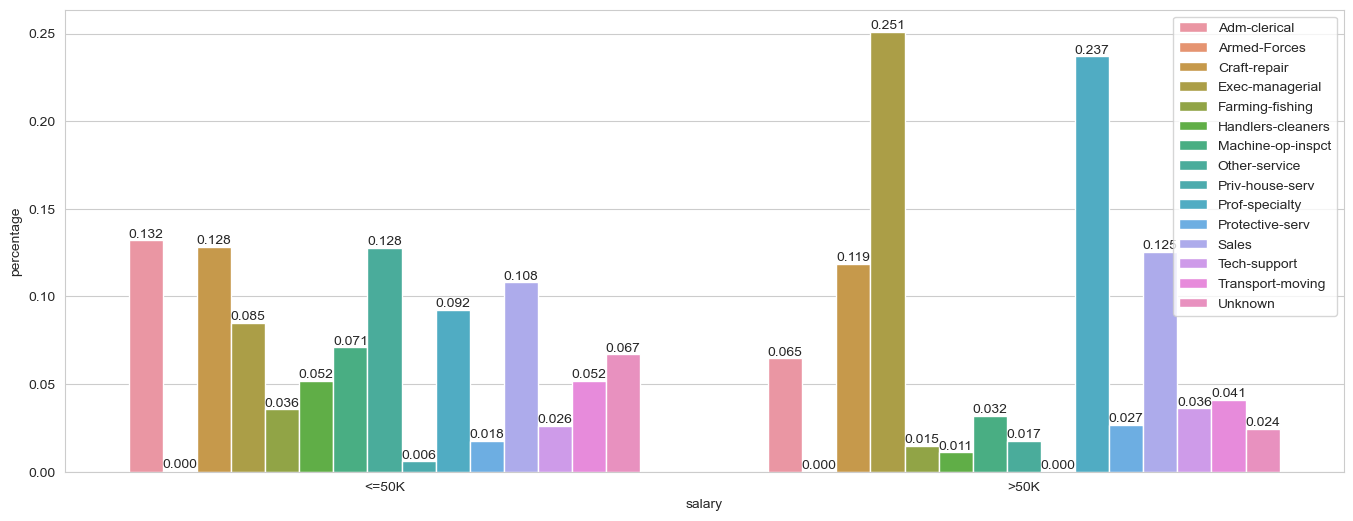

In [120]:
dat = df.groupby("salary")[["occupation"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"}).sort_values(by = ["salary", "occupation"])
fig, ax = plt.subplots(figsize = (16.5,6))
ax = sns.barplot(data = dat, x = "salary", y = "percentage", hue = "occupation");
ax.legend(loc = 1)
for i in range(df["occupation"].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge', fmt = '%.3f');

**Result :** The most 3 largest part in the high-level salary occupations are Exec-managerial, Prof-speciality and Sales. Also one can concludes that Exec-managerial is the most highest paid occupation. Because almost half of the Exec-managerial occupation get more than 50K salary.

## race

**Checking the count of person in each categories and visualizing it with countplot**

In [122]:
df["race"].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

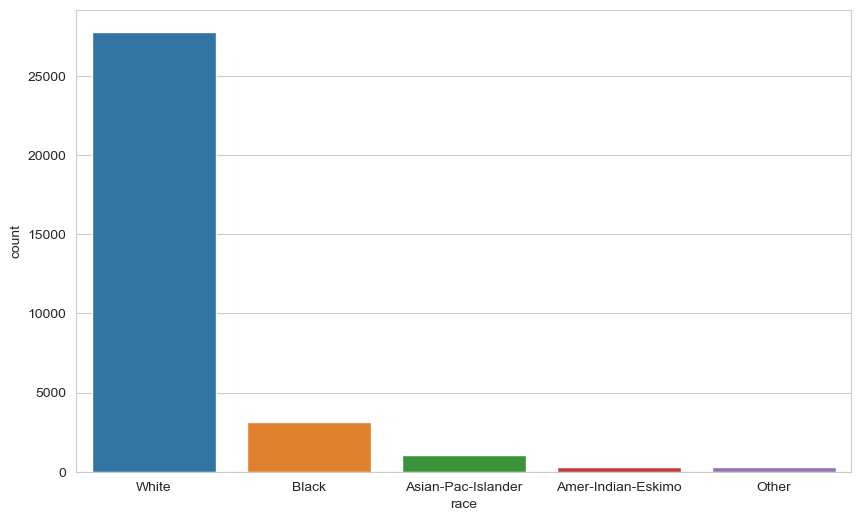

In [123]:
sns.countplot(df["race"]);

**Checking the count of person in each "salary" levels by races and visualizing it with countplot**

In [124]:
df.groupby("race")["salary"].value_counts()

race                salary
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       762
                    >50K        276
Black               <=50K      2735
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20680
                    >50K       7115
Name: salary, dtype: int64

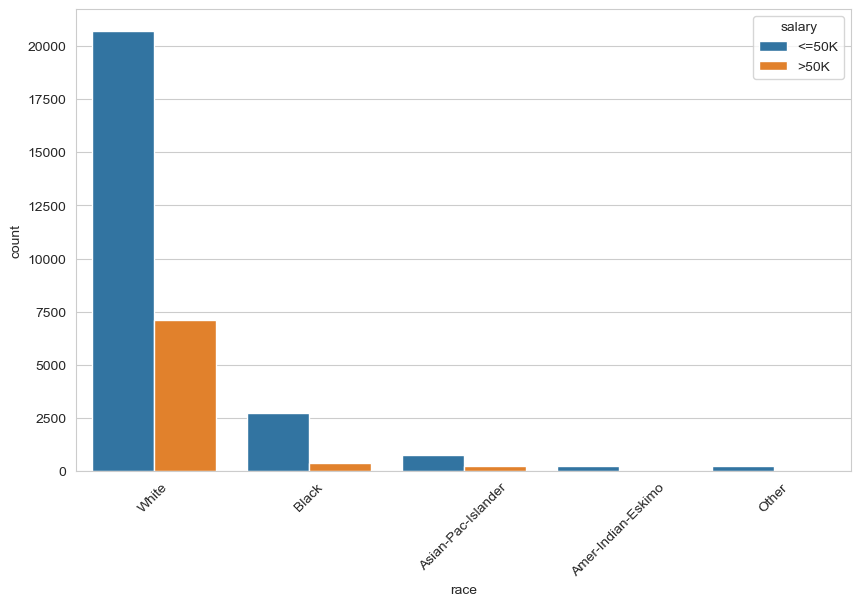

In [125]:
sns.countplot(data = df, x = "race", hue = "salary")
plt.xticks(rotation = 45);

**Checking the percentage distribution of person in each "salary" levels by each races and visualizing it with pie plot**

In [126]:
df.groupby("race")["salary"].value_counts(normalize = True)

race                salary
Amer-Indian-Eskimo  <=50K    0.884
                    >50K     0.116
Asian-Pac-Islander  <=50K    0.734
                    >50K     0.266
Black               <=50K    0.876
                    >50K     0.124
Other               <=50K    0.908
                    >50K     0.092
White               <=50K    0.744
                    >50K     0.256
Name: salary, dtype: float64

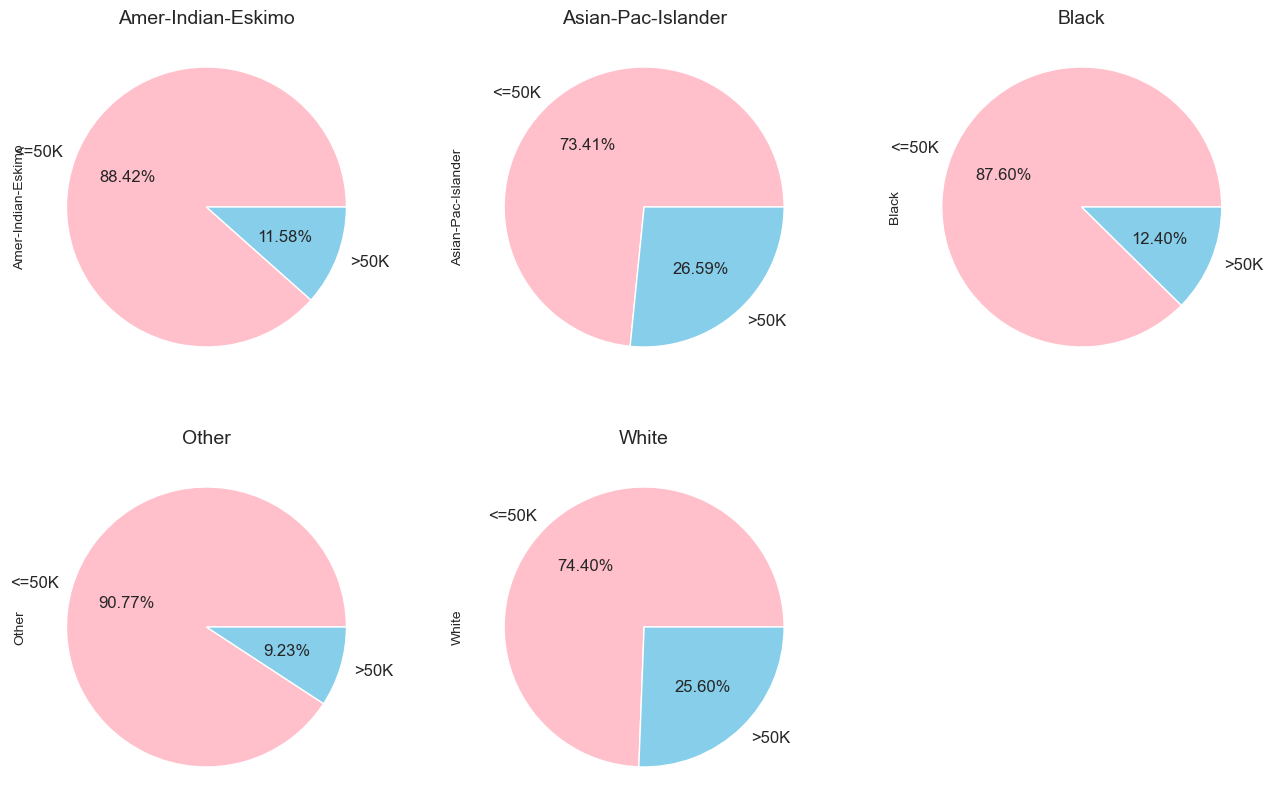

In [127]:
fig, axes = plt.subplots(2, 3, figsize = (16, 10))
data = df.groupby("race")[["salary"]].value_counts(normalize = True).unstack().T
axes[0,0].set_title("Amer-Indian-Eskimo", fontsize = 14)
data.iloc[:,0:1].plot.pie(ax = axes[0,0], subplots = True, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12}, legend = False);
axes[0,1].set_title("Asian-Pac-Islander", fontsize = 14)
data.iloc[:,1:2].plot.pie(ax = axes[0,1], subplots = True, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12}, legend = False);
axes[0,2].set_title("Black", fontsize = 14)
data.iloc[:,2:3].plot.pie(ax = axes[0,2], subplots = True, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12}, legend = False);
axes[1,0].set_title("Other", fontsize = 14)
data.iloc[:,3:4].plot.pie(ax = axes[1,0], subplots = True, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12}, legend = False);
axes[1,1].set_title("White", fontsize = 14)
data.iloc[:,4:5].plot.pie(ax = axes[1,1], subplots = True, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12}, legend = False);
axes[1,2].set_axis_off();

**Checking the count of person in each races by "salary" levels and visualizing it with countplot**

In [128]:
df.groupby("salary")["race"].value_counts()

salary  race              
<=50K   White                 20680
        Black                  2735
        Asian-Pac-Islander      762
        Amer-Indian-Eskimo      275
        Other                   246
>50K    White                  7115
        Black                   387
        Asian-Pac-Islander      276
        Amer-Indian-Eskimo       36
        Other                    25
Name: race, dtype: int64

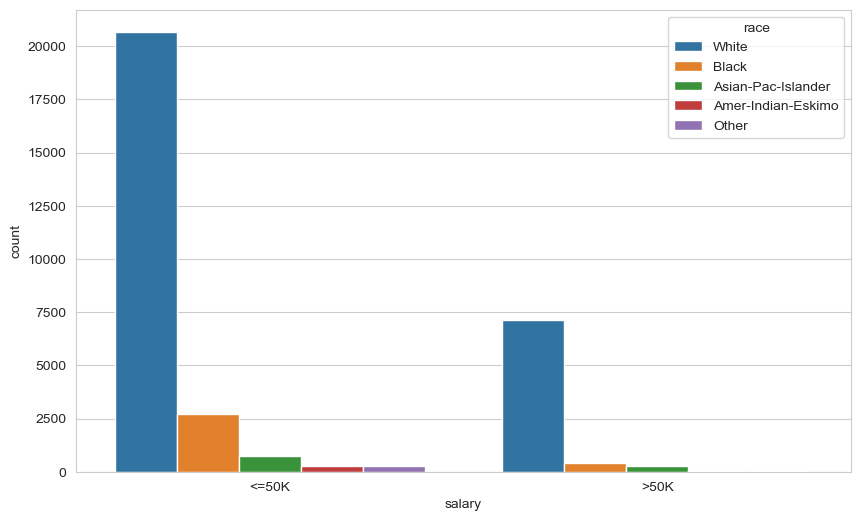

In [129]:
sns.countplot(data = df, x = "salary", hue = "race");

**Checking the the percentage distribution of person in each races by "salary" levels and visualizing it with bar plot**

In [130]:
df.groupby("salary")["race"].value_counts(normalize = True)

salary  race              
<=50K   White                0.837
        Black                0.111
        Asian-Pac-Islander   0.031
        Amer-Indian-Eskimo   0.011
        Other                0.010
>50K    White                0.908
        Black                0.049
        Asian-Pac-Islander   0.035
        Amer-Indian-Eskimo   0.005
        Other                0.003
Name: race, dtype: float64

In [131]:
df.groupby("salary")[["race"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"}).sort_values(by = ["salary", "race"])

salary                race  percentage
3  <=50K  Amer-Indian-Eskimo       0.011
2  <=50K  Asian-Pac-Islander       0.031
1  <=50K               Black       0.111
4  <=50K               Other       0.010
0  <=50K               White       0.837
8   >50K  Amer-Indian-Eskimo       0.005
7   >50K  Asian-Pac-Islander       0.035
6   >50K               Black       0.049
9   >50K               Other       0.003
5   >50K               White       0.908

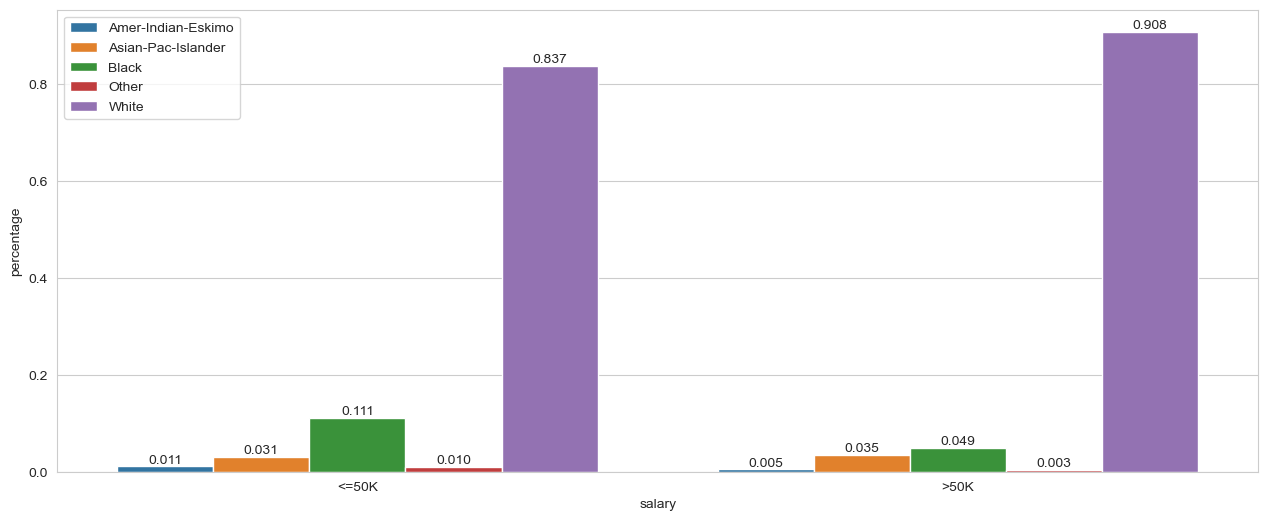

In [132]:
dat = df.groupby("salary")[["race"]].value_counts(normalize = True).to_frame().reset_index().rename(columns = {0:"percentage"}).sort_values(by = ["salary", "race"])
fig, ax = plt.subplots(figsize = (15.5,6))
ax = sns.barplot(data = dat, x = "salary", y = "percentage", hue = "race")
ax.legend(loc = 2)
for i in range(df["race"].nunique()):
    ax.bar_label(ax.containers[i], label_type='edge', fmt = '%.3f');

**Result :** Dominant race group is White. White and Asian-Pac-Islander races are more 50k+ salary ratios than other races.

## gender

**Checking the count of person in each gender and visualizing it with countplot**

In [133]:
df["gender"].value_counts()

Male      21775
Female    10762
Name: gender, dtype: int64

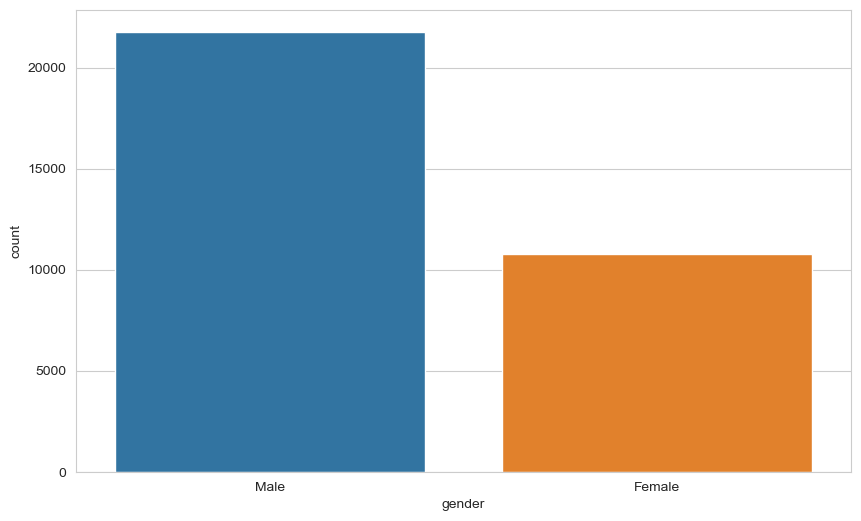

In [134]:
sns.countplot(df["gender"]);

**Checking the count of person in each "salary" levels by gender and visualizing it with countplot**

In [135]:
df.groupby("gender")["salary"].value_counts()

gender  salary
Female  <=50K      9583
        >50K       1179
Male    <=50K     15115
        >50K       6660
Name: salary, dtype: int64

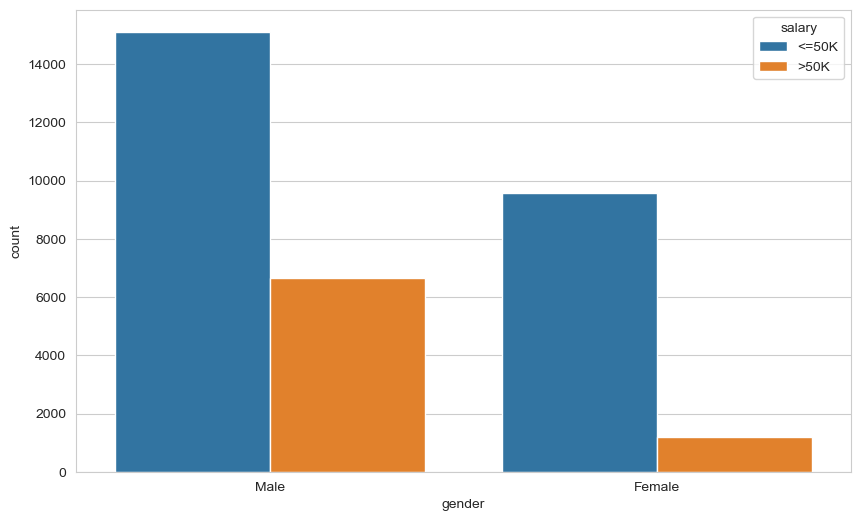

In [136]:
sns.countplot(data = df, x = "gender", hue = "salary");

**Checking the percentage distribution of person in each "salary" levels by each gender and visualizing it with pie plot**

In [137]:
df.groupby("gender")["salary"].value_counts(normalize = True)

gender  salary
Female  <=50K    0.890
        >50K     0.110
Male    <=50K    0.694
        >50K     0.306
Name: salary, dtype: float64

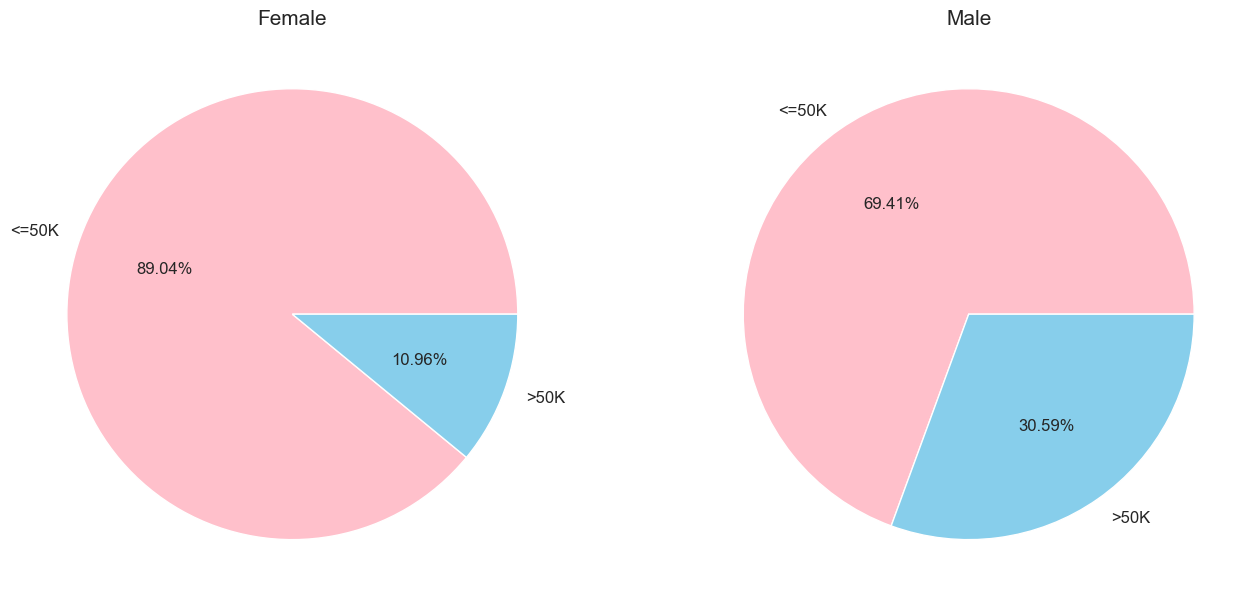

In [138]:
data = df.groupby("gender")["salary"].value_counts(normalize = True)
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12})
    ax[idx].set_title(value, fontsize = 15)

**Checking the count of person in each gender by "salary" levels and visualizing it with countplot**

In [139]:
df.groupby("salary")["gender"].value_counts()

salary  gender
<=50K   Male      15115
        Female     9583
>50K    Male       6660
        Female     1179
Name: gender, dtype: int64

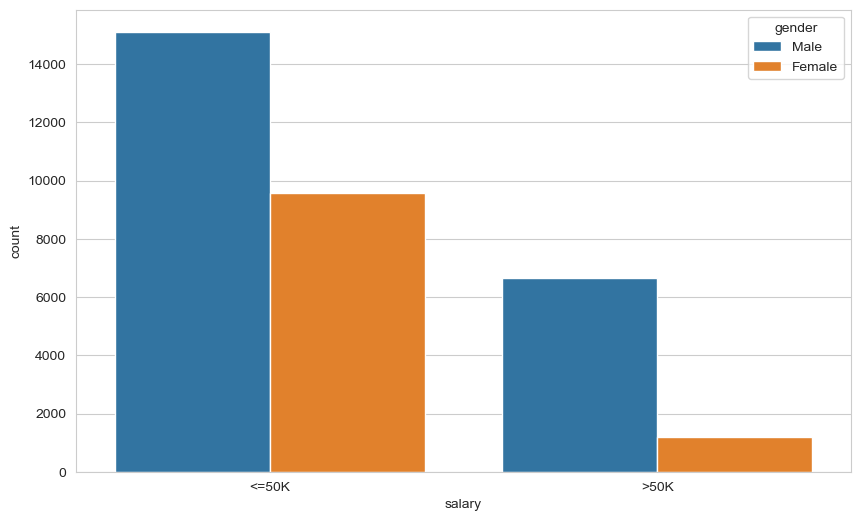

In [140]:
sns.countplot(data = df, x = "salary", hue = "gender");

**Checking the the percentage distribution of person in each gender by "salary" levels and visualizing it with pie plot**

In [141]:
df.groupby("salary")["gender"].value_counts(normalize = True)

salary  gender
<=50K   Male     0.612
        Female   0.388
>50K    Male     0.850
        Female   0.150
Name: gender, dtype: float64

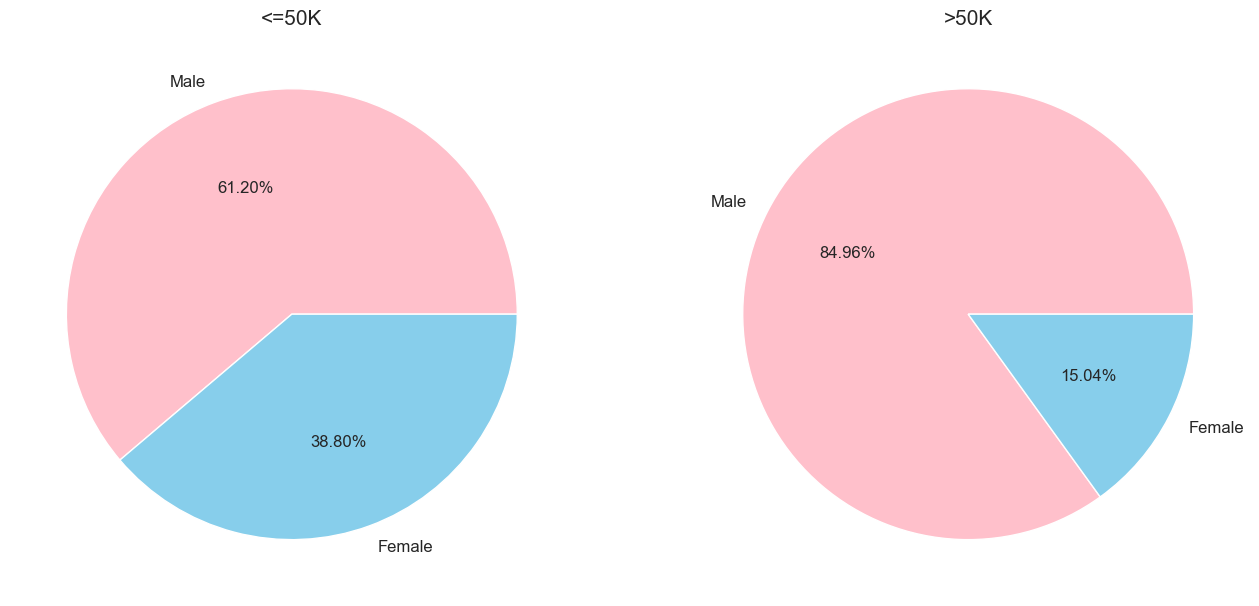

In [142]:
data = df.groupby("salary")["gender"].value_counts(normalize = True)
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12})
    ax[idx].set_title(value, fontsize = 15)

**Result :** 89% of womans have salary less than 50K while this ratio reported as 69% in mens. Pie plots also show that 61% of the salary category less than 50K accounts by woman citiziens. This implies wage inequality.

## native_country

**Checking the count of person in each categories and visualizing it with countplot**

In [143]:
df["native_country"].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

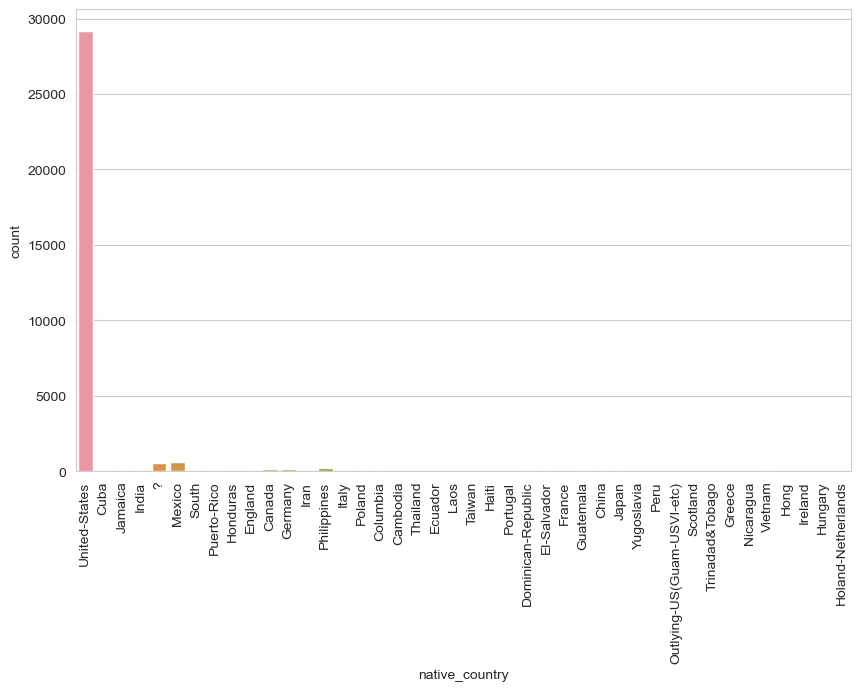

In [144]:
sns.countplot(df["native_country"])
plt.xticks(rotation = 90);

**Replacing the value "?" to the value "Unknown"** 

In [145]:
df["native_country"].replace("?", "Unknown", inplace = True)

**Decreasing the number of categories in "native_country" feature as US, and Others and creating a new feature with this new categorical data**

In [146]:
def mapping_native_country(x):
    if x == "United-States":
        return "US"
    else:
        return "Others"

In [147]:
df["native_country"].apply(lambda x: mapping_native_country(x)).value_counts()

US        29153
Others     3384
Name: native_country, dtype: int64

By using "mapping_native_country" def function above, creating a new column named "native_country_summary"

In [148]:
df["native_country_summary"] = df["native_country"].apply(lambda x: mapping_native_country(x))
df["native_country_summary"]

0            US
1            US
2            US
3            US
4        Others
          ...  
32556        US
32557        US
32558        US
32559        US
32560        US
Name: native_country_summary, Length: 32537, dtype: object

**Visualizing the count of person in each new categories (US, Others)**

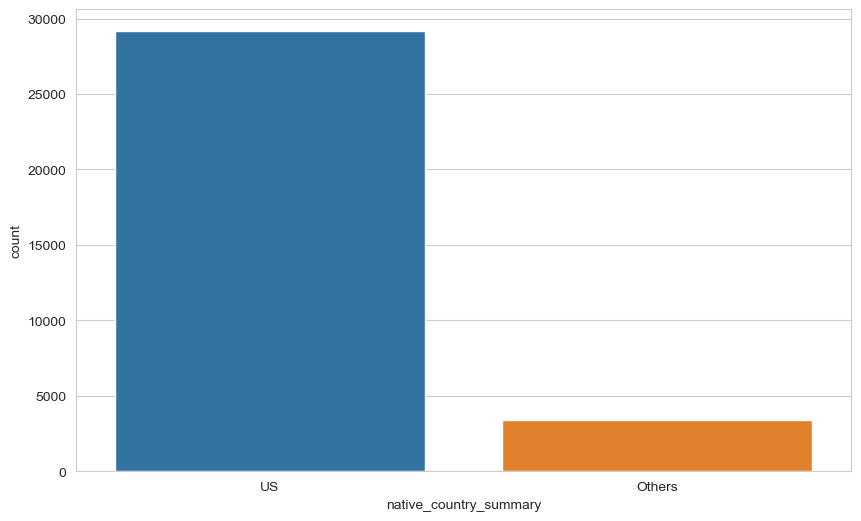

In [149]:
sns.countplot(df["native_country_summary"]);

**Checking the count of person in each "salary" levels by these new native countries (US, Others) and visualizing it with countplot**

In [150]:
df.groupby("native_country_summary")["salary"].value_counts()

native_country_summary  salary
Others                  <=50K      2714
                        >50K        670
US                      <=50K     21984
                        >50K       7169
Name: salary, dtype: int64

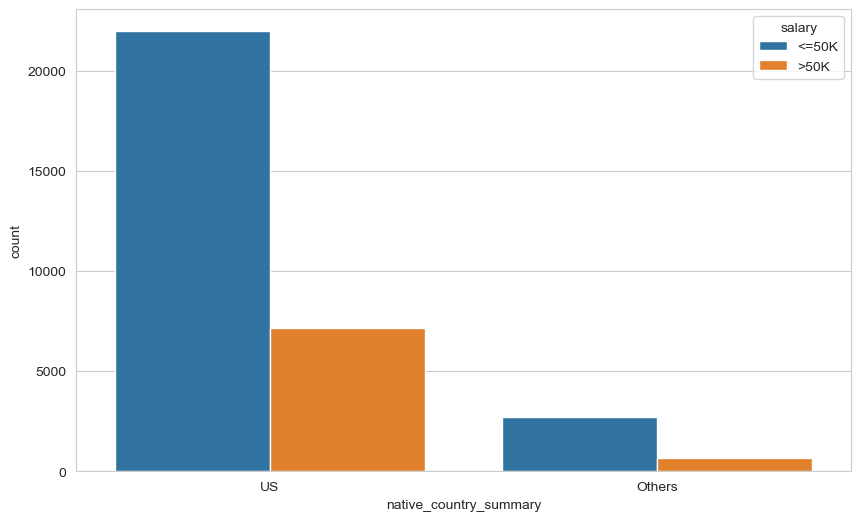

In [151]:
sns.countplot(data = df, x = "native_country_summary", hue = "salary");

**Checking the percentage distribution of person in each "salary" levels by each new native countries (US, Others) and visualizing it with pie plot separately**

In [152]:
df.groupby("native_country_summary")["salary"].value_counts(normalize = True)

native_country_summary  salary
Others                  <=50K    0.802
                        >50K     0.198
US                      <=50K    0.754
                        >50K     0.246
Name: salary, dtype: float64

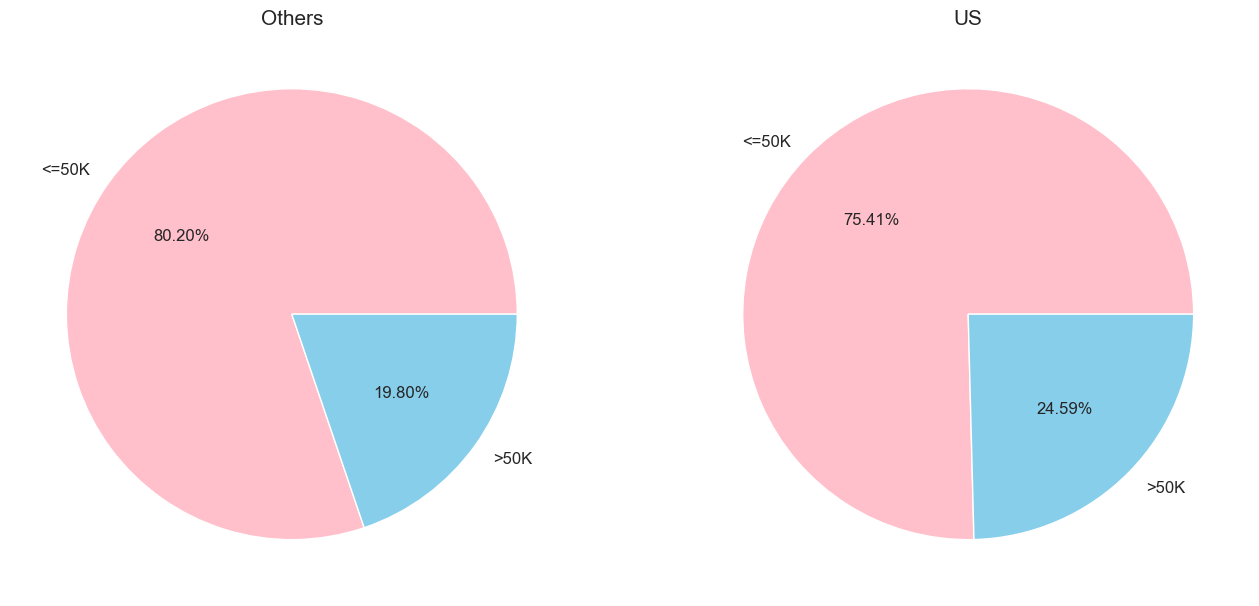

In [153]:
data = df.groupby("native_country_summary")["salary"].value_counts(normalize = True)
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12})
    ax[idx].set_title(value, fontsize = 15)

**Checking the count of person in each these new native countries (US, Others) by "salary" levels and visualizing it with countplot**

In [154]:
df.groupby("salary")["native_country_summary"].value_counts()

salary  native_country_summary
<=50K   US                        21984
        Others                     2714
>50K    US                         7169
        Others                      670
Name: native_country_summary, dtype: int64

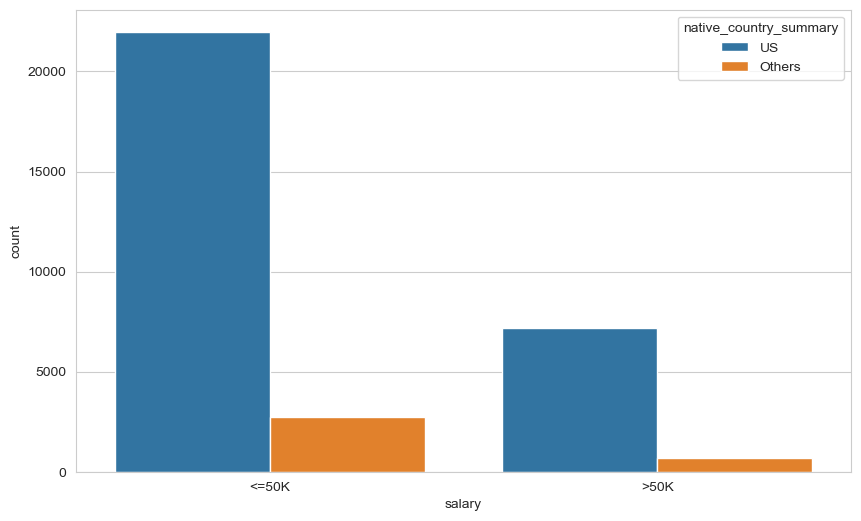

In [155]:
sns.countplot(data = df, x = "salary", hue = "native_country_summary");

**Checking the the percentage distribution of person in each these new native countries (US, Others) by "salary" levels and visualizing it with pie plot separately**

In [156]:
df.groupby("salary")["native_country_summary"].value_counts(normalize = True)

salary  native_country_summary
<=50K   US                       0.890
        Others                   0.110
>50K    US                       0.915
        Others                   0.085
Name: native_country_summary, dtype: float64

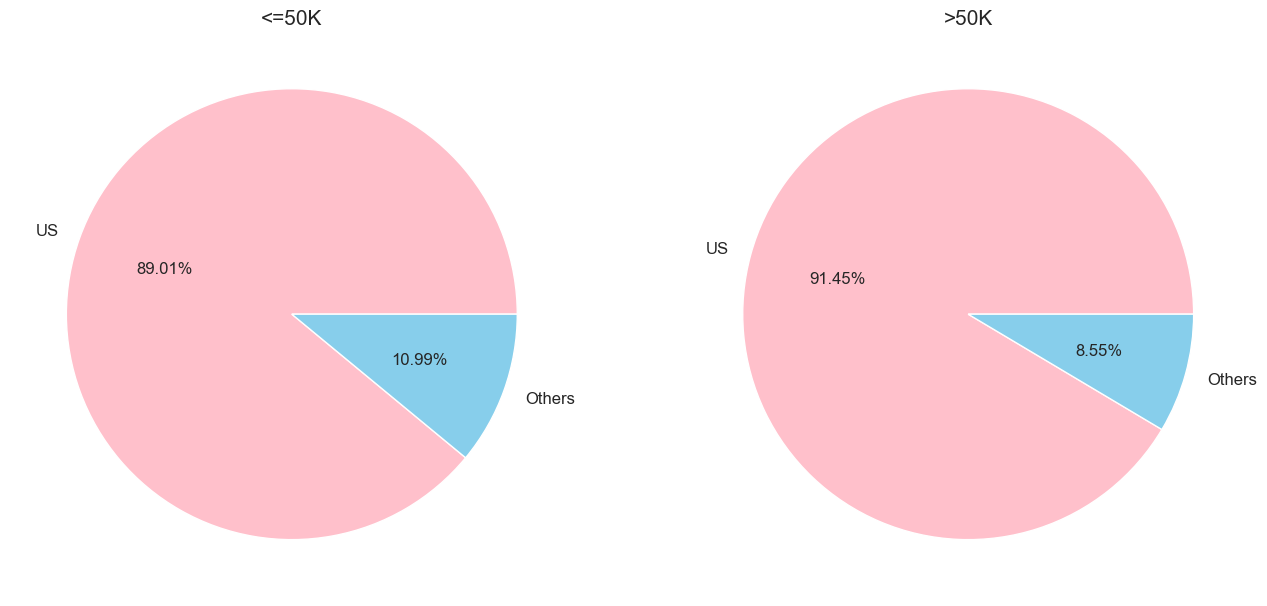

In [157]:
data = df.groupby("salary")["native_country_summary"].value_counts(normalize = True)
fig, ax = plt.subplots(1, 2, figsize = (16, 12))
for idx, value in enumerate(data.index.get_level_values(0).unique()):
    ax[idx].pie(labels = data[value].index, x = data[value].values, autopct = "%.2f%%", colors = ['pink', 'skyblue'], textprops={"fontsize":12})
    ax[idx].set_title(value, fontsize = 15)

**Result :** Everythings almost same. There is no significant difference breakdown by native country for salary.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis</p>

### 1. Average age of males and females by income level

In [158]:
df.groupby(["salary", "gender"])["age"].mean()

salary  gender
<=50K   Female   36.217
        Male     37.149
>50K    Female   42.126
        Male     44.627
Name: age, dtype: float64

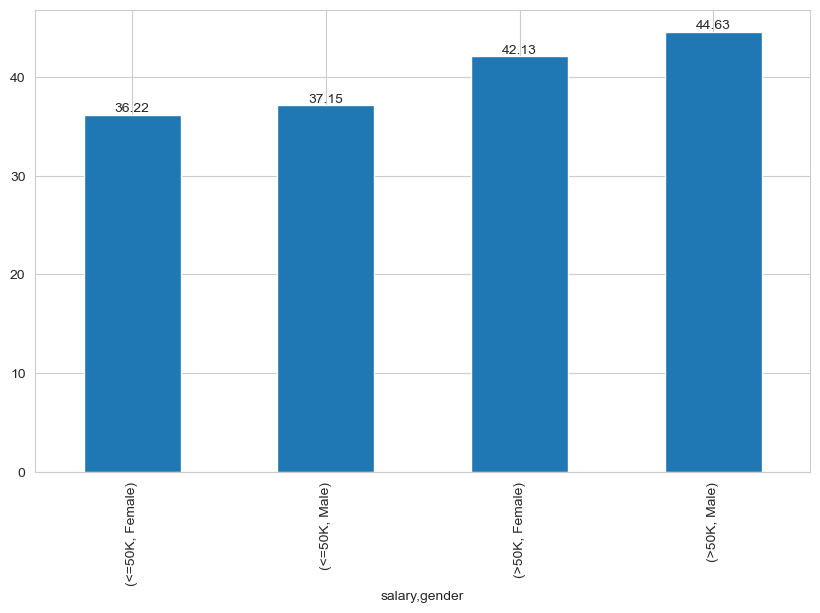

In [159]:
ax = df.groupby(["salary", "gender"])["age"].mean().plot.bar();
ax.bar_label(ax.containers[0], fmt = '%.2f');

In [160]:
df.groupby(["salary", "gender"])[["age"]].mean().reset_index().rename(columns = {0:"age"})

salary  gender    age
0  <=50K  Female 36.217
1  <=50K    Male 37.149
2   >50K  Female 42.126
3   >50K    Male 44.627

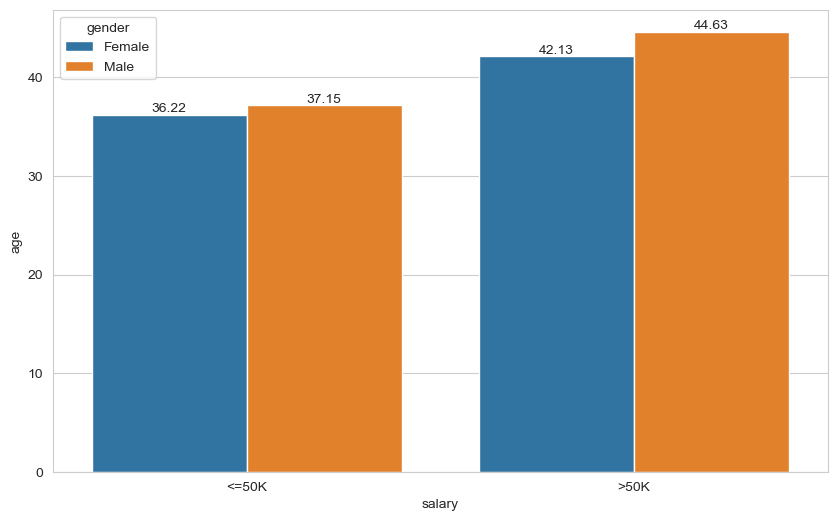

In [161]:
dat = df.groupby(["salary", "gender"])[["age"]].mean().reset_index().rename(columns = {0:"age"})
ax = sns.barplot(data = dat, x = "salary", y = "age", hue = "gender")
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f');
ax.bar_label(ax.containers[1], label_type='edge', fmt = '%.2f');

### 2. Workclass percentages of Americans in high-level income group

In [162]:
df[df["salary"] == ">50K"]["workclass"].value_counts(normalize = True)*100

Private            63.286
Self-emp-not-inc    9.236
Self-emp-inc        7.935
Local-gov           7.871
Federal-gov         4.733
State-gov           4.503
Unknown             2.437
Name: workclass, dtype: float64

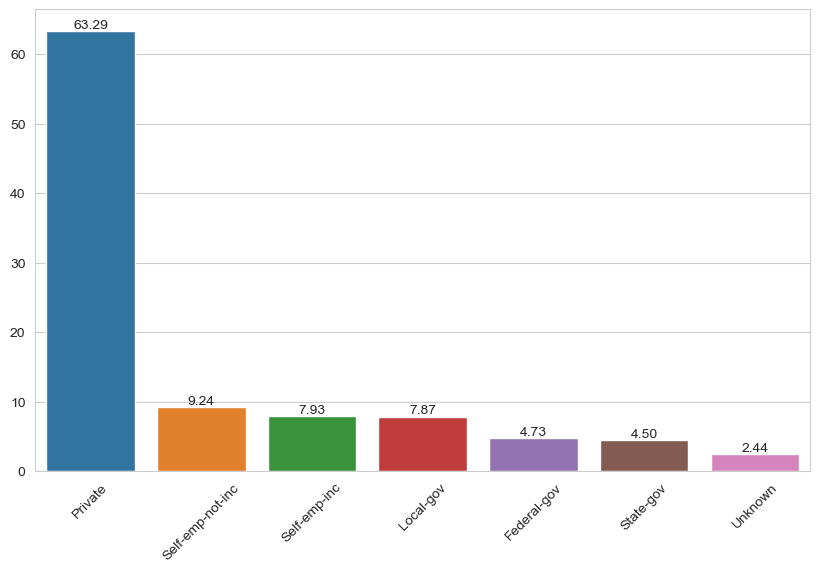

In [163]:
dat = df[df["salary"] == ">50K"]["workclass"].value_counts(normalize = True)*100
ax = sns.barplot(x = dat.index, y = dat.values);
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f')
plt.xticks(rotation = 45);

### 3. Occupation percentages of Americans who work as "Private" workclass in high-level income group

In [164]:
df[(df["salary"] == ">50K") & (df["workclass"] == "Private")]["occupation"].value_counts(normalize = True)*100

Exec-managerial     26.104
Prof-specialty      20.298
Craft-repair        14.533
Sales               13.788
Adm-clerical         6.470
Transport-moving     5.120
Machine-op-inspct    4.515
Tech-support         4.455
Other-service        2.016
Handlers-cleaners    1.471
Farming-fishing      0.605
Protective-serv      0.605
Priv-house-serv      0.020
Name: occupation, dtype: float64

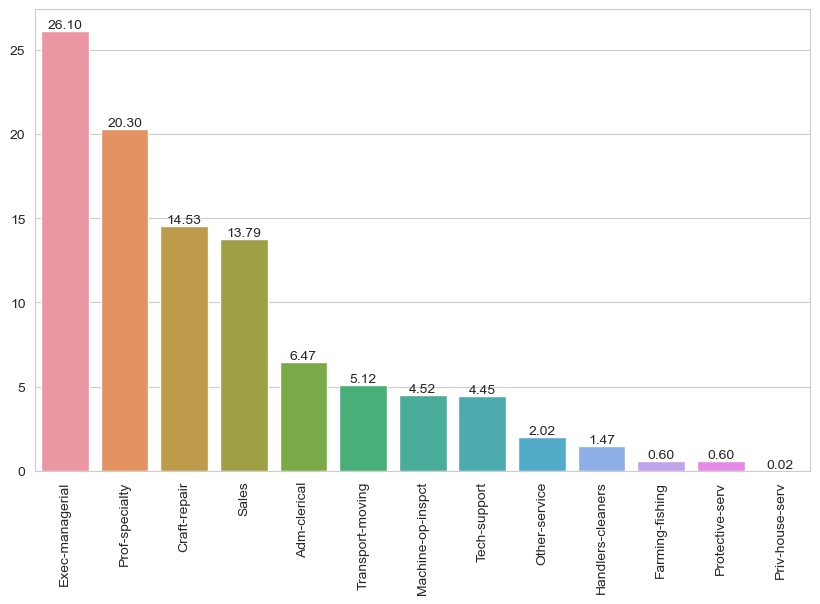

In [165]:
dat = df[(df["salary"] == ">50K") & (df["workclass"] == "Private")]["occupation"].value_counts(normalize = True)*100
ax = sns.barplot(x = dat.index, y = dat.values);
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f')
plt.xticks(rotation = 90);

### 4. Education level percentages of Asian-Pac-Islander race group in high-level income group

In [166]:
df[(df["salary"] == ">50K") & (df["race"] == "Asian-Pac-Islander")]["education"].value_counts(normalize = True)*100

Bachelors      35.145
Masters        15.580
HS-grad        12.319
Some-college   11.957
Prof-school     9.783
Doctorate       6.522
Assoc-voc       3.261
Assoc-acdm      2.899
5th-6th         1.087
9th             0.362
11th            0.362
10th            0.362
12th            0.362
Name: education, dtype: float64

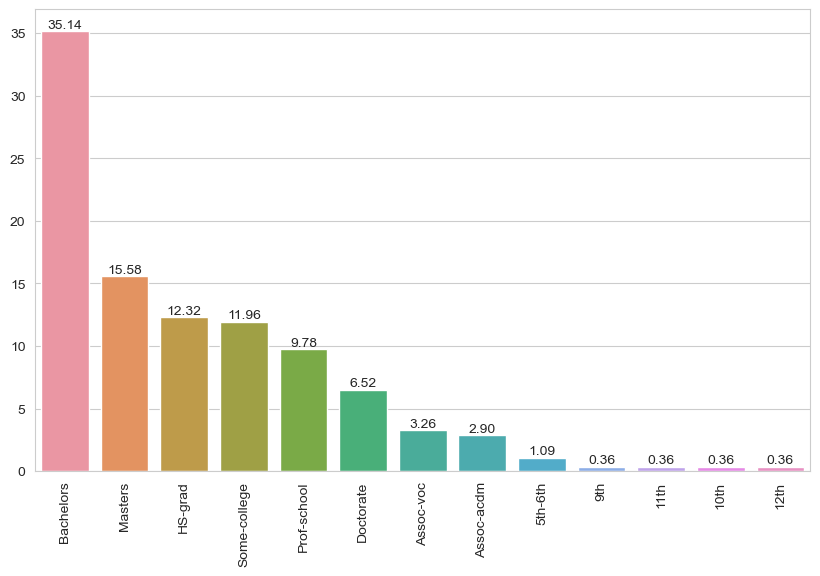

In [167]:
dat = df[(df["salary"] == ">50K") & (df["race"] == "Asian-Pac-Islander")]["education"].value_counts(normalize = True)*100
ax = sns.barplot(x = dat.index, y = dat.values);
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f')
plt.xticks(rotation = 90);

### 5. Ooccupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group

In [168]:
df[(df["salary"] == ">50K") & (df["education"] == "Bachelors") & (df["race"] == "Asian-Pac-Islander")]["occupation"].value_counts(normalize = True)*100

Exec-managerial     27.835
Prof-specialty      25.773
Adm-clerical        12.371
Sales                9.278
Other-service        9.278
Craft-repair         7.216
Tech-support         3.093
Protective-serv      2.062
Transport-moving     1.031
Machine-op-inspct    1.031
Farming-fishing      1.031
Name: occupation, dtype: float64

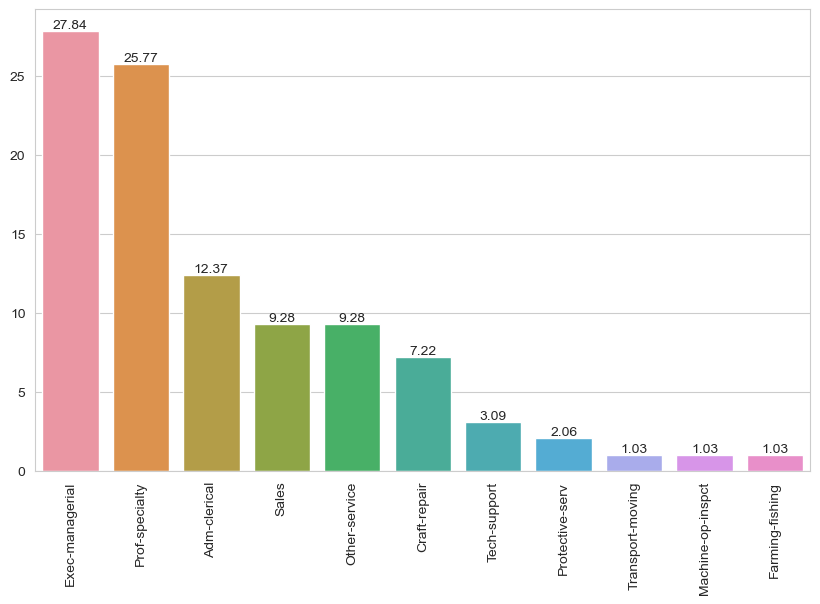

In [169]:
dat = df[(df["salary"] == ">50K") & (df["education"] == "Bachelors") & (df["race"] == "Asian-Pac-Islander")]["occupation"].value_counts(normalize = True)*100
ax = sns.barplot(x = dat.index, y = dat.values);
ax.bar_label(ax.containers[0], label_type='edge', fmt = '%.2f')
plt.xticks(rotation = 90);

### 6. Mean of working hours per week by gender for education level, workclass and marital status in one figure.

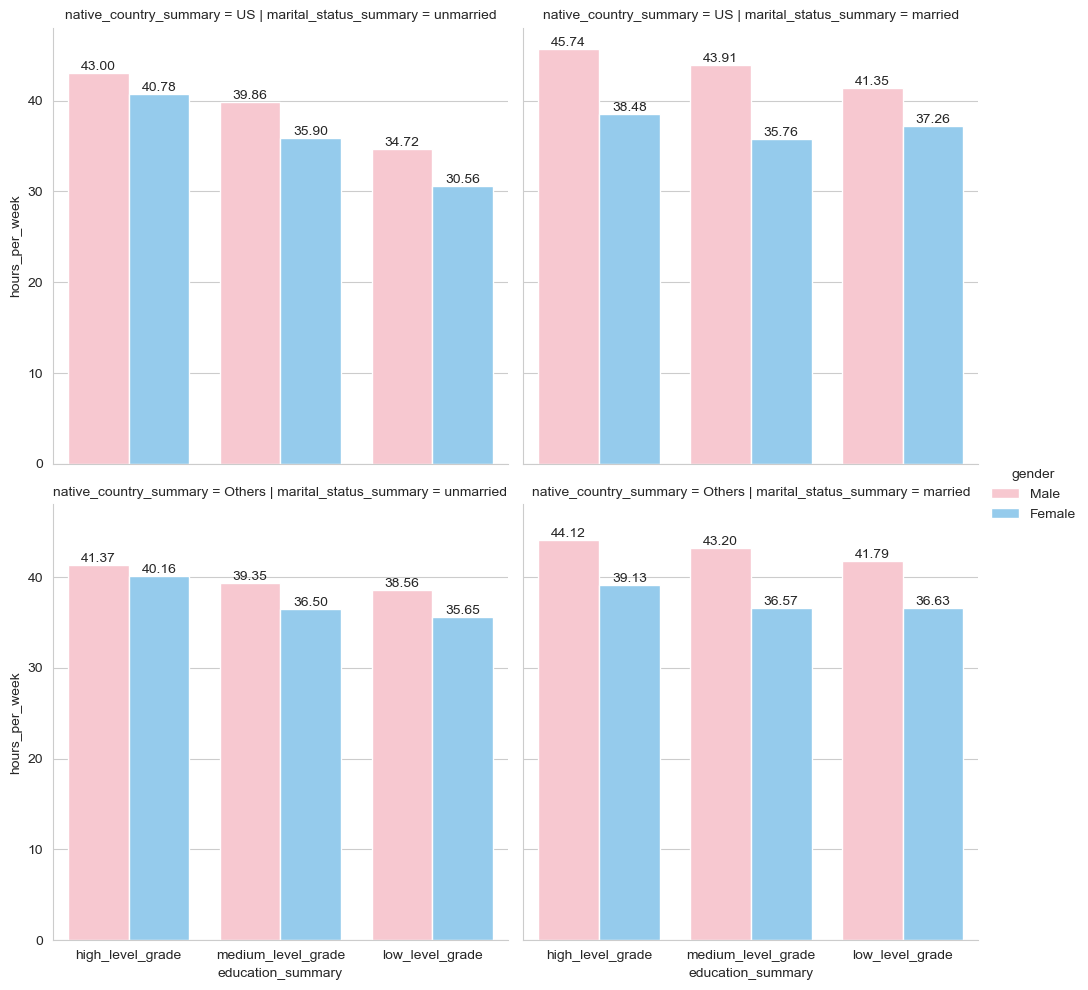

In [170]:
p = sns.catplot(y = "hours_per_week", 
                x = "education_summary", 
                data=df, kind="bar", 
                col="marital_status_summary", 
                row="native_country_summary", 
                hue = "gender", 
                palette=sns.color_palette(['pink', 'lightskyblue']), 
                ci = None);
for row in range(2):
    for column in range(2):
        for i in range(2):
            p.facet_axis(row, column).bar_label(p.facet_axis(row, column).containers[i], 
                                                label_type='edge', 
                                                fontsize = 10, 
                                                fmt = '%.2f');

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32537 non-null  int64  
 1   workclass               32537 non-null  object 
 2   fnlwgt                  32537 non-null  int64  
 3   education               32537 non-null  object 
 4   education_num           31735 non-null  float64
 5   marital_status          32537 non-null  object 
 6   occupation              32537 non-null  object 
 7   relationship            32537 non-null  object 
 8   race                    32537 non-null  object 
 9   gender                  32537 non-null  object 
 10  capital_gain            32537 non-null  int64  
 11  capital_loss            32537 non-null  int64  
 12  hours_per_week          32537 non-null  int64  
 13  native_country          32537 non-null  object 
 14  salary                  32537 non-null

**Dropping the columns of "education", "education_num", "relationship", "marital_status", "native_country" permanently**

In [172]:
df.drop(["education", "education_num", "relationship", "marital_status", "native_country"], axis = 1, inplace = True)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Missing Value</p>

**Checking the missing values for all features basically**

In [173]:
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

**It seems that there is no missing value. But we know that "workclass", and "occupation" features have missing values as the "Unknown" string values. Examining these features in more detail.**

In [174]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [175]:
df["occupation"].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [176]:
df[df["workclass"].isin(["Unknown", "Never-worked"])]["workclass"].value_counts()

Unknown         1836
Never-worked       7
Name: workclass, dtype: int64

**Replacing "Unknown" values with NaN using numpy library**

In [177]:
df.replace(to_replace={'workclass':{"Unknown": np.NaN}, 'occupation':{"Unknown": np.NaN}}, inplace = True)

In [178]:
df.isna().sum()

age                          0
workclass                 1836
fnlwgt                       0
occupation                1843
race                         0
gender                       0
capital_gain                 0
capital_loss                 0
hours_per_week               0
salary                       0
education_summary            0
marital_status_summary       0
native_country_summary       0
dtype: int64

**Dropping missing values in df permanently**

In [179]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [180]:
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
occupation                0
race                      0
gender                    0
capital_gain              0
capital_loss              0
hours_per_week            0
salary                    0
education_summary         0
marital_status_summary    0
native_country_summary    0
dtype: int64

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30694 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30694 non-null  int64 
 1   workclass               30694 non-null  object
 2   fnlwgt                  30694 non-null  int64 
 3   occupation              30694 non-null  object
 4   race                    30694 non-null  object
 5   gender                  30694 non-null  object
 6   capital_gain            30694 non-null  int64 
 7   capital_loss            30694 non-null  int64 
 8   hours_per_week          30694 non-null  int64 
 9   salary                  30694 non-null  object
 10  education_summary       30694 non-null  object
 11  marital_status_summary  30694 non-null  object
 12  native_country_summary  30694 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.3+ MB


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

### Boxplot and Histplot for all numeric features

**Plotting boxplots for each numeric features at the same figure as subplots**

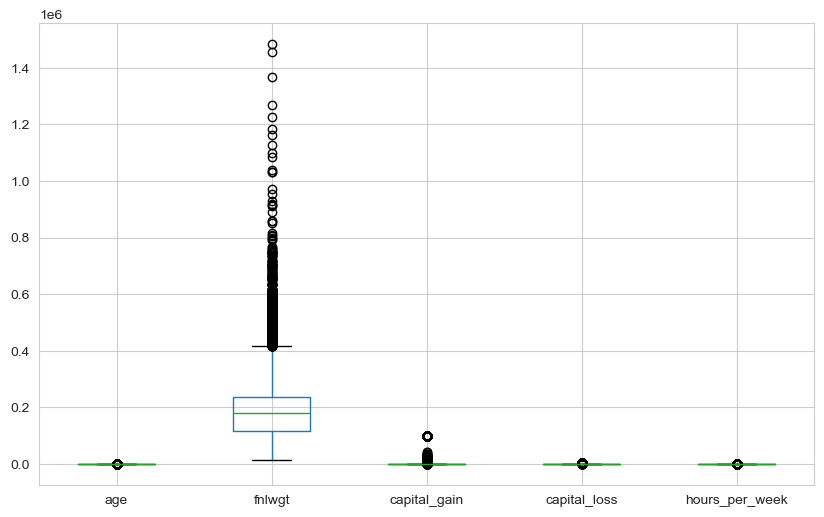

In [182]:
df.boxplot();

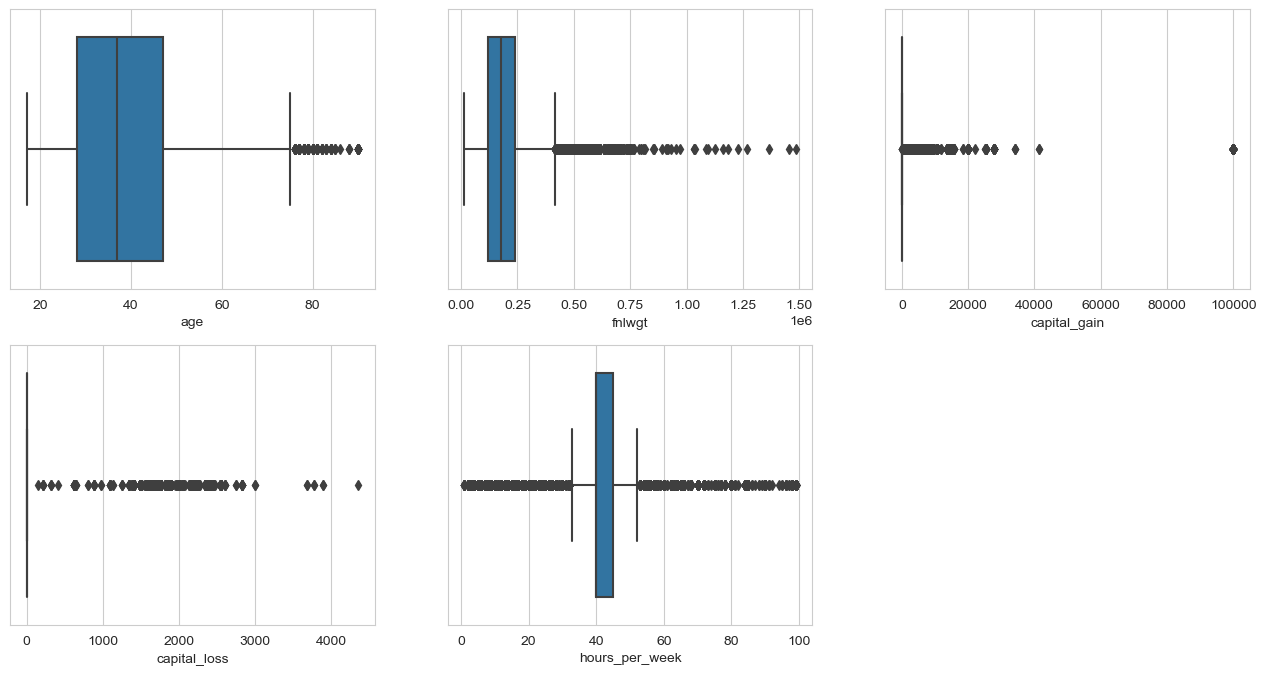

In [183]:
fig, axes = plt.subplots(2, 3, figsize = (16, 8))
sns.boxplot(data = df, x = "age", orient = 'v', ax = axes[0,0]);
sns.boxplot(data = df, x = "fnlwgt", orient = 'v', ax = axes[0,1]);
sns.boxplot(data = df, x = "capital_gain", orient = 'v', ax = axes[0,2]);
sns.boxplot(data = df, x = "capital_loss", orient = 'v', ax = axes[1,0]);
sns.boxplot(data = df, x = "hours_per_week", orient = 'v', ax = axes[1,1]);
axes[1,2].set_axis_off();

**Plotting both boxplots and histograms for each numeric features at the same figure as subplots**

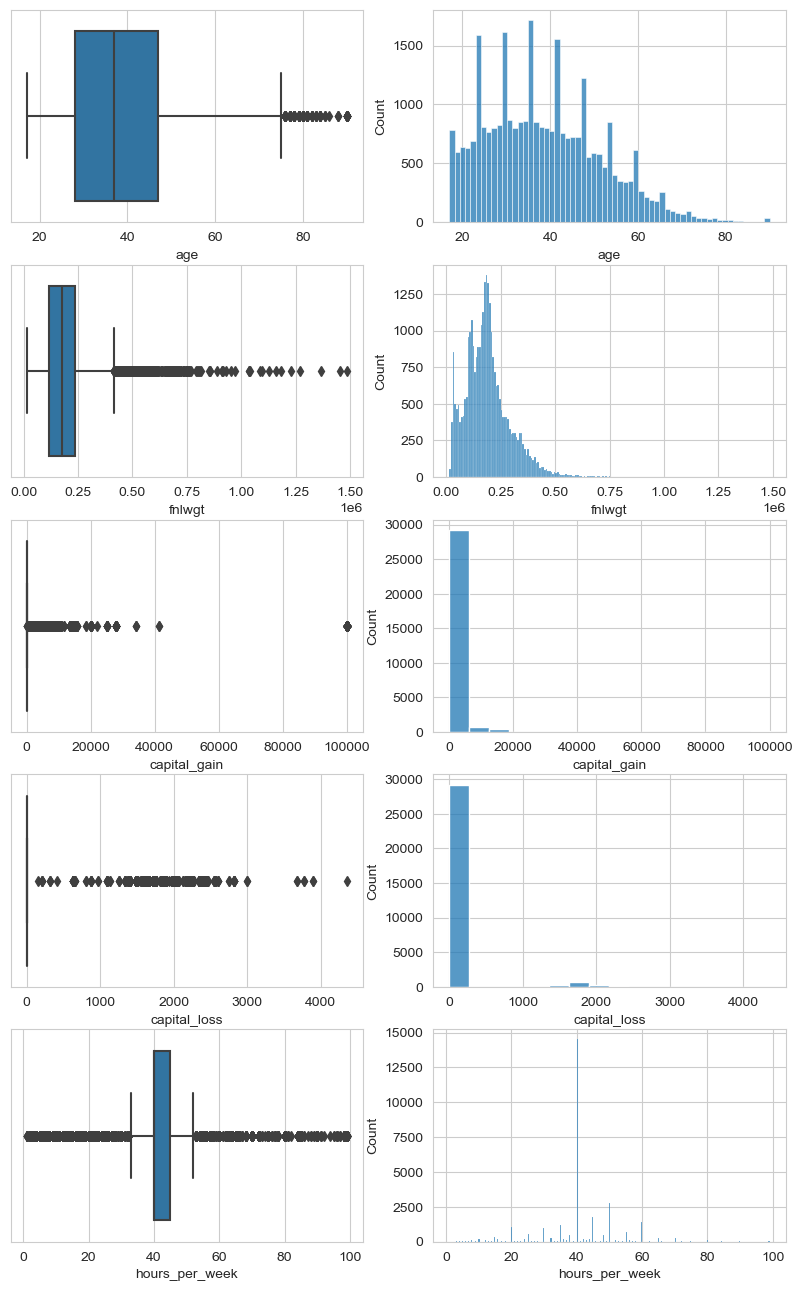

In [184]:
fig, axes = plt.subplots(5, 2, figsize = (10, 16))
sns.boxplot(data = df, x = "age", orient = 'v', ax = axes[0,0]);
sns.histplot(data = df, x = "age", ax = axes[0,1]);
sns.boxplot(data = df, x = "fnlwgt", orient = 'v', ax = axes[1,0]);
sns.histplot(data = df, x = "fnlwgt", ax = axes[1,1]);
sns.boxplot(data = df, x = "capital_gain", orient = 'v', ax = axes[2,0]);
sns.histplot(data = df, x = "capital_gain", ax = axes[2,1]);
sns.boxplot(data = df, x = "capital_loss", orient = 'v', ax = axes[3,0]);
sns.histplot(data = df, x = "capital_loss", ax = axes[3,1]);
sns.boxplot(data = df, x = "hours_per_week", orient = 'v', ax = axes[4,0]);
sns.histplot(data = df, x = "hours_per_week", ax = axes[4,1]);

**Checking the statistical values for all numeric features**

In [185]:
df.describe()

age      fnlwgt  capital_gain  capital_loss  hours_per_week
count 30694.000   30694.000     30694.000     30694.000       30694.000
mean     38.448  189848.229      1106.902        88.980          40.953
std      13.115  105465.126      7500.730       405.808          11.984
min      17.000   13769.000         0.000         0.000           1.000
25%      28.000  117828.500         0.000         0.000          40.000
50%      37.000  178513.500         0.000         0.000          40.000
75%      47.000  237293.750         0.000         0.000          45.000
max      90.000 1484705.000     99999.000      4356.000          99.000

**1. After analyzing all features, we have decided that we can't evaluate extreme values in "fnlwgt, capital_gain, capital_loss" features in the scope of outliers.**

**2. So let's examine "age and hours_per_week" features and detect extreme values which could be outliers by using IQR Rule.**

### age

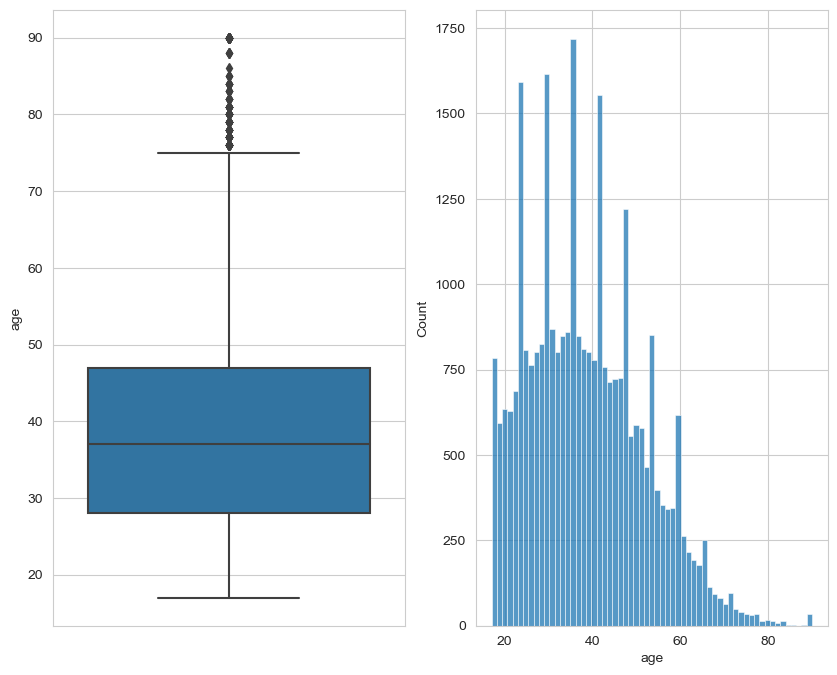

In [186]:
fig, axes = plt.subplots(1, 2, figsize = (10, 8))
sns.boxplot(data = df, y = "age", orient = 'v', ax = axes[0]);
sns.histplot(data = df, x = "age", ax = axes[1]);

**Finding IQR defining quantile 0.25 for low level and 0.75 for high level**

In [187]:
q1_age = df["age"].quantile(0.25)
q3_age = df["age"].quantile(0.75)
iqr_age = q3_age - q1_age
q1_age, q3_age, iqr_age

(28.0, 47.0, 19.0)

**Finding lower and upper limit using IQR**

In [188]:
ll_age = q1_age - 1.5 * iqr_age
ul_age = q3_age + 1.5 * iqr_age
ll_age, ul_age

(-0.5, 75.5)

In [189]:
df[~df["age"].between(ll_age, ul_age)]["age"].value_counts()

90    35
76    30
77    20
80    16
79    15
81    14
78    14
84     8
82     7
83     5
88     3
85     3
86     1
Name: age, dtype: int64

**Defining the observations whose age is greater than upper limit and sorting these observations by age in descending order**

In [190]:
df[~df["age"].between(ll_age, ul_age)].sort_values(by = "age", ascending = False)

age         workclass  fnlwgt       occupation                race  \
8806    90           Private   87372   Prof-specialty               White   
14159   90         Local-gov  187749     Adm-clerical  Asian-Pac-Islander   
28463   90       Federal-gov  195433     Craft-repair               White   
12975   90           Private  250832  Exec-managerial               White   
11996   90           Private   40388  Exec-managerial               White   
...    ...               ...     ...              ...                 ...   
15102   76         Local-gov  169133     Adm-clerical               White   
19085   76           Private  125784  Exec-managerial               White   
23515   76           Private  142535     Adm-clerical               White   
8240    76  Self-emp-not-inc  225964            Sales               White   
23354   76           Private  199949     Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
8806     Male         20051             0              72   >50K   
14159    Male             0             0              20  <=50K   
28463    Male             0             0              30  <=50K   
12975    Male             0             0              40  <=50K   
11996    Male             0             0              55  <=50K   
...       ...           ...           ...             ...    ...   
15102  Female             0             0              30  <=50K   
19085    Male             0             0              40  <=50K   
23515    Male             0             0               6  <=50K   
8240     Male             0             0               8  <=50K   
23354    Male         20051             0              50   >50K   

        education_summary marital_status_summary native_country_summary  
8806     high_level_grade                married                     US  
14159  medium_level_grade                married                 Others  
28463  medium_level_grade                married                     US  
12975     low_level_grade                married                     US  
11996    high_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
15102  medium_level_grade              unmarried                     US  
19085    high_level_grade                married                     US  
23515  medium_level_grade              unmarried                     US  
8240   medium_level_grade              unmarried                     US  
23354    high_level_grade                married                     US  

[171 rows x 13 columns]

### hours_per_week

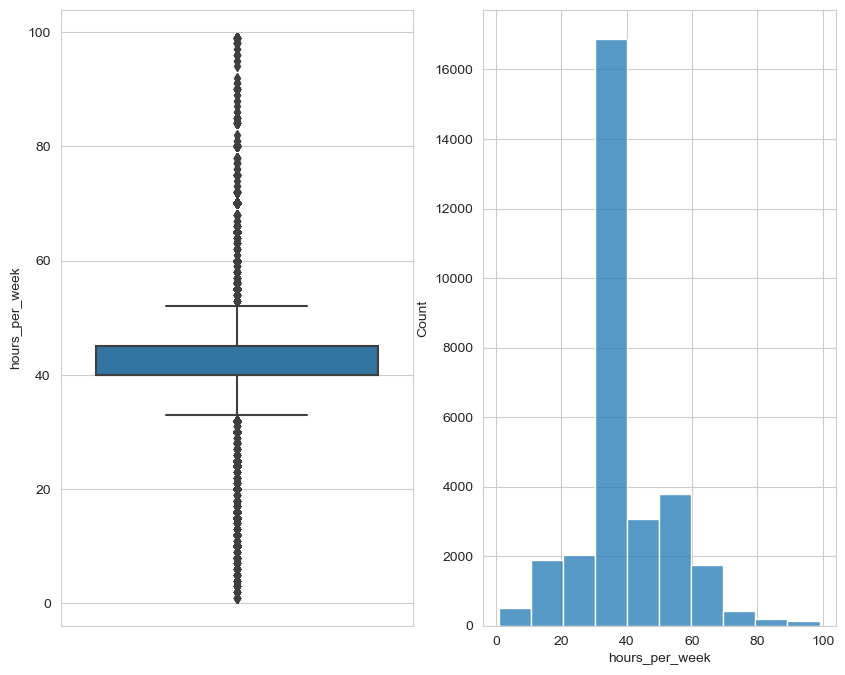

In [191]:
fig, axes = plt.subplots(1, 2, figsize = (10, 8))
sns.boxplot(data = df, y = "hours_per_week", orient = 'v', ax = axes[0]);
sns.histplot(data = df, x = "hours_per_week", bins = 10, ax = axes[1]);

**Finding IQR defining quantile 0.25 for low level and 0.75 for high level**

In [192]:
q1_hpw = df["hours_per_week"].quantile(0.25)
q3_hpw = df["hours_per_week"].quantile(0.75)
iqr_hpw = q3_hpw - q1_hpw
q1_hpw, q3_hpw, iqr_hpw

(40.0, 45.0, 5.0)

**Finding the lower and upper limit using IQR**

In [193]:
ll_hpw = q1_hpw - 1.5 * iqr_hpw
ul_hpw = q3_hpw + 1.5 * iqr_hpw
ll_hpw, ul_hpw

(32.5, 52.5)

In [194]:
df[df["hours_per_week"] > ul_hpw]["hours_per_week"].value_counts().sort_index(ascending = False)

99      80
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      28
89       2
88       2
87       1
86       2
85      13
84      41
82       1
81       3
80     124
78       8
77       6
76       3
75      63
74       1
73       2
72      68
70     284
68      12
67       4
66      17
65     242
64      14
63      10
62      18
61       2
60    1441
59       5
58      27
57      17
56      91
55     683
54      39
53      23
Name: hours_per_week, dtype: int64

**Defining the observations where  hours per week are greater than upper limit and sorting these observations by hours per week in descending order**

In [195]:
df[df["hours_per_week"] > ul_hpw].sort_values(by = "hours_per_week", ascending = False)

age         workclass  fnlwgt        occupation   race  gender  \
25986   44         Local-gov  212665   Protective-serv  Black    Male   
19529   38           Private   66326  Transport-moving  White    Male   
8796    39           Private   70995  Transport-moving  White    Male   
15534   29           Private  167716     Other-service  White  Female   
22313   26  Self-emp-not-inc  258306   Farming-fishing  White    Male   
...    ...               ...     ...               ...    ...     ...   
1138    27           Private  138705      Craft-repair  White    Male   
23244   58           Private  248739   Farming-fishing  White    Male   
28858   62           Private  123411  Transport-moving  White    Male   
18417   24           Private  117167     Other-service  White  Female   
31622   61  Self-emp-not-inc  268831             Sales  White    Male   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
25986             0             0              99  <=50K  medium_level_grade   
19529             0             0              99  <=50K  medium_level_grade   
8796          15024             0              99   >50K    high_level_grade   
15534             0             0              99  <=50K  medium_level_grade   
22313             0             0              99  <=50K     low_level_grade   
...             ...           ...             ...    ...                 ...   
1138              0             0              53  <=50K  medium_level_grade   
23244             0             0              53   >50K  medium_level_grade   
28858             0             0              53  <=50K     low_level_grade   
18417             0             0              53  <=50K  medium_level_grade   
31622             0             0              53  <=50K  medium_level_grade   

      marital_status_summary native_country_summary  
25986                married                     US  
19529                married                     US  
8796                 married                     US  
15534              unmarried                     US  
22313                married                     US  
...                      ...                    ...  
1138                 married                     US  
23244                married                     US  
28858                married                     US  
18417              unmarried                     US  
31622                married                     US  

[3402 rows x 13 columns]

In [196]:
df[df["hours_per_week"] < ll_hpw]["hours_per_week"].value_counts().sort_index()

1        8
2       15
3       24
4       28
5       39
6       40
7       20
8      103
9       17
10     223
11       9
12     143
13      19
14      28
15     350
16     182
17      27
18      64
19      14
20    1066
21      23
22      39
23      20
24     220
25     582
26      30
27      28
28      74
29       6
30    1009
31       5
32     239
Name: hours_per_week, dtype: int64

In [197]:
df[df["hours_per_week"] < ll_hpw].groupby("salary")["hours_per_week"].describe()

count   mean   std   min    25%    50%    75%    max
salary                                                        
<=50K  4372.000 21.548 7.343 1.000 16.000 20.000 30.000 32.000
>50K    322.000 22.028 7.813 1.000 18.000 24.000 30.000 32.000

In [198]:
df[df["hours_per_week"] < ll_hpw].groupby("salary")["age"].describe()

count   mean    std    min    25%    50%    75%    max
salary                                                          
<=50K  4372.000 34.052 17.730 17.000 20.000 26.000 45.000 90.000
>50K    322.000 49.484 13.894 22.000 39.000 48.000 60.000 90.000

**Result :** As we see, there are number of extreme values in both "age and hours_per_week" features. But how can we know if these extreme values are outliers or not? At this point, **domain knowledge** comes to the fore.

**Domain Knowledge may work for this dataset:**
1. In this dataset, all values are created according to the statements of individuals. So It can be some "data entries errors".
2. In addition, we have aimed to create an ML model with some restrictions as getting better performance from the ML model.
3. In this respect, our sample space ranges for some features are as follows.
    - **age : 17 to 80**
    - **hours_per_week : 7 to 70**
    - **if somebody's age is more than 60, he/she can't work more than 60 hours in a week**

### Dropping rows according to the domain knownledge 

**Creating a condition according to domain knowledge on age stated above and sorting the observations meeting this condition by age in ascending order**

In [199]:
df[df["age"] > 80].sort_values(by = "age", ascending = False)

age     workclass  fnlwgt       occupation   race  gender  \
222     90       Private   51744    Other-service  Black    Male   
18832   90       Private  115306  Exec-managerial  White  Female   
10545   90       Private  175491     Craft-repair  White    Male   
11512   90       Private   87285    Other-service  White  Female   
11996   90       Private   40388  Exec-managerial  White    Male   
...    ...           ...     ...              ...    ...     ...   
19045   81     State-gov  132204    Other-service  White  Female   
6748    81       Private  122651            Sales  White    Male   
2906    81       Private  114670  Priv-house-serv  Black  Female   
21501   81       Private  177408  Exec-managerial  White    Male   
19495   81  Self-emp-inc  247232  Exec-managerial  White  Female   

       capital_gain  capital_loss  hours_per_week salary   education_summary  \
222               0          2206              40  <=50K  medium_level_grade   
18832             0             0              40  <=50K    high_level_grade   
10545          9386             0              50   >50K  medium_level_grade   
11512             0             0              24  <=50K  medium_level_grade   
11996             0             0              55  <=50K    high_level_grade   
...             ...           ...             ...    ...                 ...   
19045             0             0              20  <=50K     low_level_grade   
6748              0             0              15  <=50K  medium_level_grade   
2906           2062             0               5  <=50K     low_level_grade   
21501             0          2377              26   >50K  medium_level_grade   
19495          2936             0              28  <=50K     low_level_grade   

      marital_status_summary native_country_summary  
222                unmarried                     US  
18832              unmarried                     US  
10545                married                 Others  
11512              unmarried                     US  
11996              unmarried                     US  
...                      ...                    ...  
19045              unmarried                     US  
6748                 married                     US  
2906               unmarried                     US  
21501                married                     US  
19495                married                     US  

[76 rows x 13 columns]

In [200]:
df[df["age"] > 80].sort_values(by = "age", ascending = False).shape

(76, 13)

**Assigning the indices of the rows defined in accordance with condition above for age**

In [201]:
errors_age_index = df[df["age"] > 80].sort_values(by = "age", ascending = False).index
errors_age_index

Int64Index([  222, 18832, 10545, 11512, 11996, 12975, 14159, 15892, 18277,
            18413, 18725, 19212,  8973, 19489, 19747, 20610, 22220, 24043,
            28463, 31030, 32277, 32367, 10210, 15356,  5370,  4070,  1040,
             6232,  1935,  2303,  5272,  6624,  2891,  5406,  8806,  1168,
            22895, 21835, 24027, 20463,  8381, 32459, 26731, 27795,  9471,
             6214, 14711, 11238,  7720, 15662,  7481, 24395, 23459, 19172,
            16302, 14756,  8431, 20421, 22481, 31855, 13696, 24280,  4834,
            29594, 28948, 12830,   918, 13295, 24560,  3537, 13928, 19045,
             6748,  2906, 21501, 19495],
           dtype='int64')

**Dropping these indices defined above for age**

In [202]:
df.drop(axis = 0, index = errors_age_index, inplace = True)

**Creating a condition according to domain knowledge on hours per week stated above and sorting the observations meeting this condition by hours per week in descending order**

In [203]:
df[~df["hours_per_week"].between(7,70)].sort_values(by = "hours_per_week", ascending = False)

age         workclass  fnlwgt        occupation                race  \
22216   45           Private   54260      Craft-repair               White   
5432    44           Private   83508    Prof-specialty               White   
19053   27           Private   40295  Transport-moving               White   
19141   59           Private  106748     Other-service               White   
19399   39      Self-emp-inc  163057      Craft-repair               White   
...    ...               ...     ...               ...                 ...   
20909   77  Self-emp-not-inc   71676      Adm-clerical               White   
25078   74           Private  260669     Other-service               White   
19750   23           Private   72887      Craft-repair  Asian-Pac-Islander   
189     58         State-gov  109567    Prof-specialty               White   
24284   57  Self-emp-not-inc   56480   Exec-managerial               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
22216    Male             0             0              99  <=50K   
5432   Female          2354             0              99  <=50K   
19053    Male             0             0              99  <=50K   
19141  Female             0             0              99  <=50K   
19399    Male             0             0              99  <=50K   
...       ...           ...           ...             ...    ...   
20909  Female             0          1944               1  <=50K   
25078  Female             0             0               1  <=50K   
19750    Male             0             0               1  <=50K   
189      Male             0             0               1   >50K   
24284    Male             0             0               1  <=50K   

        education_summary marital_status_summary native_country_summary  
22216  medium_level_grade              unmarried                     US  
5432     high_level_grade              unmarried                     US  
19053  medium_level_grade              unmarried                     US  
19141     low_level_grade                married                     US  
19399  medium_level_grade              unmarried                     US  
...                   ...                    ...                    ...  
20909  medium_level_grade              unmarried                     US  
25078     low_level_grade              unmarried                     US  
19750  medium_level_grade              unmarried                 Others  
189      high_level_grade                married                     US  
24284  medium_level_grade                married                     US  

[621 rows x 13 columns]

**Finding the shape of the dataframe created by the condition defined above for hours per week**

In [204]:
df[~df["hours_per_week"].between(7,70)].sort_values(by = "hours_per_week", ascending = False).shape

(621, 13)

**Assigning the indices of the rows defined in accordance with condition above for hours per week**

In [205]:
errors_hpw_index = df[~df["hours_per_week"].between(7,70)].sort_values(by = "hours_per_week", ascending = False).index
errors_hpw_index

Int64Index([22216,  5432, 19053, 19141, 19399, 19529, 19731, 19997, 20036,
            21056,
            ...
             6180, 29867,  1036, 11451, 22960, 20909, 25078, 19750,   189,
            24284],
           dtype='int64', length=621)

**Dropping these indices defined above for hours per week**

In [206]:
df.drop(axis = 0, index = errors_hpw_index, inplace = True)

**Creating a condition according to domain knowledge on both age and hours per week stated above**

In [207]:
df[(df["age"] > 60) & (df["hours_per_week"] > 60)]

age         workclass  fnlwgt        occupation                race  \
1541    62           Private  162245    Prof-specialty               White   
2154    75           Private  101887   Priv-house-serv               White   
2184    63      Self-emp-inc   54052             Sales               White   
2665    70           Private   94692             Sales               White   
3101    65      Self-emp-inc   81413   Farming-fishing               White   
5417    67           Private  197816             Sales               White   
6826    68           Private  284763  Transport-moving               White   
8066    61  Self-emp-not-inc  133969             Sales  Asian-Pac-Islander   
9646    62  Self-emp-not-inc   26911     Other-service               White   
12624   63      Self-emp-inc  110890    Prof-specialty               White   
16634   62  Self-emp-not-inc  115176   Farming-fishing               White   
18367   70  Self-emp-not-inc  139889   Farming-fishing               White   
19584   64  Self-emp-not-inc  192695   Farming-fishing               White   
20125   62           Private  252668    Prof-specialty               White   
23399   63  Self-emp-not-inc   28612             Sales               White   
23585   64           Private  212838             Sales               White   
24903   61           Private  191417   Exec-managerial               Black   
25910   66      Self-emp-inc  179951   Exec-managerial               White   
26625   67  Self-emp-not-inc  152102   Farming-fishing               White   
27721   61         Local-gov   28375    Prof-specialty               White   
28294   65      Self-emp-inc  210381   Exec-managerial               White   
31342   62  Self-emp-not-inc  173631   Exec-managerial               White   
32192   64         State-gov  104361      Adm-clerical               White   

       gender  capital_gain  capital_loss  hours_per_week salary  \
1541     Male             0          1628              70  <=50K   
2154   Female             0             0              70  <=50K   
2184     Male             0             0              68   >50K   
2665     Male             0             0              70   >50K   
3101     Male             0          2352              65  <=50K   
5417     Male             0          1844              70  <=50K   
6826     Male             0             0              70  <=50K   
8066     Male             0             0              63  <=50K   
9646   Female             0             0              66  <=50K   
12624    Male             0             0              70   >50K   
16634    Male             0             0              65  <=50K   
18367    Male          2653             0              70  <=50K   
19584    Male             0             0              70  <=50K   
20125    Male             0             0              70  <=50K   
23399    Male             0             0              70  <=50K   
23585    Male             0             0              65   >50K   
24903    Male             0             0              65  <=50K   
25910    Male             0             0              70  <=50K   
26625    Male             0             0              65  <=50K   
27721  Female             0             0              70  <=50K   
28294    Male         99999             0              65   >50K   
31342    Male             0             0              70  <=50K   
32192  Female             0             0              65  <=50K   

        education_summary marital_status_summary native_country_summary  
1541     high_level_grade                married                     US  
2154      low_level_grade              unmarried                     US  
2184     high_level_grade                married                     US  
2665     high_level_grade                married                     US  
3101   medium_level_grade                married                     US  
5417   medium_level_grade                married         

**Finding the shape of the dataframe created by the condition defined above for both age and hours per week**

In [208]:
df[(df["age"] > 60) & (df["hours_per_week"] > 60)].shape

(23, 13)

**Assigning the indices of the rows defined in accordance with condition above for both age and hours per week**

In [209]:
errors_age_hpw_index = df[(df["age"] > 60) & (df["hours_per_week"] > 60)].index
errors_age_hpw_index

Int64Index([ 1541,  2154,  2184,  2665,  3101,  5417,  6826,  8066,  9646,
            12624, 16634, 18367, 19584, 20125, 23399, 23585, 24903, 25910,
            26625, 27721, 28294, 31342, 32192],
           dtype='int64')

**Dropping these indices defined above for both age and hours per week**

In [210]:
df.drop(axis = 0, index = errors_age_hpw_index, inplace = True)

**new shape of dataframe now**

In [211]:
df.shape

(29974, 13)

**Resetting the indices and taking the head of DataFrame now**

In [212]:
df.reset_index(drop = True, inplace = True)
df.head()

age         workclass  fnlwgt         occupation   race  gender  \
0   39         State-gov   77516       Adm-clerical  White    Male   
1   50  Self-emp-not-inc   83311    Exec-managerial  White    Male   
2   38           Private  215646  Handlers-cleaners  White    Male   
3   53           Private  234721  Handlers-cleaners  Black    Male   
4   28           Private  338409     Prof-specialty  Black  Female   

   capital_gain  capital_loss  hours_per_week salary   education_summary  \
0          2174             0              40  <=50K    high_level_grade   
1             0             0              13  <=50K    high_level_grade   
2             0             0              40  <=50K  medium_level_grade   
3             0             0              40  <=50K     low_level_grade   
4             0             0              40  <=50K    high_level_grade   

  marital_status_summary native_country_summary  
0              unmarried                     US  
1                married                     US  
2              unmarried                     US  
3                married                     US  
4                married                 Others

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

### 1. Converting all features to numeric

**Converting target feature (salary) to numeric (0 and 1) by using map function**

In [213]:
df["salary"].replace({"<=50K":0, ">50K":1}, inplace = True)
df["salary"]

0        0
1        0
2        0
3        0
4        0
        ..
29969    0
29970    1
29971    0
29972    0
29973    1
Name: salary, Length: 29974, dtype: int64

In [214]:
df["salary"].value_counts()

0    22524
1     7450
Name: salary, dtype: int64

**Converting all features to numeric by using get_dummies function**

In [215]:
pd.get_dummies(df, drop_first = True)

age  fnlwgt  capital_gain  capital_loss  hours_per_week  salary  \
0       39   77516          2174             0              40       0   
1       50   83311             0             0              13       0   
2       38  215646             0             0              40       0   
3       53  234721             0             0              40       0   
4       28  338409             0             0              40       0   
...    ...     ...           ...           ...             ...     ...   
29969   27  257302             0             0              38       0   
29970   40  154374             0             0              40       1   
29971   58  151910             0             0              40       0   
29972   22  201490             0             0              20       0   
29973   52  287927         15024             0              40       1   

       workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0                        0                  0                       0   
1                        0                  0                       0   
2                        0                  1                       0   
3                        0                  1                       0   
4                        0                  1                       0   
...                    ...                ...                     ...   
29969                    0                  1                       0   
29970                    0                  1                       0   
29971                    0                  1                       0   
29972                    0                  1                       0   
29973                    0                  0                       1   

       workclass_Self-emp-not-inc  workclass_State-gov  workclass_Without-pay  \
0                               0                    1                      0   
1                               1                    0                      0   
2                               0                    0                      0   
3                               0                    0                      0   
4                               0                    0                      0   
...                           ...                  ...                    ...   
29969                           0                    0                      0   
29970                           0                    0                      0   
29971                           0                    0                      0   
29972                           0                    0                      0   
29973                           0                    0                      0   

       occupation_Armed-Forces  occupation_Craft-repair  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
29969                        0                        0   
29970                        0                        0   
29971                        0                        0   
29972                        0                        0   
29973                        0                        0   

       occupation_Exec-managerial  occupation_Farming-fishing  \
0                               0                           0   
1                               1                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
29969                           0                           0   
29970                           0      

**new shape of dataframe**

In [216]:
df.shape

(29974, 13)

**the shape of dataframe created by dummy operation**

In [217]:
df = pd.get_dummies(df, drop_first = True)
df.shape

(29974, 34)

### 2. Taking a look at correlation between features by utilizing power of visualizing

In [218]:
df.corr()

age  fnlwgt  capital_gain  \
age                                   1.000  -0.074         0.082   
fnlwgt                               -0.074   1.000        -0.002   
capital_gain                          0.082  -0.002         1.000   
capital_loss                          0.059  -0.011        -0.032   
hours_per_week                        0.119  -0.019         0.086   
salary                                0.253  -0.010         0.222   
workclass_Local-gov                   0.070  -0.004        -0.010   
workclass_Private                    -0.211   0.045        -0.045   
workclass_Self-emp-inc                0.111  -0.025         0.093   
workclass_Self-emp-not-inc            0.146  -0.037         0.033   
workclass_State-gov                   0.020  -0.012        -0.013   
workclass_Without-pay                 0.016  -0.003        -0.002   
occupation_Armed-Forces              -0.011   0.004        -0.003   
occupation_Craft-repair               0.022   0.009        -0.023   
occupation_Exec-managerial            0.111  -0.020         0.061   
occupation_Farming-fishing            0.035  -0.031        -0.012   
occupation_Handlers-cleaners         -0.104   0.030        -0.024   
occupation_Machine-op-inspct         -0.012   0.013        -0.027   
occupation_Other-service             -0.094  -0.003        -0.042   
occupation_Priv-house-serv            0.011   0.008        -0.007   
occupation_Prof-specialty             0.065  -0.019         0.086   
occupation_Protective-serv            0.006   0.016        -0.008   
occupation_Sales                     -0.033   0.003         0.008   
occupation_Tech-support              -0.017   0.004        -0.010   
occupation_Transport-moving           0.034   0.002        -0.019   
race_Asian-Pac-Islander              -0.010  -0.049         0.010   
race_Black                           -0.015   0.118        -0.020   
race_Other                           -0.032   0.006        -0.001   
race_White                            0.028  -0.059         0.014   
gender_Male                           0.083   0.028         0.047   
education_summary_low_level_grade    -0.010   0.042        -0.041   
education_summary_medium_level_grade -0.079  -0.010        -0.084   
marital_status_summary_unmarried     -0.318   0.026        -0.084   
native_country_summary_US             0.013  -0.077         0.006   

                                      capital_loss  hours_per_week  salary  \
age                                          0.059           0.119   0.253   
fnlwgt                                      -0.011          -0.019  -0.010   
capital_gain                                -0.032           0.086   0.222   
capital_loss                                 1.000           0.060   0.152   
hours_per_week                               0.060           1.000   0.247   
salary                                       0.152           0.247   1.000   
workclass_Local-gov                          0.015           0.004   0.029   
workclass_Private                           -0.039          -0.081  -0.121   
workclass_Self-emp-inc                       0.031           0.124   0.138   
workclass_Self-emp-not-inc                   0.023           0.066   0.030   
workclass_State-gov                         -0.002          -0.038   0.011   
workclass_Without-pay                       -0.005          -0.016  -0.012   
occupation_Armed-Forces                      0.005           0.000  -0.006   
occupation_Craft-repair                      0.000           0.059  -0.021   
occupation_Exec-managerial                   0.048           0.153   0.215   
occupation_Farming-fishing                  -0.013           0.051  -0.054   
occupation_Handlers-cleaners                -0.023          -0.057  -0.094   
occupation_Machine-op-inspct                -0.018           0.004  -0.077   
occupation_Other-service                    -0.043          -0.205  -0.166   
occupation_Priv-house-serv                  -0.011          -0.0

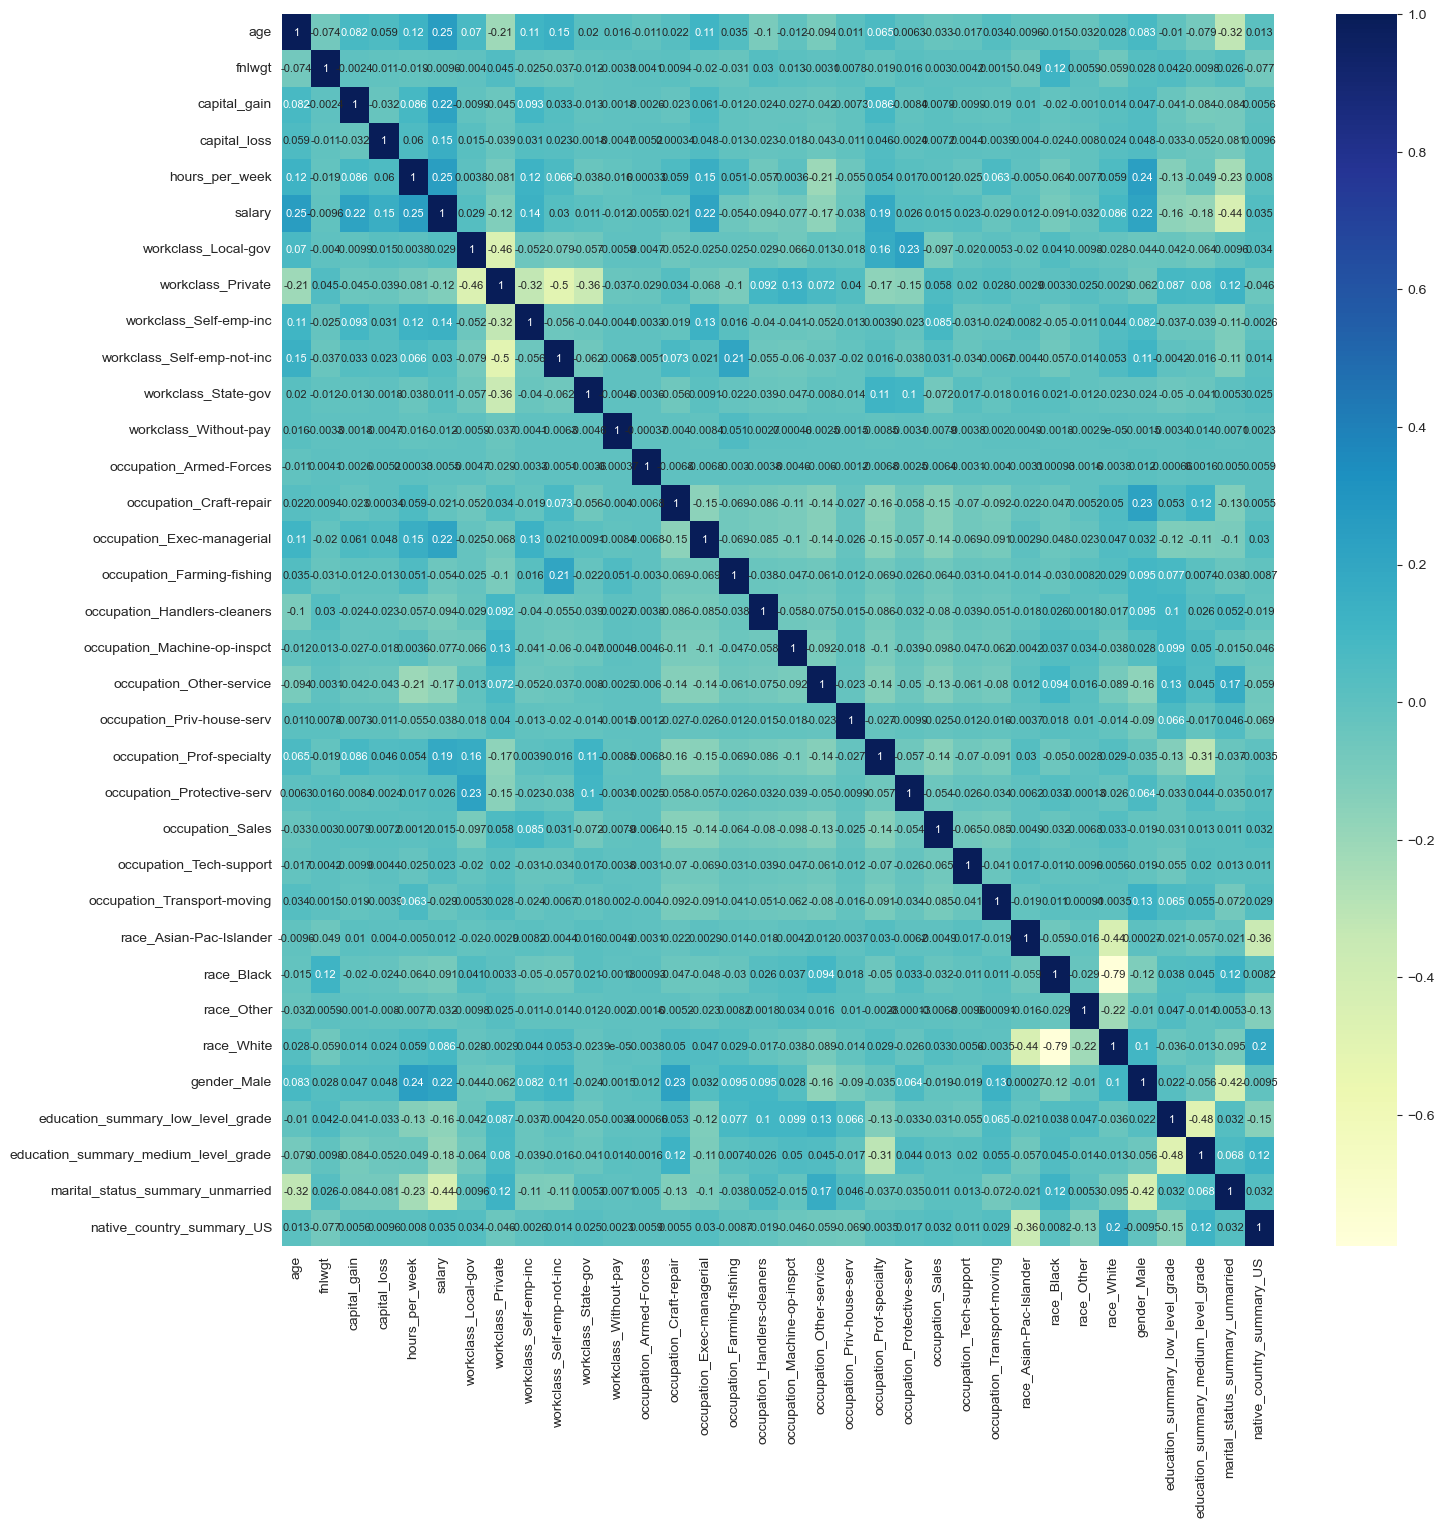

In [219]:
fig, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={'fontsize': 8});

In [221]:
df.corr()[["salary"]].sort_values(by = "salary", ascending = False)[1:]

salary
age                                    0.253
hours_per_week                         0.247
capital_gain                           0.222
gender_Male                            0.216
occupation_Exec-managerial             0.215
occupation_Prof-specialty              0.185
capital_loss                           0.152
workclass_Self-emp-inc                 0.138
race_White                             0.086
native_country_summary_US              0.035
workclass_Self-emp-not-inc             0.030
workclass_Local-gov                    0.029
occupation_Protective-serv             0.026
occupation_Tech-support                0.023
occupation_Sales                       0.015
race_Asian-Pac-Islander                0.012
workclass_State-gov                    0.011
occupation_Armed-Forces               -0.006
fnlwgt                                -0.010
workclass_Without-pay                 -0.012
occupation_Craft-repair               -0.021
occupation_Transport-moving           -0.029
race_Other                            -0.032
occupation_Priv-house-serv            -0.038
occupation_Farming-fishing            -0.054
occupation_Machine-op-inspct          -0.077
race_Black                            -0.091
occupation_Handlers-cleaners          -0.094
workclass_Private                     -0.121
education_summary_low_level_grade     -0.162
occupation_Other-service              -0.166
education_summary_medium_level_grade  -0.183
marital_status_summary_unmarried      -0.438

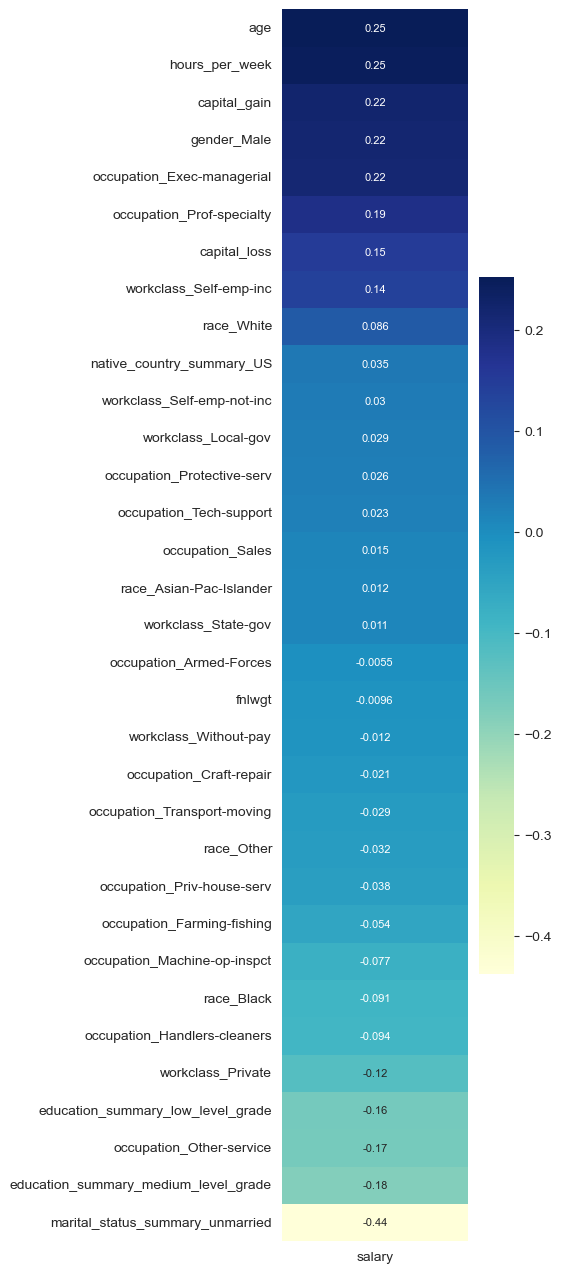

In [222]:
fig, ax = plt.subplots(figsize = (3, 16))
sns.heatmap(df.corr()[["salary"]].sort_values(by = "salary", ascending = False)[1:], cmap="YlGnBu", annot=True, annot_kws={'fontsize': 8});

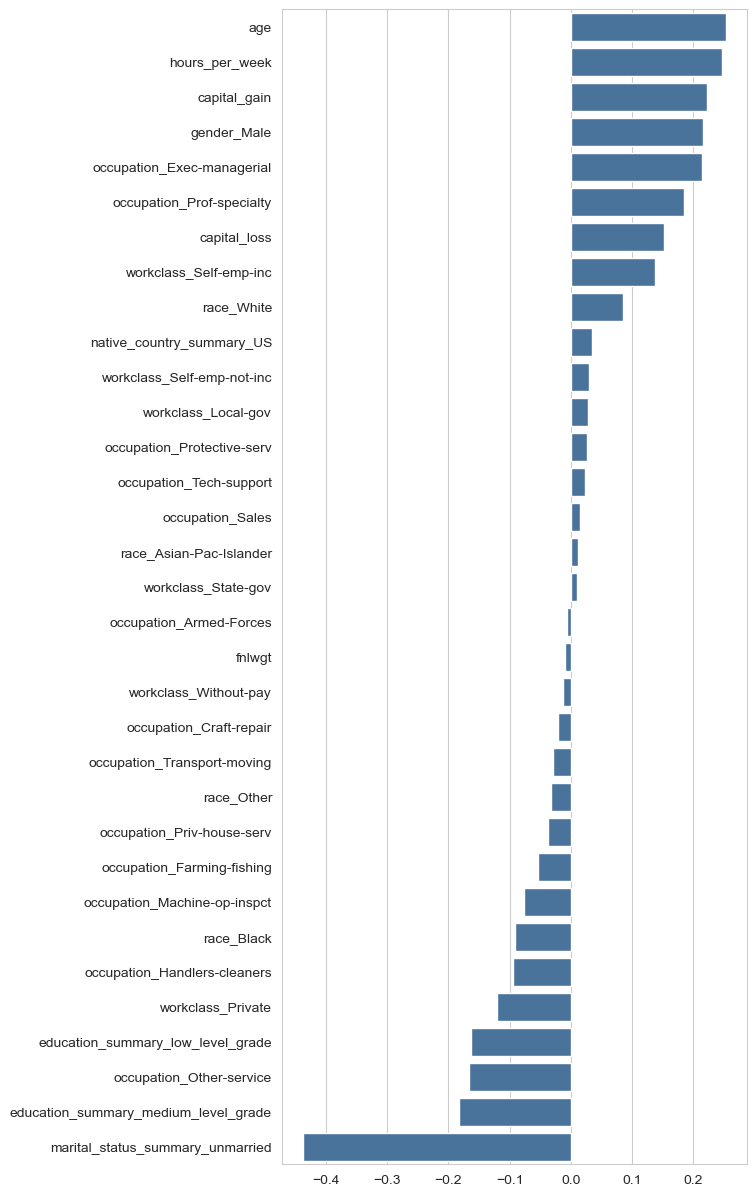

In [223]:
fig, ax = plt.subplots(figsize = (6, 15))
dat = df.corr()[["salary"]].sort_values(by = "salary", ascending = False)[1:].squeeze()
sns.barplot(dat.values, dat.index, orient = 'h', color = '#3c73a8');

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of the Project</p>